<a href="https://colab.research.google.com/github/RizzlaRozza/18005152_DataAnalytics/blob/main/Colab_AssessmentFile_18005152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import

Get all the CSV data

NOTE: On 31st May 2020, the statistics appear to have been greatly influenced by the George Floyd protests 

In [333]:
crimes <- read.csv("https://raw.githubusercontent.com/RizzlaRozza/18005152_DataAnalytics/main/bquxjob_4ded4059_1814e3d75e4.csv", stringsAsFactors = TRUE)

In [334]:
head(crimes)

date       year month day dow       dow_num TOTAL_CRIMES ABANDONED_BUILDING
1 2019-01-01 2019 1     1   Tuesday   2       1076         1                 
2 2019-01-02 2019 1     2   Wednesday 3        655         1                 
3 2019-01-03 2019 1     3   Thursday  4        752         1                 
4 2019-01-04 2019 1     4   Friday    5        769         0                 
5 2019-01-05 2019 1     5   Saturday  6        792         0                 
6 2019-01-06 2019 1     6   Sunday    7        664         1                 
  AIRPORT_OR_AIRCRAFT ALLEY ⋯ slp    visib wdsp mxpsd gust max  min  prcp sndp 
1 0                   23    ⋯ 1009.2  5.4  18.3 29.9  41.0 54.0 39.9 0.84 999.9
2 3                   10    ⋯ 1022.9 10.0  10.3 14.0  24.1 55.0 28.0 0.61 999.9
3 5                   17    ⋯ 1015.6  9.5   9.2 19.0  24.1 46.9 28.0 0.00 999.9
4 2                   21    ⋯ 1014.4  9.8   9.9 18.1  26.0 46.9 30.9 0.01 999.9
5 2                   20    ⋯ 1005.8  5.0  11.8 21.0  31.1 46.9 30.9 0.25 999.9
6 4                   15    ⋯ 1007.1  9.6  13.1 20.0  28.9 46.9 34.0 0.86 999.9
  fog
1 1  
2 0  
3 0  
4 0  
5 0  
6 0

Split Crime data into year (2019, 2020, 2021) add a unique index for each day of the year

In [335]:
crimes19 <- crimes[which(crimes$year == 2019), ];
dayofyear <- 1*seq_len(nrow(crimes19));
dayindex <- 1*seq_len(nrow(crimes19));
crimes19a <- cbind(dayindex, dayofyear, crimes19);

crimes20 <- crimes[which(crimes$year == 2020), ];
dayofyear <- 1*seq_len(nrow(crimes20));
dayindex <- 1*seq_len(nrow(crimes20)) + 365;
crimes20a <- cbind(dayindex, dayofyear, crimes20);

crimes21 <- crimes[which(crimes$year == 2021), ];
dayofyear <- 1*seq_len(nrow(crimes21));
dayindex <- 1*seq_len(nrow(crimes21)) + 731;
crimes21a <- cbind(dayindex, dayofyear, crimes21);

In [336]:
# split day of the week by year
crimes19 <- crimes[which(crimes$year == 2019, ), ];
new_day_num <- crimes19$dow_num;
crimes19x <- cbind(new_day_num, crimes19);

crimes20 <- crimes[which(crimes$year == 2020), ];
new_day_num <- crimes20$dow_num + 7;
crimes20x <- cbind(new_day_num, crimes20);

crimes21 <- crimes[which(crimes$year == 2021), ];
new_day_num <- crimes21$dow_num + 14;
crimes21x <- cbind(new_day_num, crimes21);

Add ggplot 2 library to enable detailed analysis

In [337]:
library(ggplot2)

# Total Crimes

<br>
<br>
<br>

**TOTAL CRIMES**
```

```



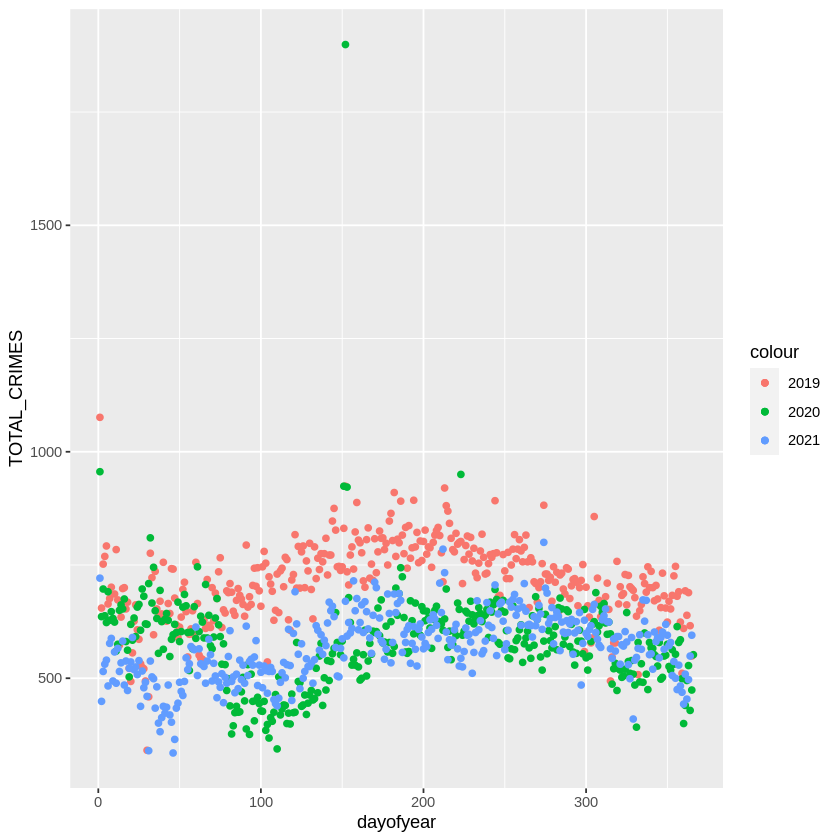

In [338]:
ggplot() +
  geom_point(data=crimes19a, aes(dayofyear, TOTAL_CRIMES, color="2019")) +
  geom_point(data=crimes20a, aes(dayofyear, TOTAL_CRIMES, color="2020")) +
  geom_point(data=crimes21a, aes(dayofyear, TOTAL_CRIMES, color="2021"))

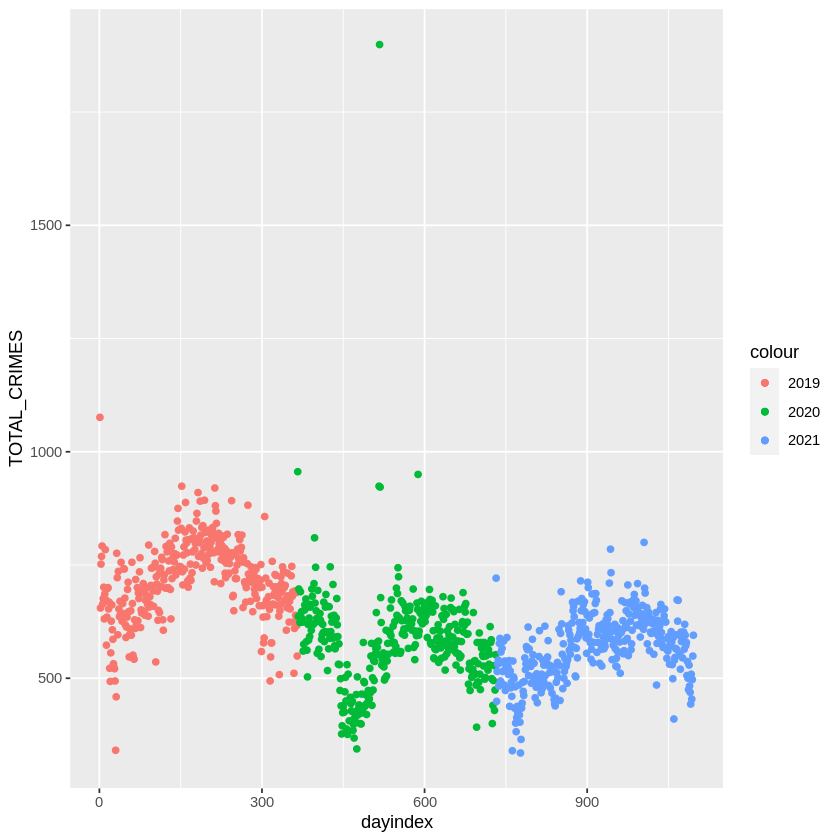

In [339]:
ggplot() +
  geom_point(data=crimes19a, aes(dayindex, TOTAL_CRIMES, color="2019")) +
  geom_point(data=crimes20a, aes(dayindex, TOTAL_CRIMES, color="2020")) +
  geom_point(data=crimes21a, aes(dayindex, TOTAL_CRIMES, color="2021"))

Remove the oddities in the Data which demonstrates an abnormally high or low number of crimes committed on specific days

In [340]:
crimes19b <- crimes19a[which(crimes19a$TOTAL_CRIMES <= 1000), ]
crimes20b <- crimes20a[which(crimes20a$TOTAL_CRIMES <= 1000), ]
crimes21b <- crimes21a[which(crimes21a$TOTAL_CRIMES <= 1000), ]

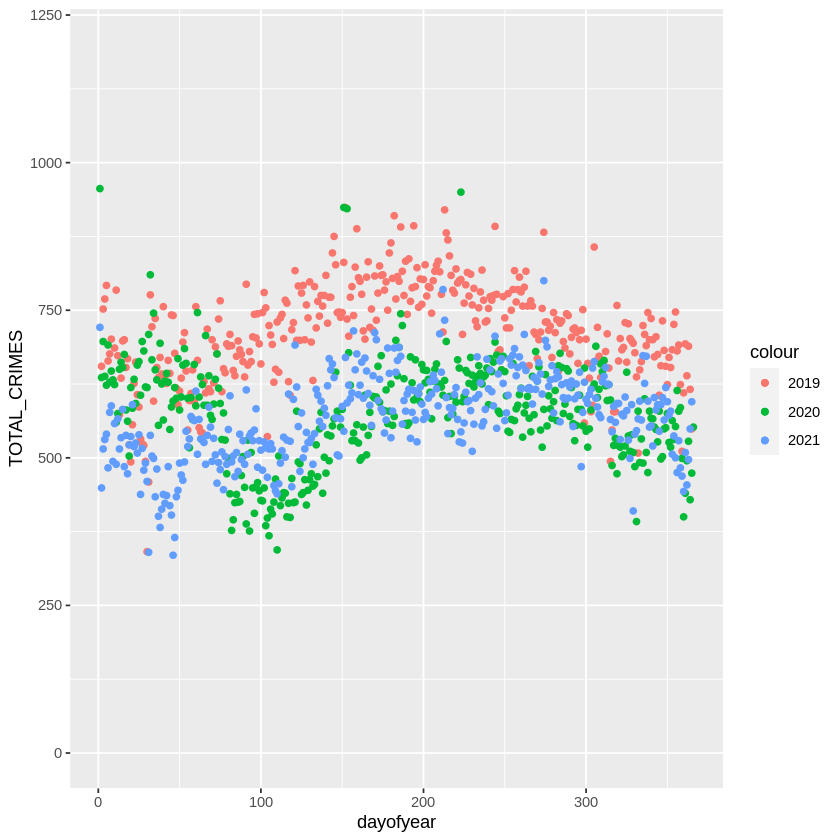

In [341]:
sp <- ggplot() +
  geom_point(data=crimes19b, aes(dayofyear, TOTAL_CRIMES, color="2019")) +
  geom_point(data=crimes20b, aes(dayofyear, TOTAL_CRIMES, color="2020")) +
  geom_point(data=crimes21b, aes(dayofyear, TOTAL_CRIMES, color="2021"))

sp+ylim(0, 1200)

In [342]:
crimes19c <- crimes19b[which(crimes19b$TOTAL_CRIMES <= 850), ]
crimes20c <- crimes20b[which(crimes20b$TOTAL_CRIMES <= 850), ]
crimes21c <- crimes21b[which(crimes21b$TOTAL_CRIMES <= 850), ]

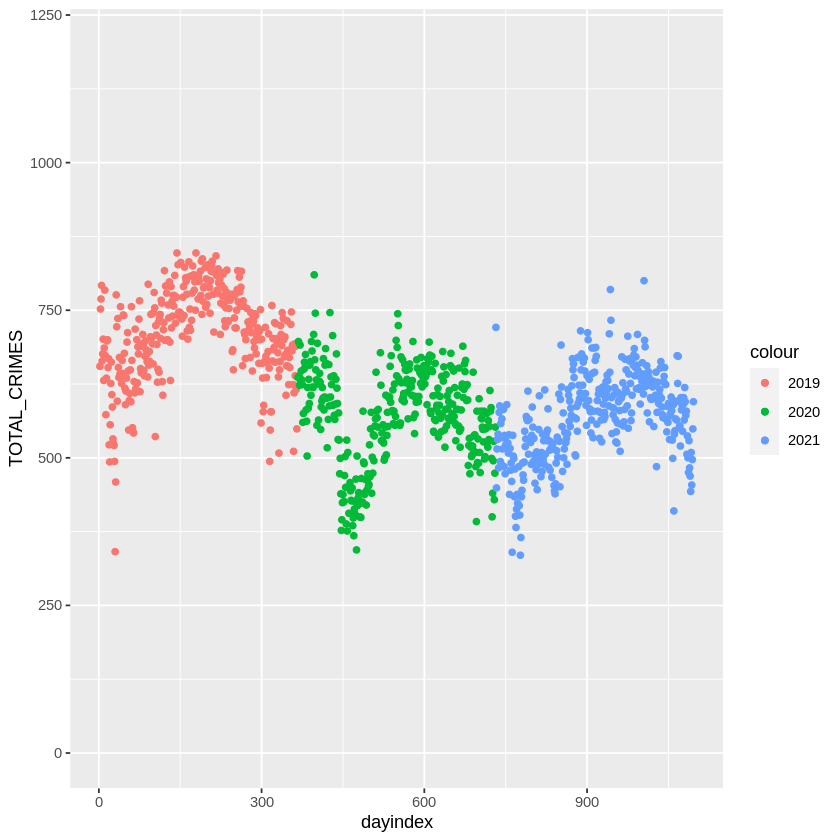

In [343]:
sp <- ggplot() +
  geom_point(data=crimes19c, aes(dayindex, TOTAL_CRIMES, color="2019")) +
  geom_point(data=crimes20c, aes(dayindex, TOTAL_CRIMES, color="2020")) +
  geom_point(data=crimes21c, aes(dayindex, TOTAL_CRIMES, color="2021"))

sp+ylim(0, 1200)

Total Crimes by day of the week

In [344]:
# split day of the week by year
crimes19 <- crimes[which(crimes$year == 2019, ), ];
new_day_num <- crimes19$dow_num;
new_fog <- crimes19$fog;
crimes19e <- cbind(new_day_num, new_fog, crimes19);

crimes20 <- crimes[which(crimes$year == 2020), ];
new_day_num <- crimes20$dow_num + 7;
new_fog <- crimes20$fog + 10;
crimes20e <- cbind(new_day_num, new_fog, crimes20);

crimes21 <- crimes[which(crimes$year == 2021), ];
new_day_num <- crimes21$dow_num + 14;
new_fog <- crimes21$fog + 20;
crimes21e <- cbind(new_day_num, new_fog, crimes21);

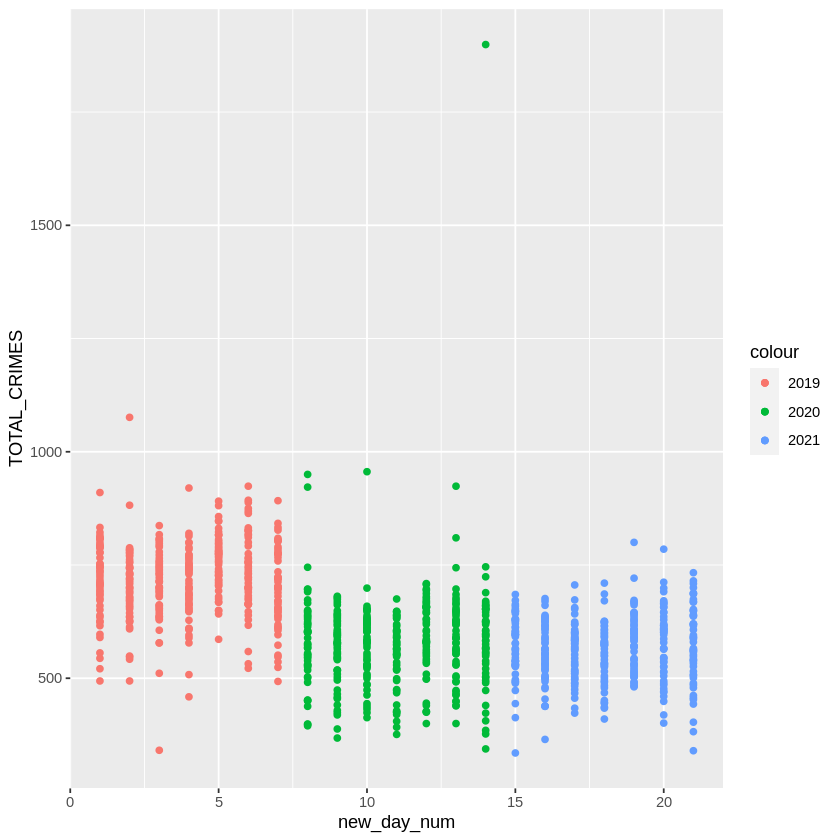

In [345]:
ggplot() +
  geom_point(data=crimes19e, aes(new_day_num, TOTAL_CRIMES, color="2019")) +
  geom_point(data=crimes20e, aes(new_day_num, TOTAL_CRIMES, color="2020")) +
  geom_point(data=crimes21e, aes(new_day_num, TOTAL_CRIMES, color="2021"))

In [346]:
# correlation between day of the week and crimes committed in Bars / Tavern
cor(crimes19e$dow_num, crimes19e$TOTAL_CRIMES);
cor(crimes20e$dow_num, crimes20e$TOTAL_CRIMES);
cor(crimes21e$dow_num, crimes21e$TOTAL_CRIMES);

[1] 0.05229971

[1] 0.07185189

[1] 0.07608739

Total Crimes vs Fog

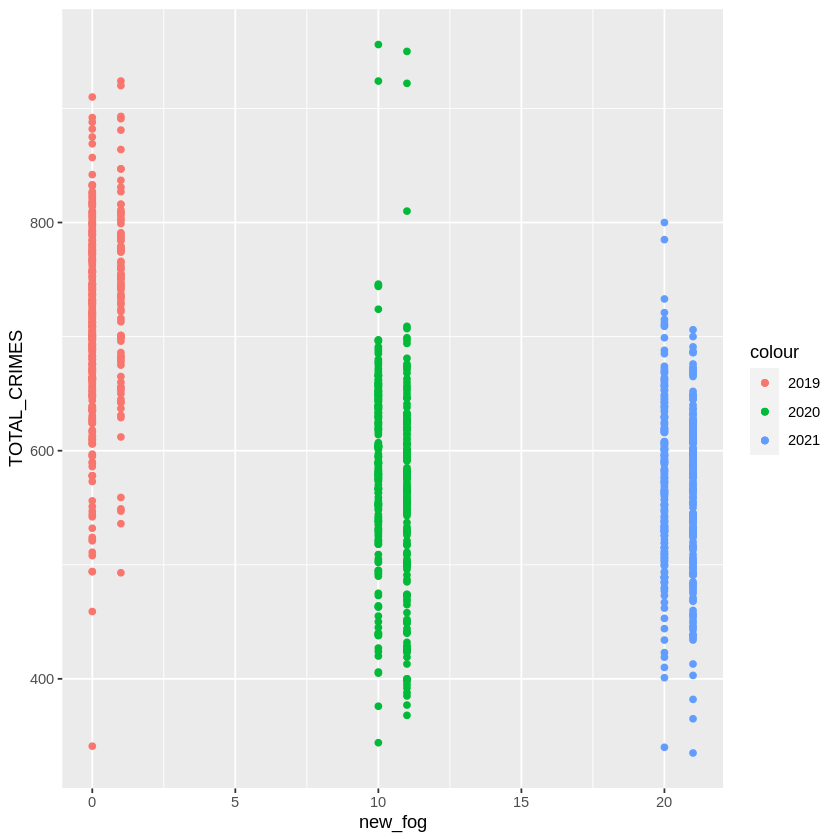

In [347]:
ggplot() +
  geom_point(data=crimes19e[which(crimes19e$TOTAL_CRIMES <= 1000), ], aes(new_fog, TOTAL_CRIMES, color="2019")) +
  geom_point(data=crimes20e[which(crimes20e$TOTAL_CRIMES <= 1000), ], aes(new_fog, TOTAL_CRIMES, color="2020")) +
  geom_point(data=crimes21e[which(crimes21e$TOTAL_CRIMES <= 1000), ], aes(new_fog, TOTAL_CRIMES, color="2021"))

In [348]:
# correlation between day of the week and Total Crimes
cor(crimes19e$fog, crimes19e$TOTAL_CRIMES);
cor(crimes20e$fog, crimes20e$TOTAL_CRIMES);
cor(crimes21e$fog, crimes21e$TOTAL_CRIMES);

[1] 0.1732296

[1] -0.1772133

[1] -0.0794935

# Total Crimes vs Weather Data

Total Crimes VS Temperature

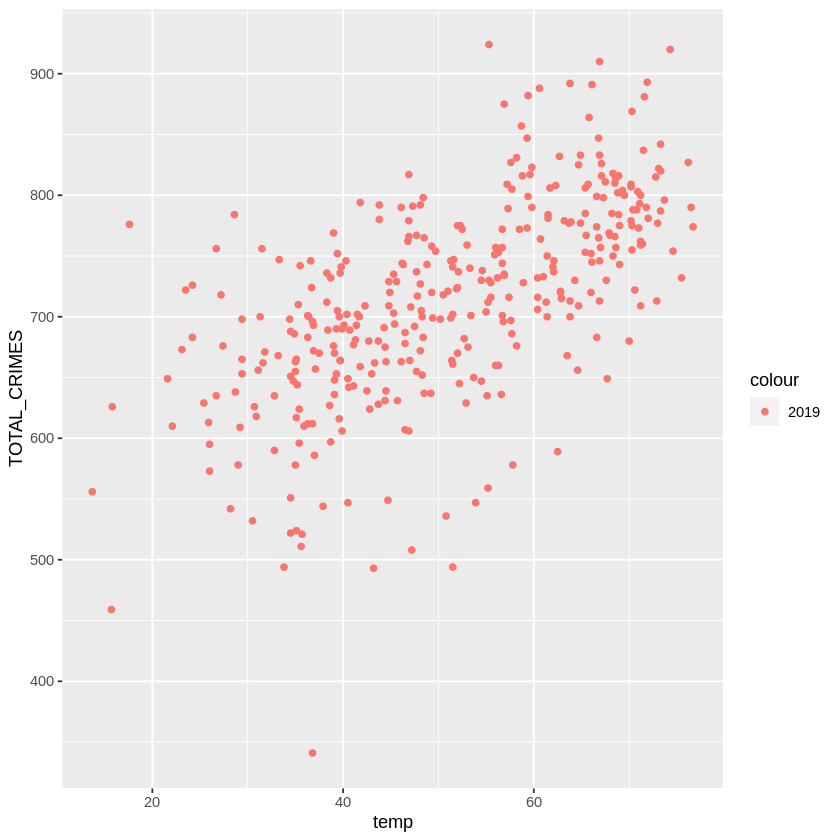

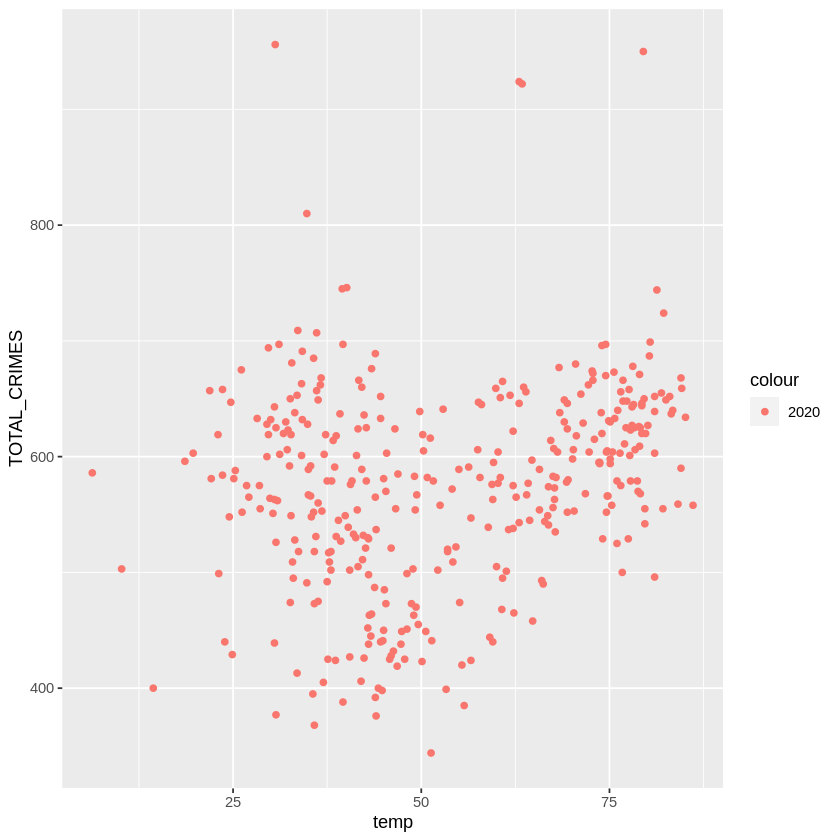

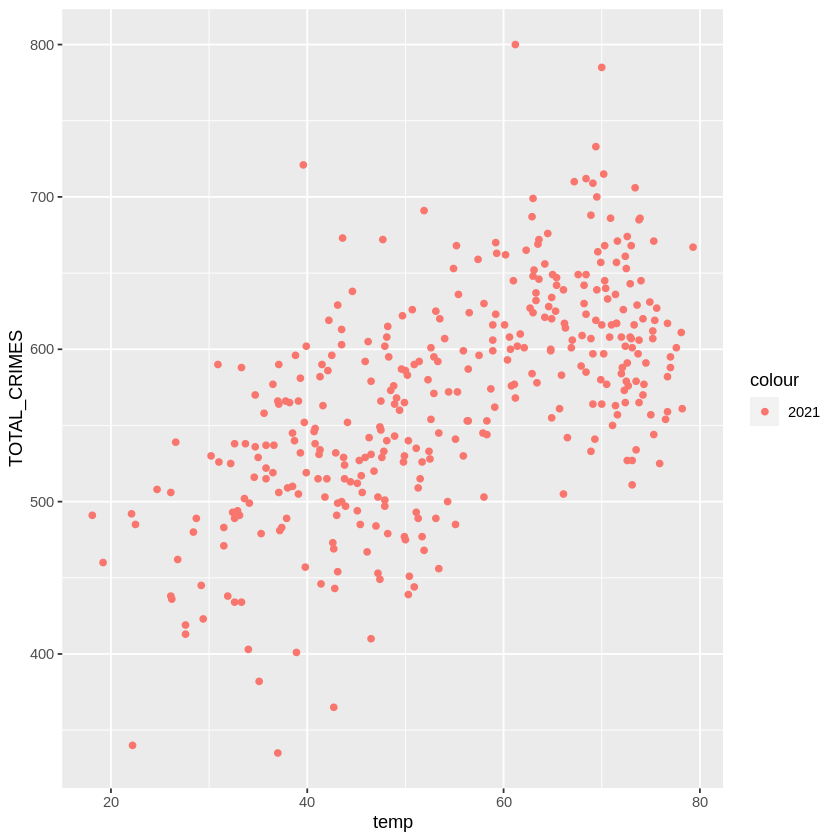

In [349]:
ggplot() +
  geom_point(data=crimes19e[which(crimes19e$TOTAL_CRIMES <= 1000), ], aes(temp, TOTAL_CRIMES, color="2019"))

ggplot() +
  geom_point(data=crimes20e[which(crimes20e$TOTAL_CRIMES <= 1000), ], aes(temp, TOTAL_CRIMES, color="2020")) 

ggplot() +
  geom_point(data=crimes21e[which(crimes21e$TOTAL_CRIMES <= 1000), ], aes(temp, TOTAL_CRIMES, color="2021"))

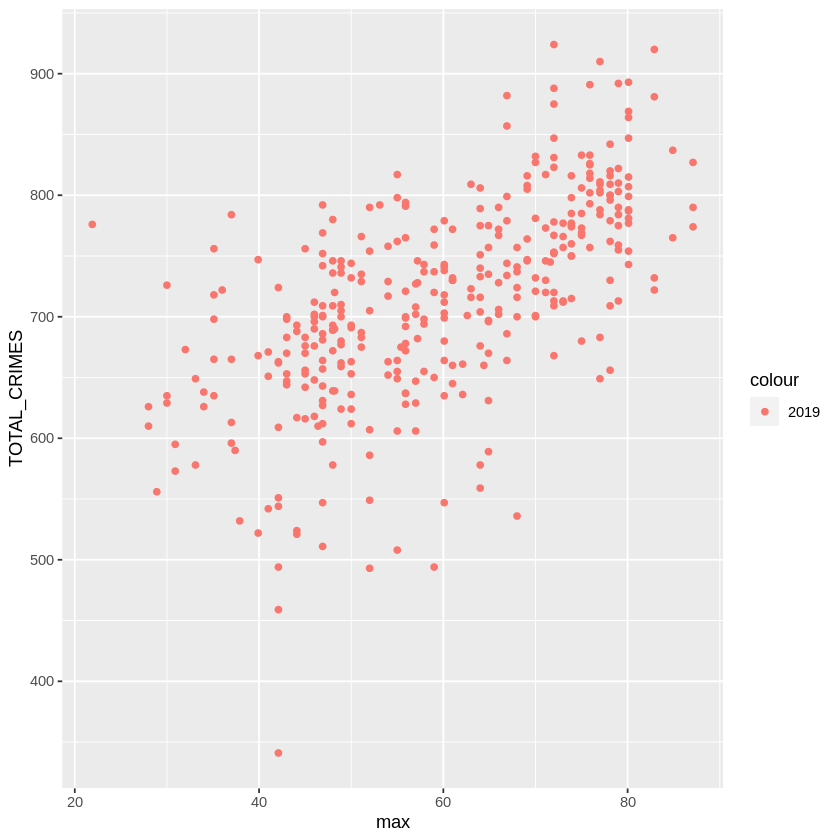

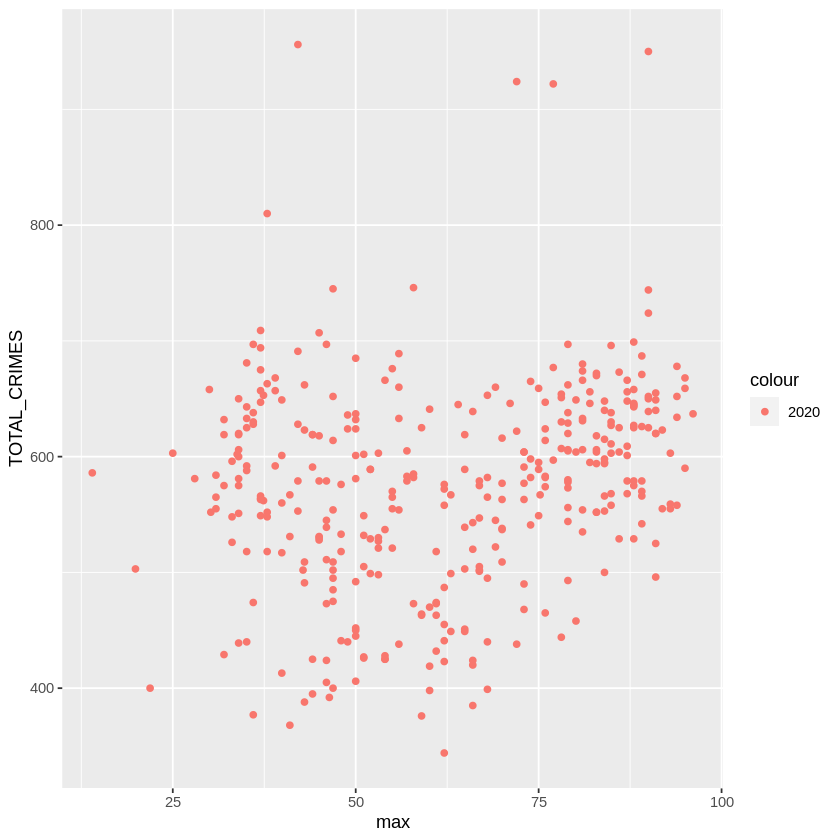

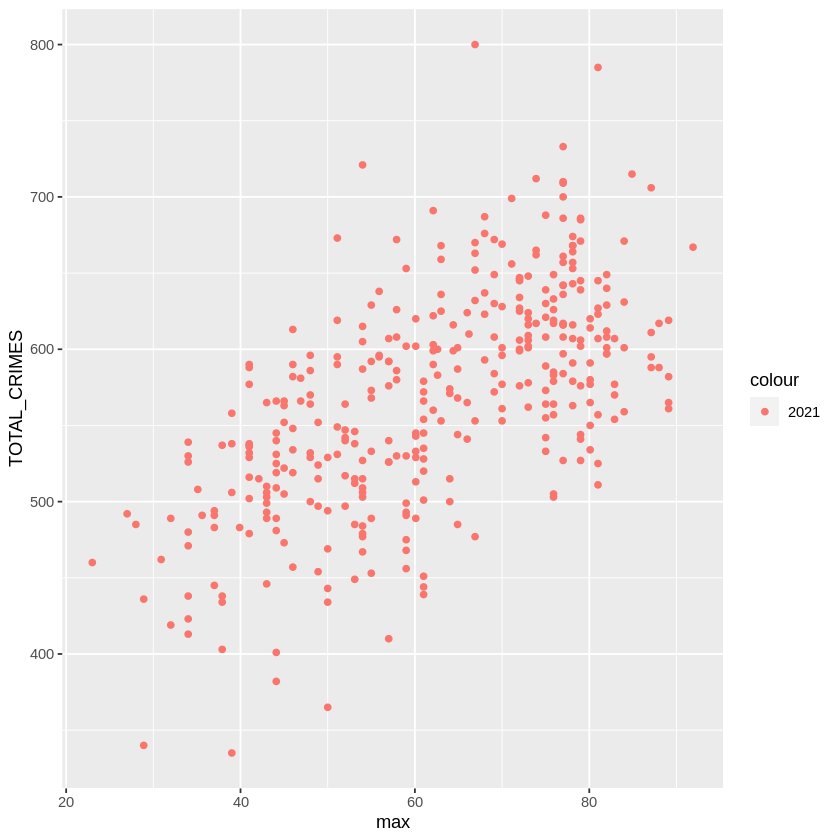

In [350]:
ggplot() +
  geom_point(data=crimes19e[which(crimes19e$TOTAL_CRIMES <= 1000), ], aes(max, TOTAL_CRIMES, color="2019"))

ggplot() +
  geom_point(data=crimes20e[which(crimes20e$TOTAL_CRIMES <= 1000), ], aes(max, TOTAL_CRIMES, color="2020")) 

ggplot() +
  geom_point(data=crimes21e[which(crimes21e$TOTAL_CRIMES <= 1000), ], aes(max, TOTAL_CRIMES, color="2021"))

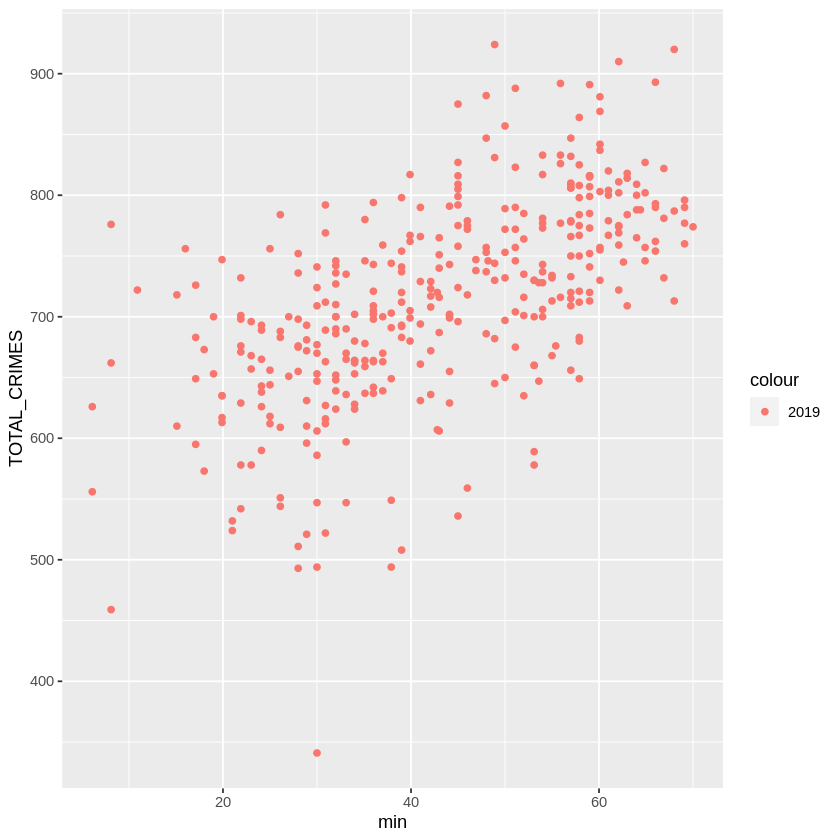

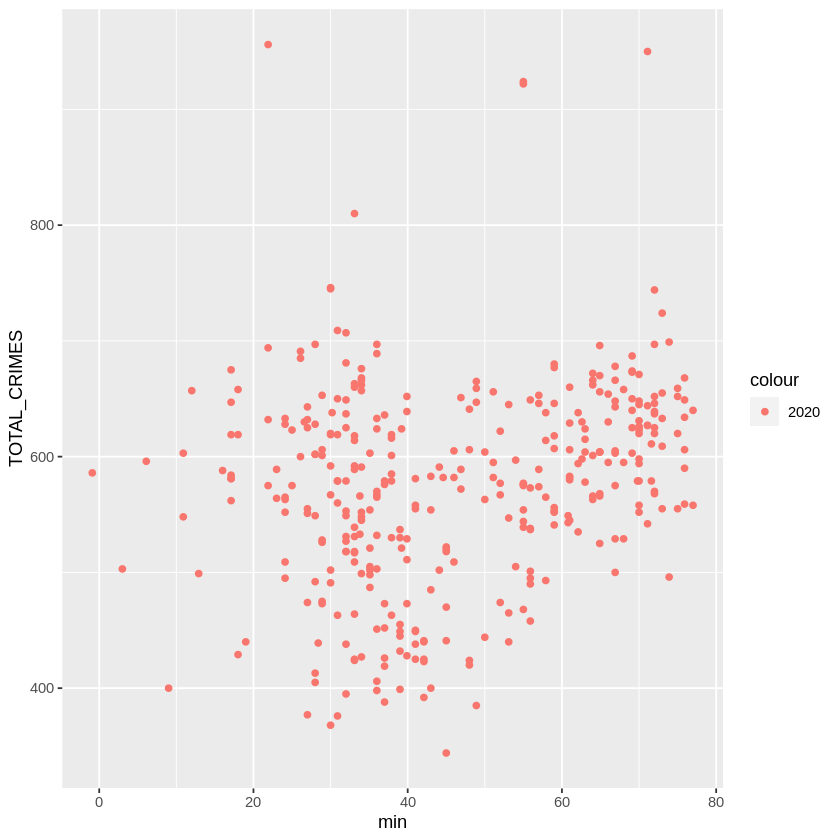

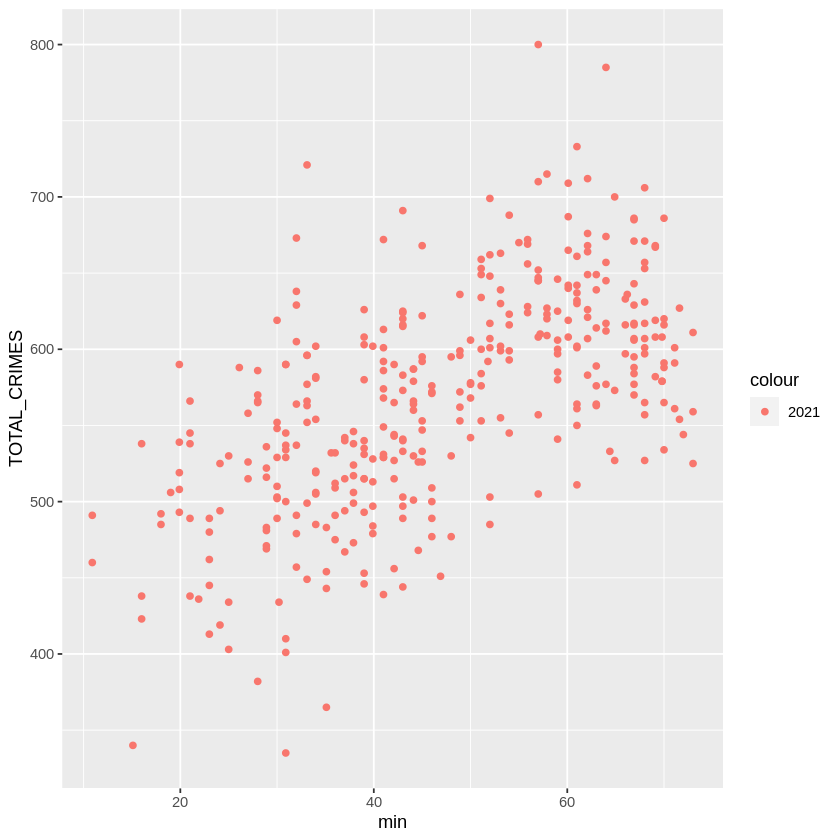

In [351]:
ggplot() +
  geom_point(data=crimes19e[which(crimes19e$TOTAL_CRIMES <= 1000), ], aes(min, TOTAL_CRIMES, color="2019"))

ggplot() +
  geom_point(data=crimes20e[which(crimes20e$TOTAL_CRIMES <= 1000), ], aes(min, TOTAL_CRIMES, color="2020")) 

ggplot() +
  geom_point(data=crimes21e[which(crimes21e$TOTAL_CRIMES <= 1000), ], aes(min, TOTAL_CRIMES, color="2021"))

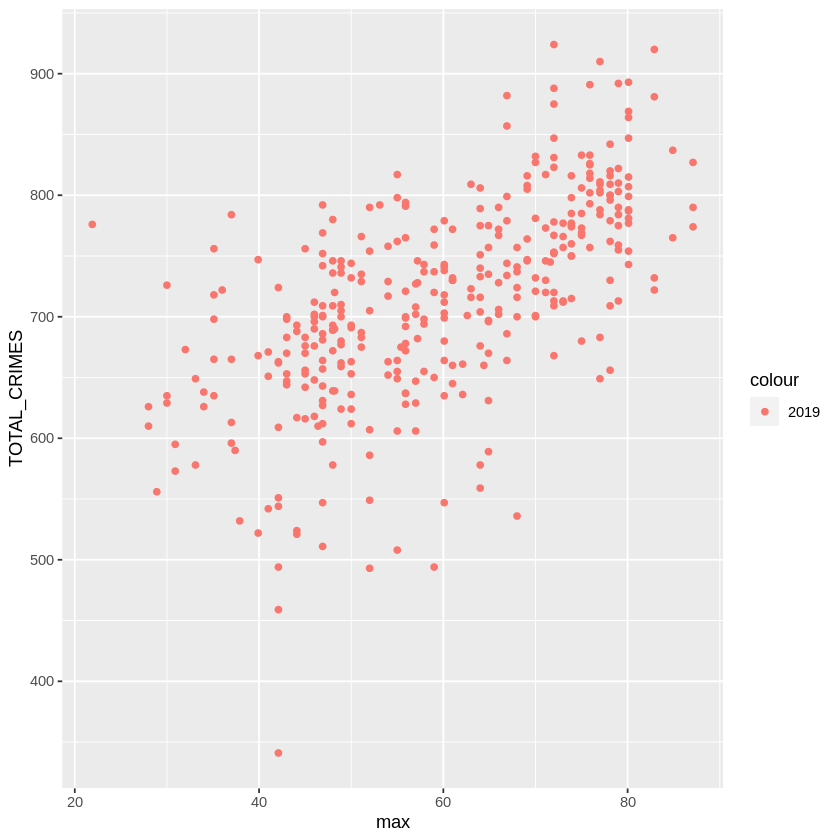

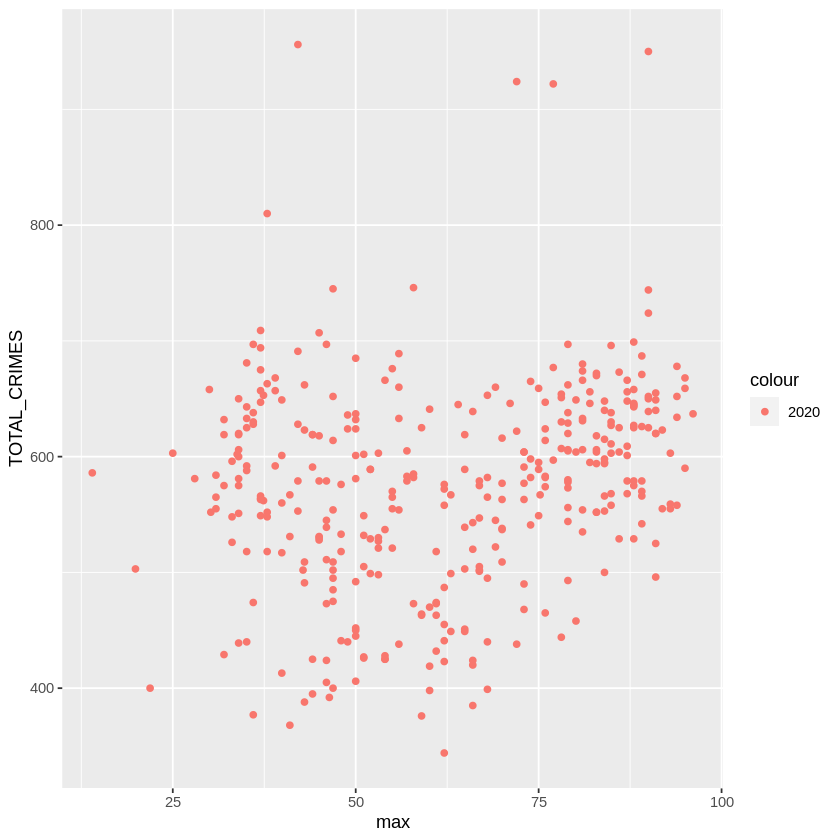

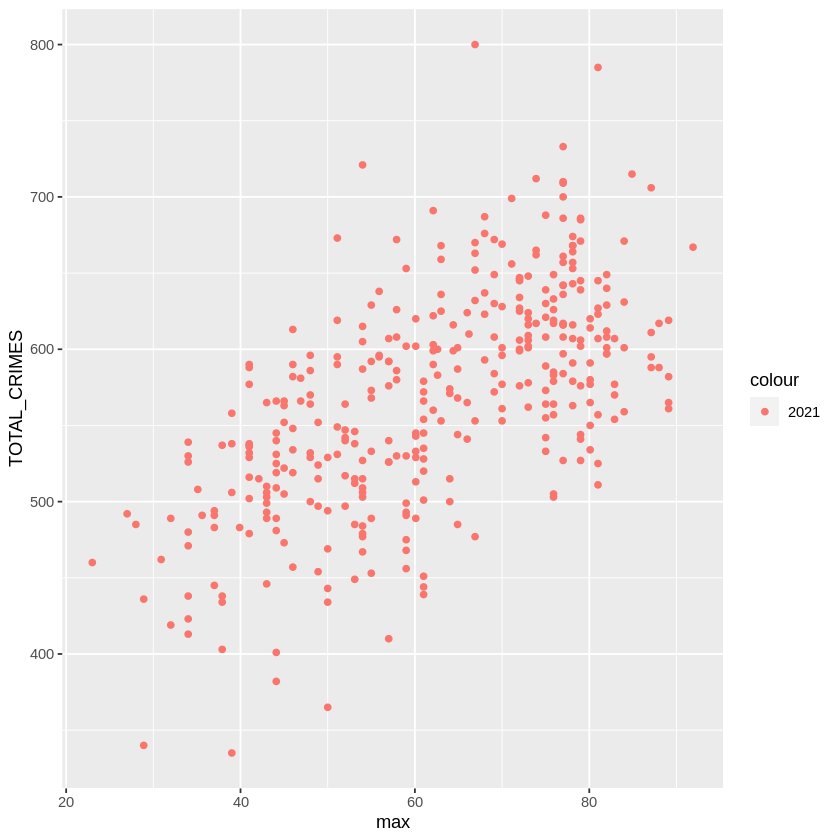

In [352]:
ggplot() +
  geom_point(data=crimes19e[which(crimes19e$TOTAL_CRIMES <= 1000), ], aes(max, TOTAL_CRIMES, color="2019"))

ggplot() +
  geom_point(data=crimes20e[which(crimes20e$TOTAL_CRIMES <= 1000), ], aes(max, TOTAL_CRIMES, color="2020")) 

ggplot() +
  geom_point(data=crimes21e[which(crimes21e$TOTAL_CRIMES <= 1000), ], aes(max, TOTAL_CRIMES, color="2021"))

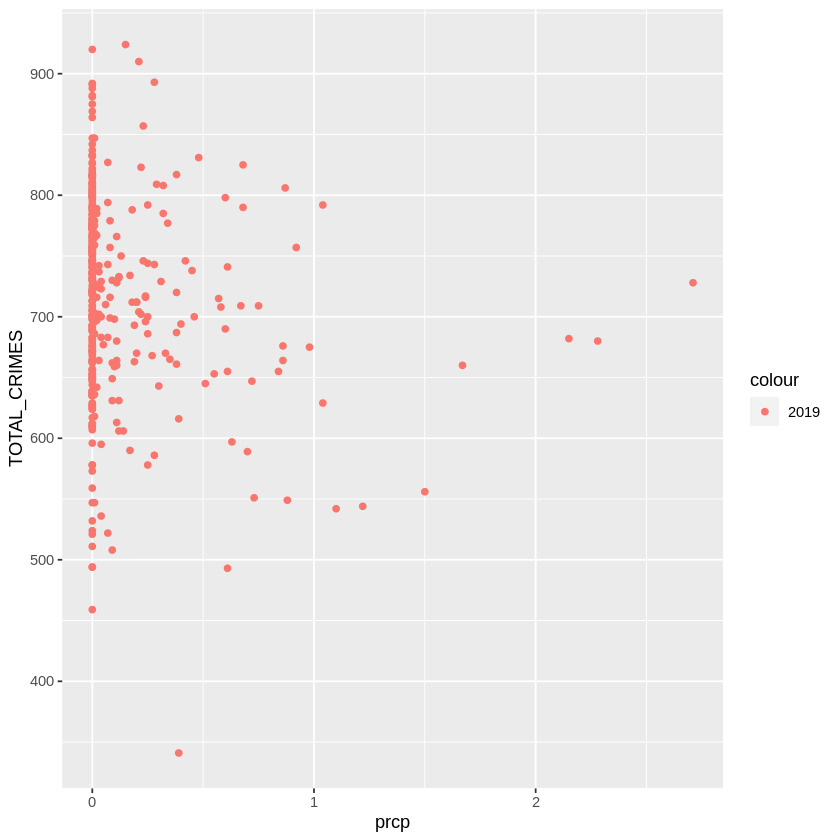

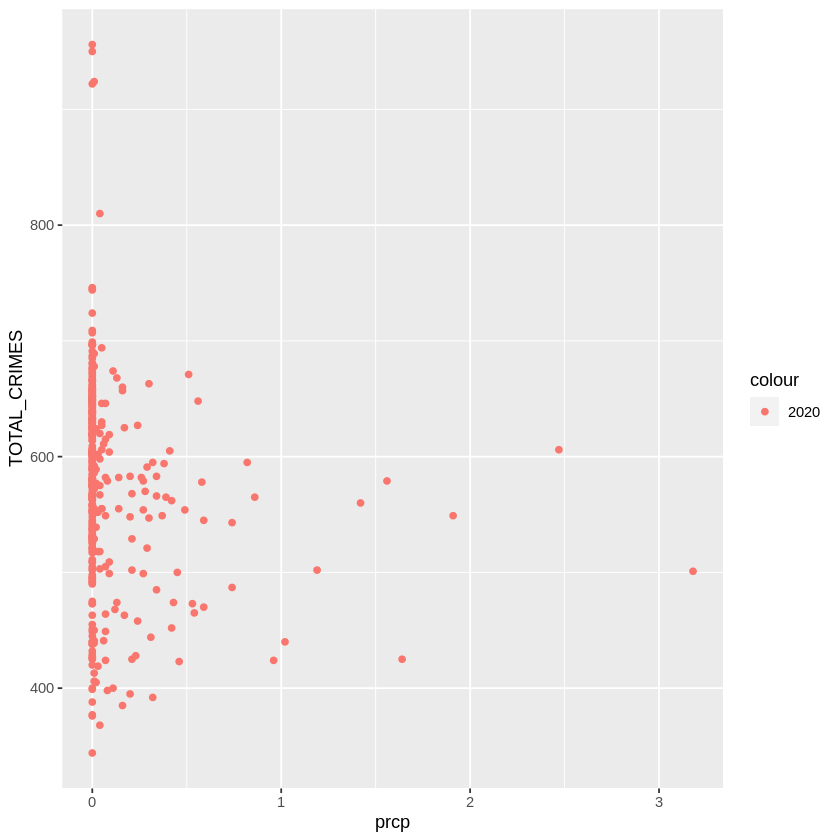

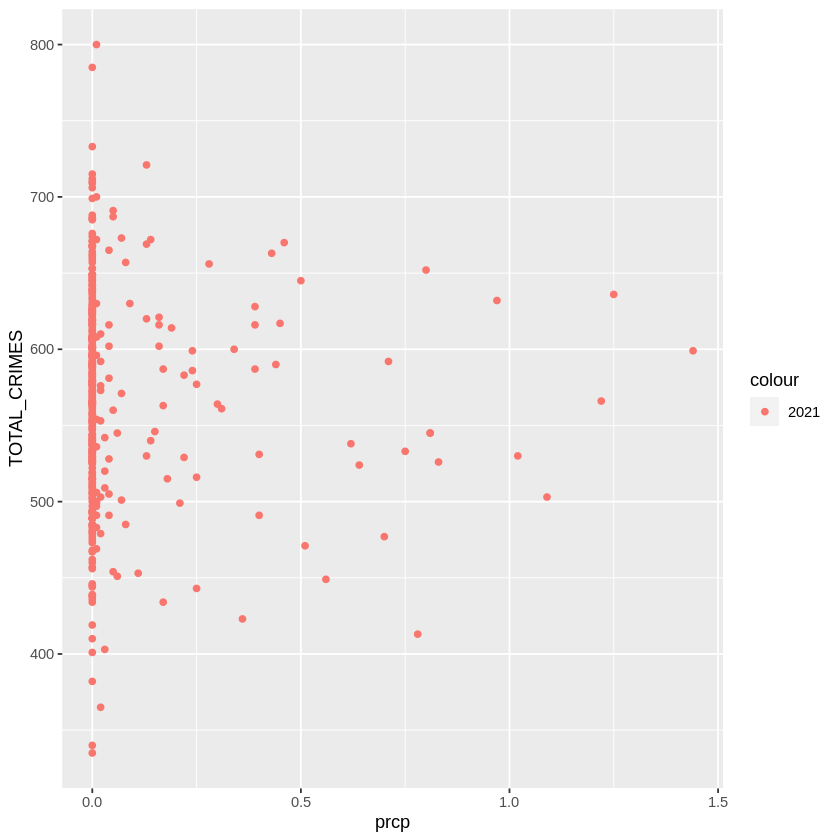

In [353]:
crimesPRCP19 <- crimes19e[which(crimes19$TOTAL_CRIMES <= 1000),];
crimesPRCP20 <- crimes20e[which(crimes20$TOTAL_CRIMES <= 1000),];
crimesPRCP21 <- crimes21e[which(crimes21$TOTAL_CRIMES <= 1000),];

crimesPRCP19$prcp[crimesPRCP19$prcp > 20] <- 0;
crimesPRCP20$prcp[crimesPRCP20$prcp > 20] <- 0;
crimesPRCP21$prcp[crimesPRCP21$prcp > 20] <- 0;

ggplot() +
  geom_point(data=crimesPRCP19, aes(prcp, TOTAL_CRIMES, color="2019"))

ggplot() +
  geom_point(data=crimesPRCP20, aes(prcp, TOTAL_CRIMES, color="2020"))

ggplot() +
  geom_point(data=crimesPRCP21, aes(prcp, TOTAL_CRIMES, color="2021"))

In [354]:
# correlation between temperature and total daily crimes
"Temp corrolation"
cor(crimes19e$temp, crimes19e$TOTAL_CRIMES);
cor(crimes20e$temp, crimes20e$TOTAL_CRIMES);
cor(crimes21e$temp, crimes21e$TOTAL_CRIMES);
"----------------------------------"
"Min corrolation"
# correlation between min temperature and total daily crimes
cor(crimes19e$min, crimes19e$TOTAL_CRIMES);
cor(crimes20e$min, crimes20e$TOTAL_CRIMES);
cor(crimes21e$min, crimes21e$TOTAL_CRIMES);
"----------------------------------"
"Max corrolation"
# correlation between max temperature and total daily crimes
cor(crimes19e$max, crimes19e$TOTAL_CRIMES);
cor(crimes20e$max, crimes20e$TOTAL_CRIMES);
cor(crimes21e$max, crimes21e$TOTAL_CRIMES);
"----------------------------------"
"Precipitation corrolation"
# correlation between max temperature and total daily crimes
cor(crimes19e$prcp, crimes19e$TOTAL_CRIMES);
cor(crimes20e$prcp, crimes20e$TOTAL_CRIMES);
cor(crimes21e$prcp, crimes21e$TOTAL_CRIMES);


[1] "Temp corrolation"

[1] 0.6002355

[1] 0.2011031

[1] 0.6236605

[1] "----------------------------------"

[1] "Min corrolation"

[1] 0.5851441

[1] 0.1982798

[1] 0.6076339

[1] "----------------------------------"

[1] "Max corrolation"

[1] 0.604371

[1] 0.1774784

[1] 0.6281348

[1] "----------------------------------"

[1] "Precipitation corrolation"

[1] 0.05469693

[1] -0.136033

[1] 0.09799355

# Homicides

<br>
<br>
<br>

**Homicides**
```

```


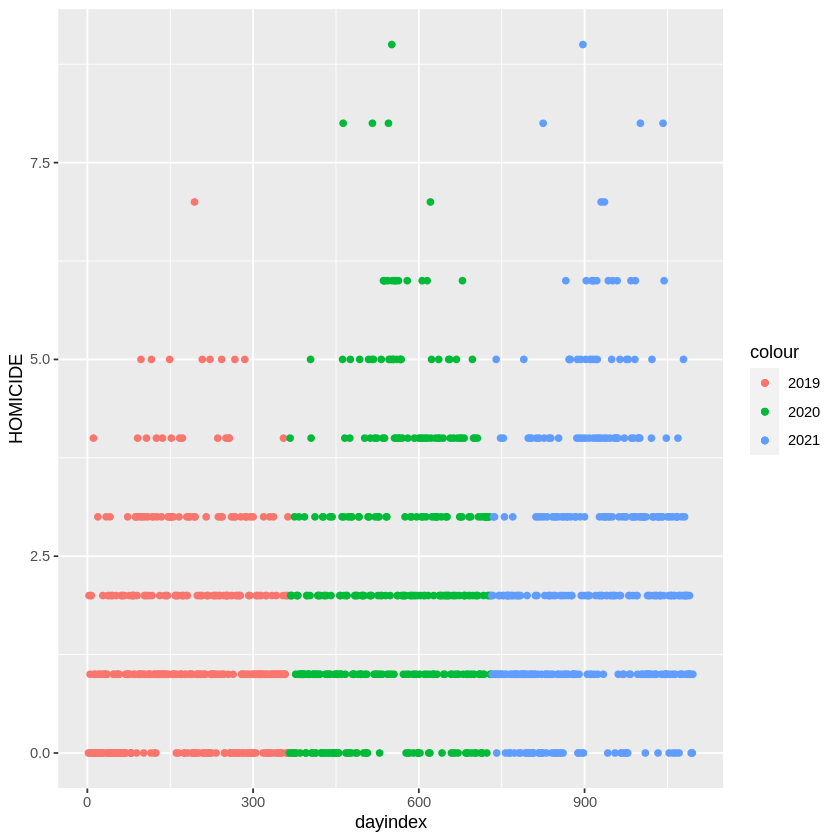

In [355]:
ggplot() +
  geom_point(data=crimes19a[which(crimes19a$TOTAL_CRIMES <= 1000),], aes(dayindex, HOMICIDE, color="2019")) +
  geom_point(data=crimes20a[which(crimes20a$TOTAL_CRIMES <= 1000),], aes(dayindex, HOMICIDE, color="2020")) +
  geom_point(data=crimes21a[which(crimes21a$TOTAL_CRIMES <= 1000),], aes(dayindex, HOMICIDE, color="2021"))

# Homicides vs Weather Data

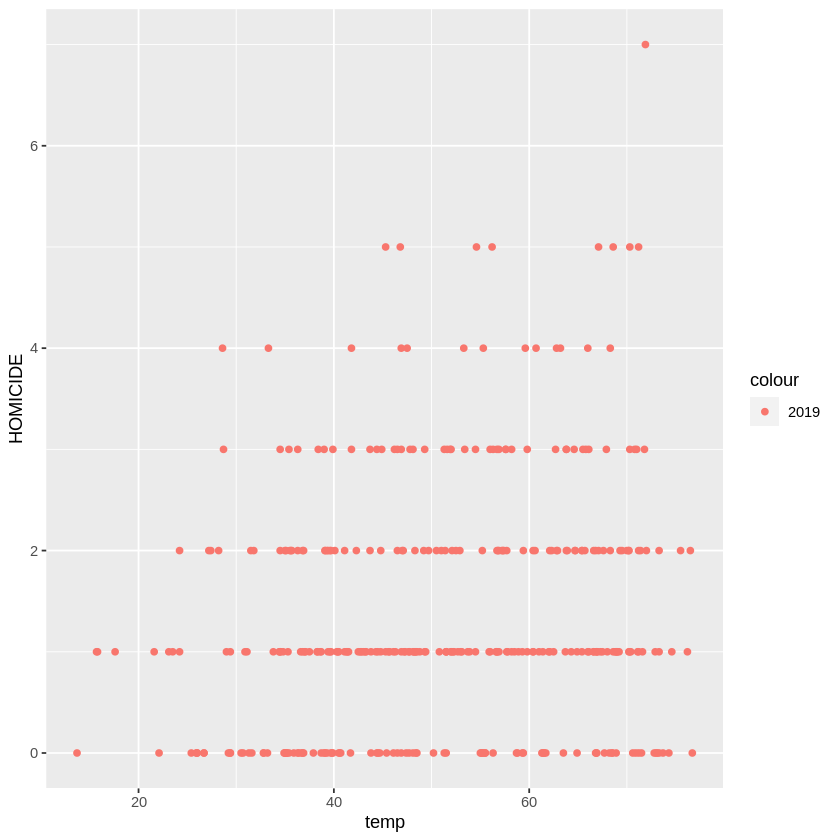

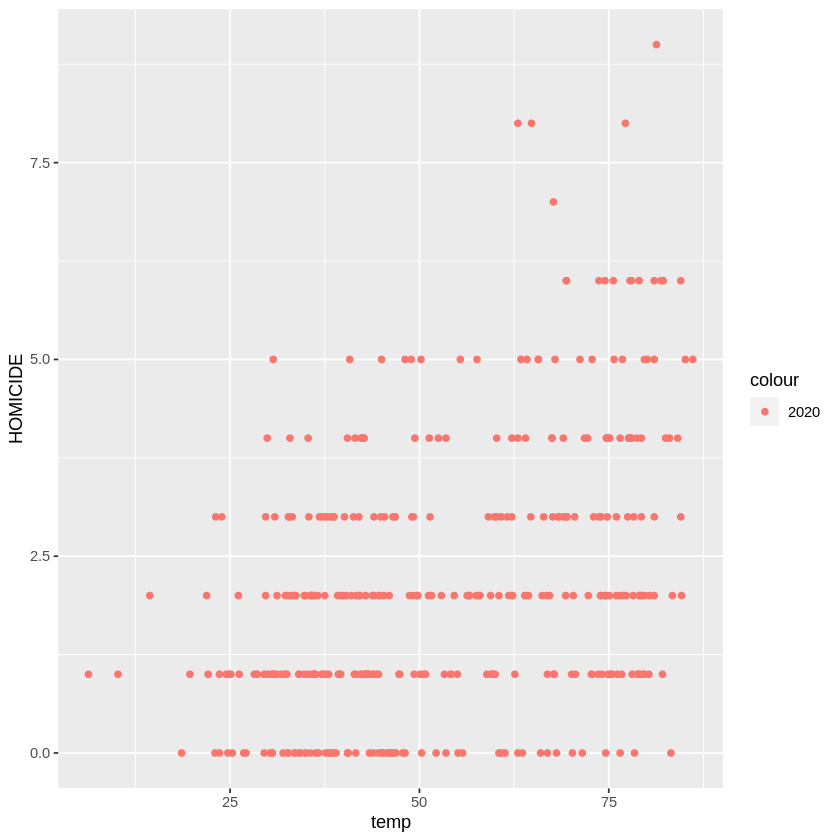

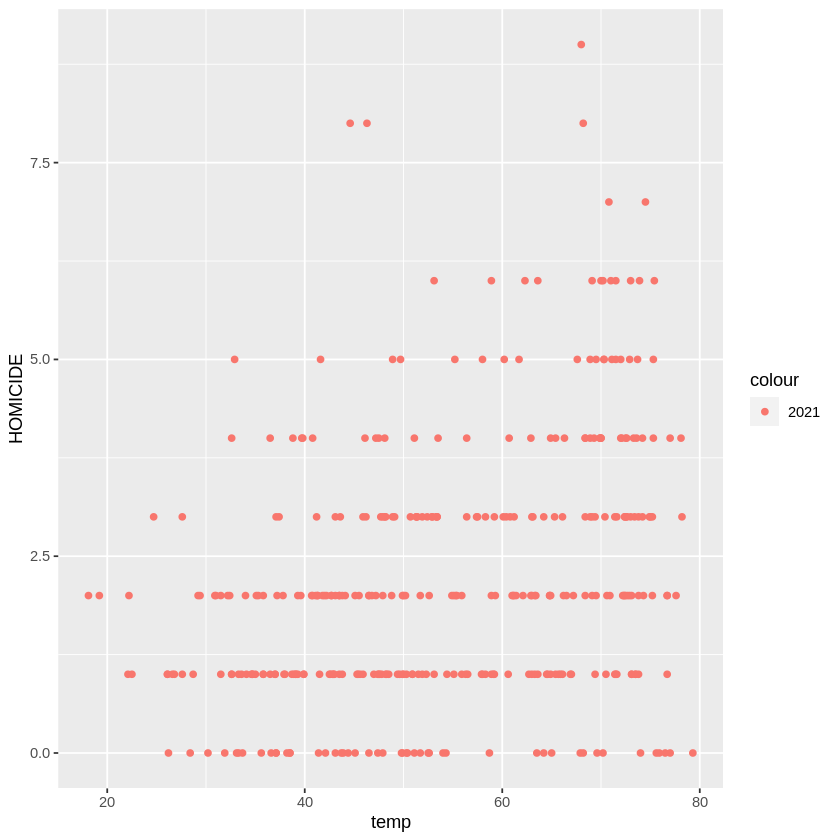

In [356]:
crimesH19 <- crimes19a[which(crimes19a$HOMICIDE <= 10),];
crimesH20 <- crimes20a[which(crimes20a$HOMICIDE <= 10),];
crimesH21 <- crimes21a[which(crimes21a$HOMICIDE <= 10),];

ggplot() +
  geom_point(data=crimesH19, aes(temp, HOMICIDE, color="2019")) 
ggplot() +
  geom_point(data=crimesH20, aes(temp, HOMICIDE, color="2020")) 
ggplot() +
  geom_point(data=crimesH21, aes(temp, HOMICIDE, color="2021"))

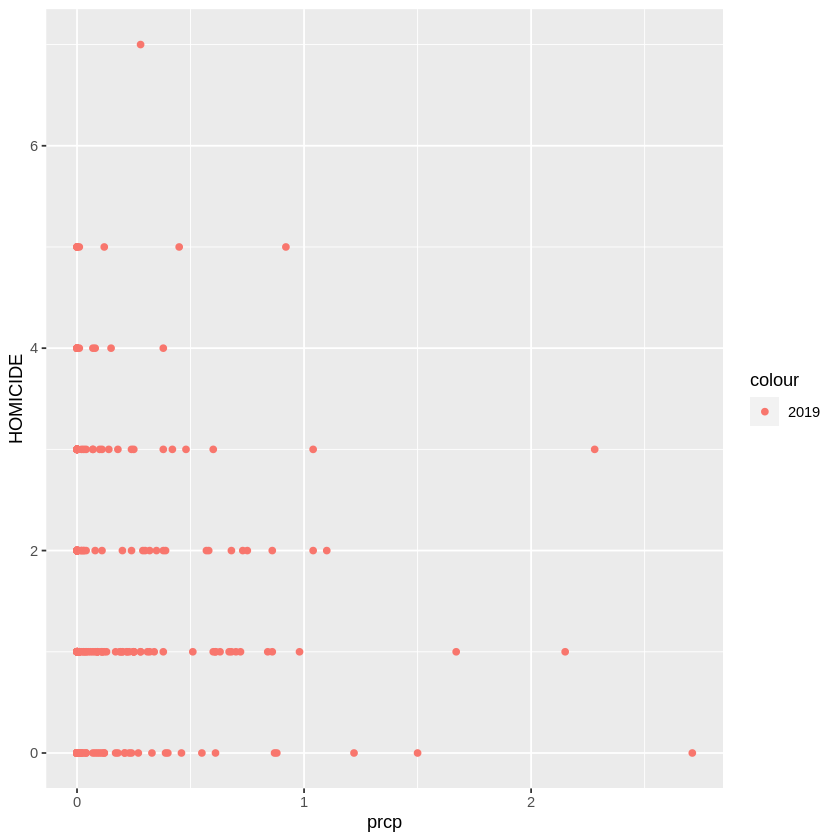

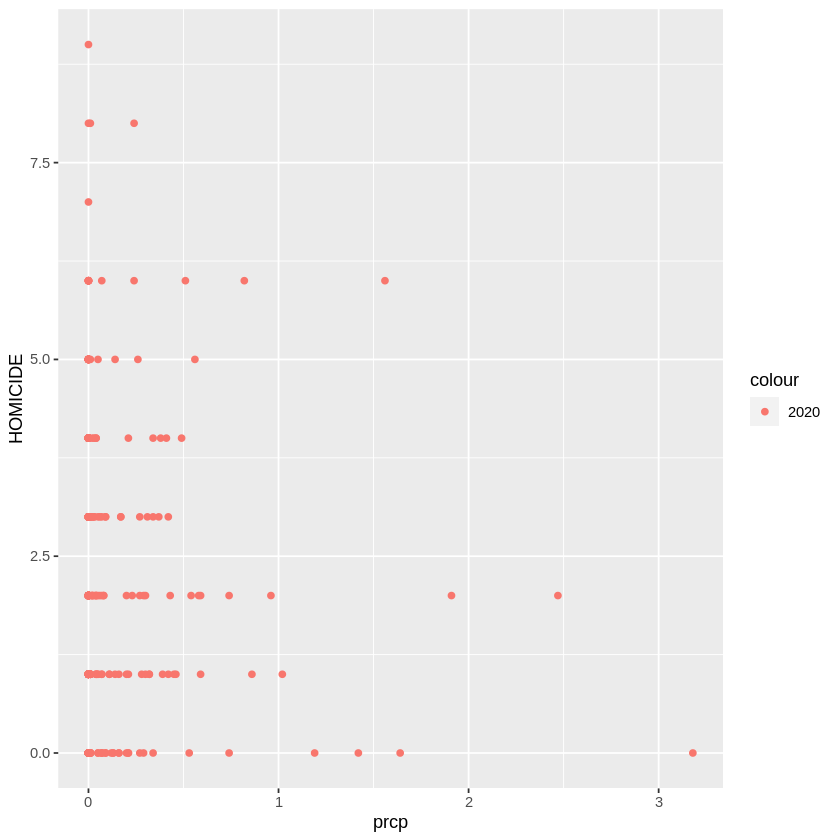

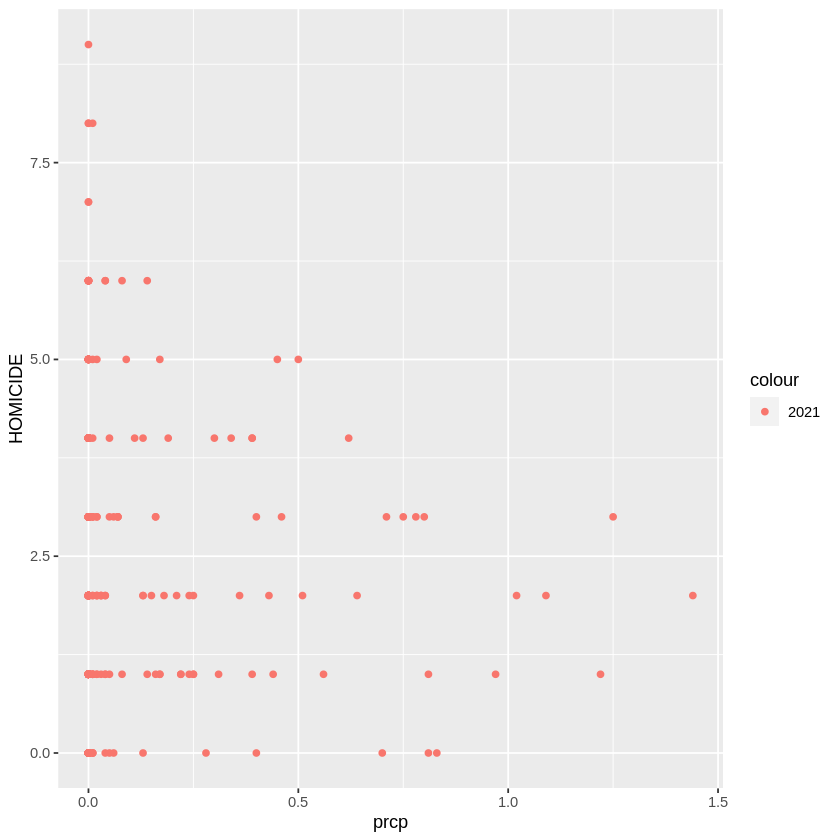

In [357]:
ggplot() +
  geom_point(data=crimesPRCP19, aes(prcp, HOMICIDE, color="2019"))
ggplot() +
  geom_point(data=crimesPRCP20, aes(prcp, HOMICIDE, color="2020"))
ggplot() +
  geom_point(data=crimesPRCP21, aes(prcp, HOMICIDE, color="2021"))

# Vehicle Thefts

<br>
<br>
<br>

**Vehicle Thefts**
```

```


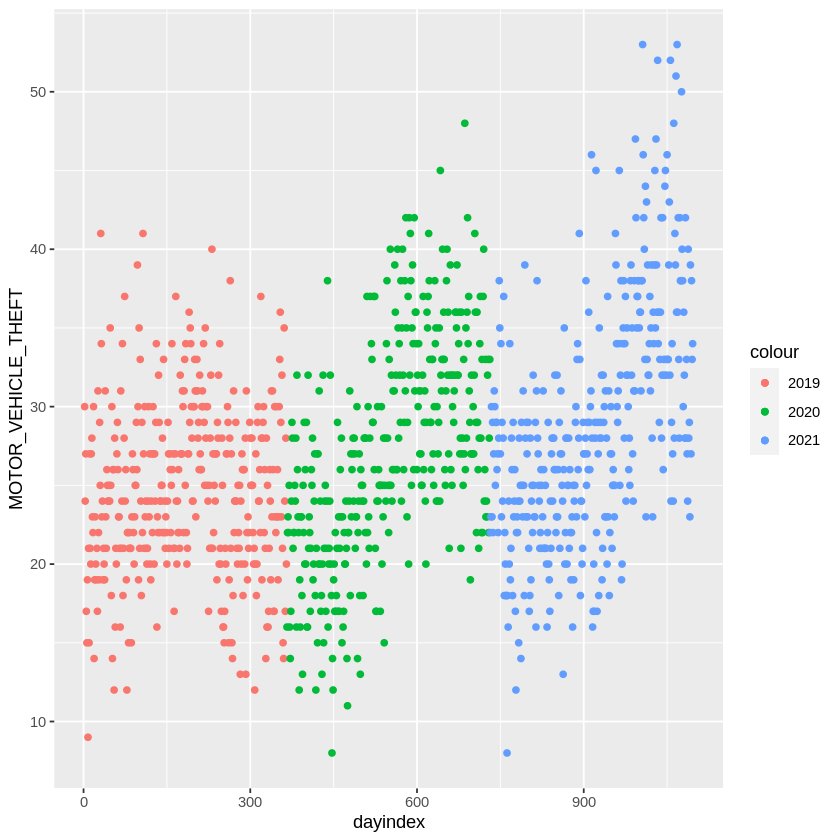

In [358]:
ggplot() +
  geom_point(data=crimes19a[which(crimes19a$TOTAL_CRIMES <= 1000),], aes(dayindex, MOTOR_VEHICLE_THEFT, color="2019")) +
  geom_point(data=crimes20a[which(crimes20a$TOTAL_CRIMES <= 1000),], aes(dayindex, MOTOR_VEHICLE_THEFT, color="2020")) +
  geom_point(data=crimes21a[which(crimes21a$TOTAL_CRIMES <= 1000),], aes(dayindex, MOTOR_VEHICLE_THEFT, color="2021"))

# Vehicle Thefts vs Weather Data

Temperature VS Vehicle Theft

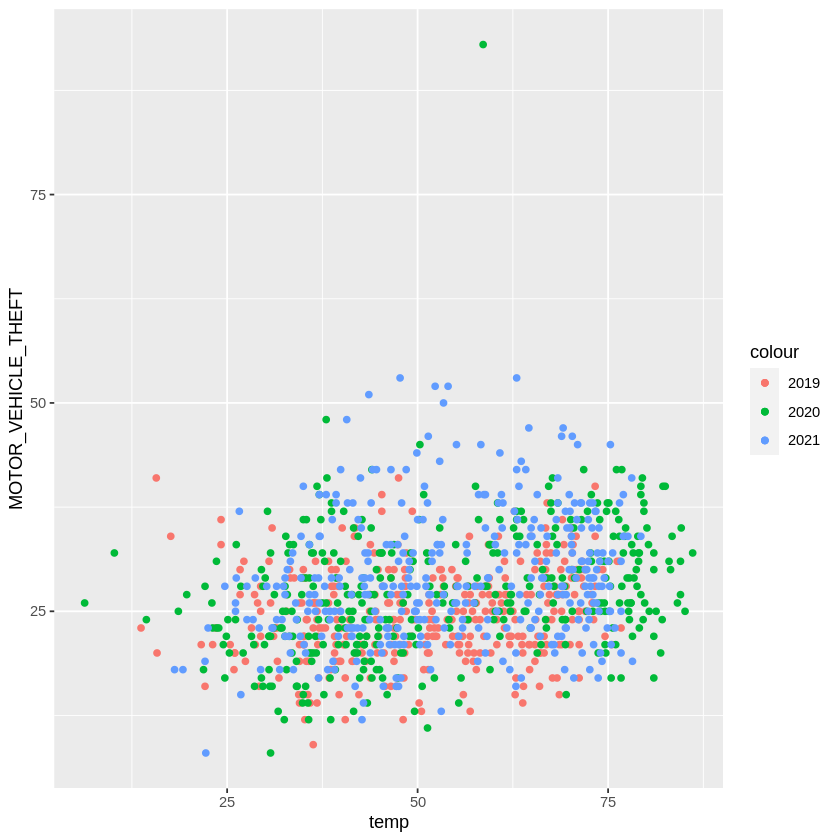

In [359]:
ggplot() +
  geom_point(data=crimes19a, aes(temp, MOTOR_VEHICLE_THEFT, color="2019")) +
  geom_point(data=crimes20a, aes(temp, MOTOR_VEHICLE_THEFT, color="2020")) +
  geom_point(data=crimes21a, aes(temp, MOTOR_VEHICLE_THEFT, color="2021"))

# Thefts

<br>
<br>
<br>

**Thefts**
```

```

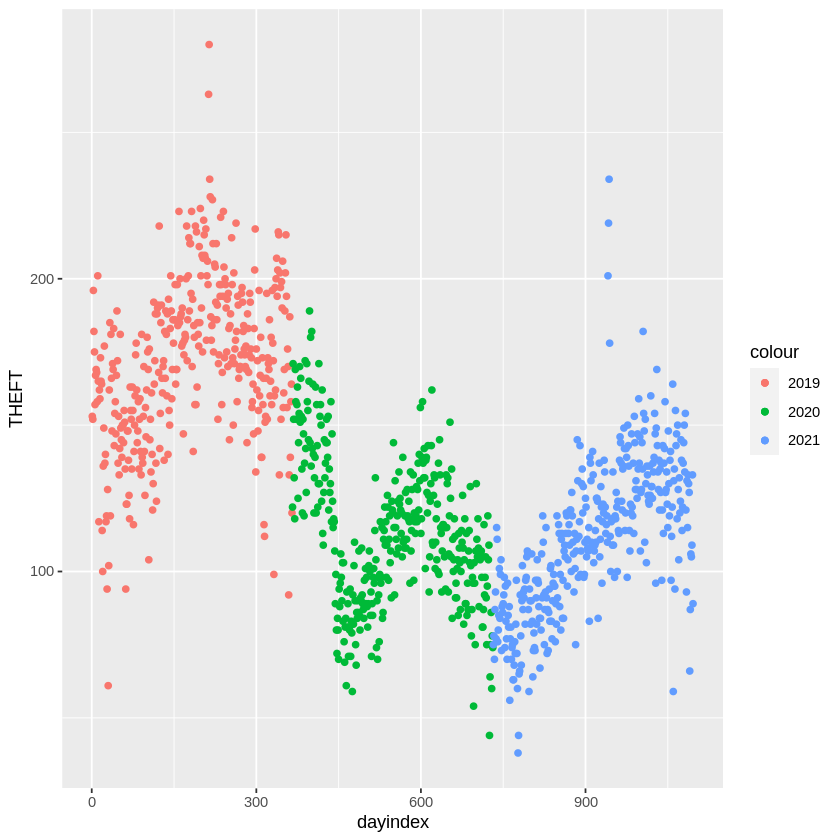

In [360]:
ggplot() +
  geom_point(data=crimes19a, aes(dayindex, THEFT, color="2019")) +
  geom_point(data=crimes20a, aes(dayindex, THEFT, color="2020")) +
  geom_point(data=crimes21a, aes(dayindex, THEFT, color="2021"))

# Theft vs Weather Data

Temperature vs Thefts

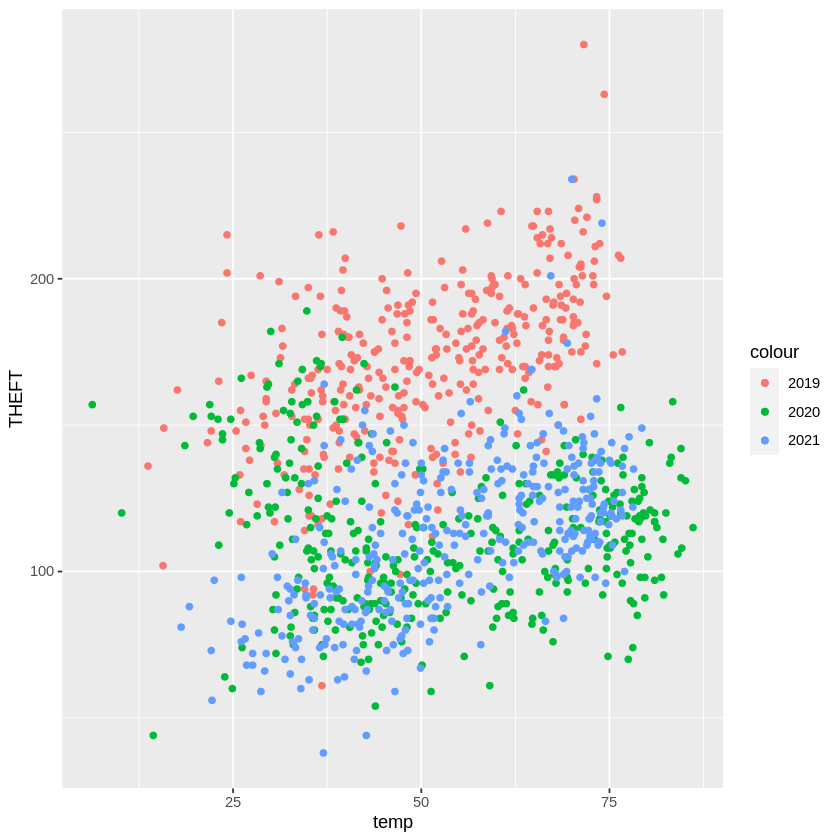

In [361]:
ggplot() +
  geom_point(data=crimes19a, aes(temp, THEFT, color="2019")) +
  geom_point(data=crimes20a, aes(temp, THEFT, color="2020")) +
  geom_point(data=crimes21a, aes(temp, THEFT, color="2021"))

# Appartment

<br>
<br>
<br>

**Crimes in Apartments**
```

```

In [362]:
# split day of the week by year
crimes19f <- crimes19a[which(crimes19a$APARTMENT <= 150), ]
crimes20f <- crimes20a[which(crimes20a$APARTMENT <= 150), ]
crimes21f <- crimes21a[which(crimes21a$APARTMENT <= 150), ]

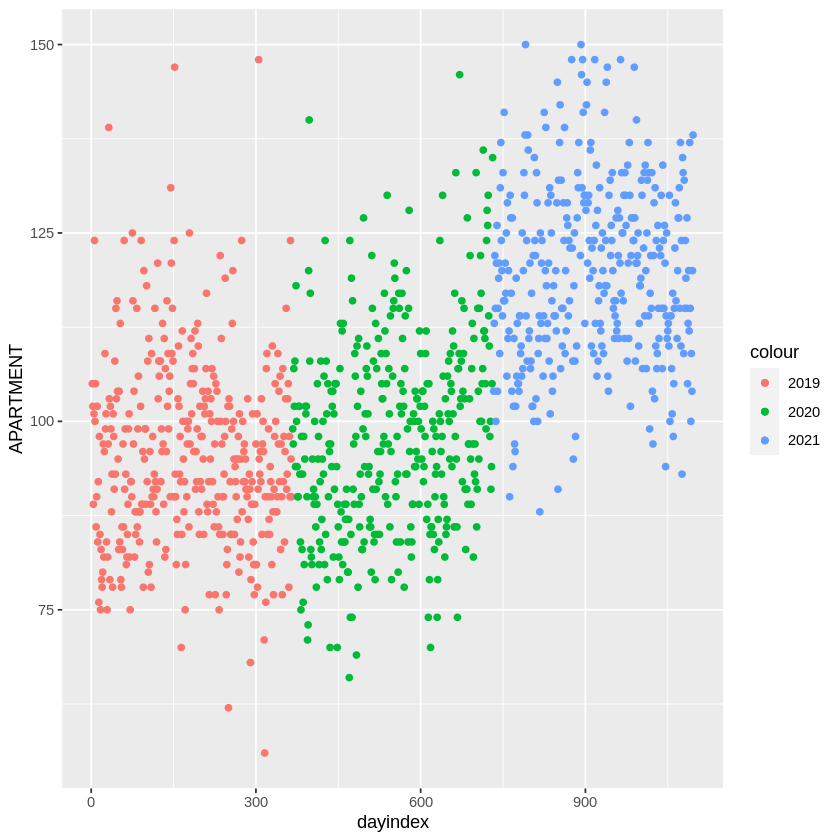

In [363]:
ggplot() +
  geom_point(data=crimes19f, aes(dayindex, APARTMENT, color="2019")) +
  geom_point(data=crimes20f, aes(dayindex, APARTMENT, color="2020")) +
  geom_point(data=crimes21f, aes(dayindex, APARTMENT, color="2021"))

# Appartment vs Weather Data

Temperature vs Appartment Crime

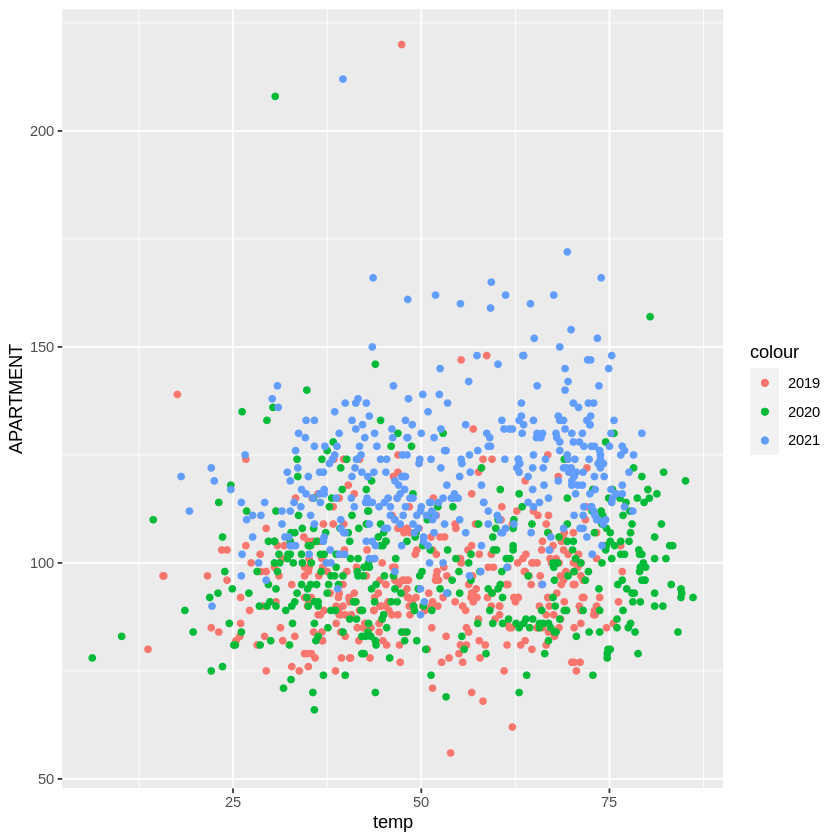

In [364]:
ggplot() +
  geom_point(data=crimes19a, aes(temp, APARTMENT, color="2019")) +
  geom_point(data=crimes20a, aes(temp, APARTMENT, color="2020")) +
  geom_point(data=crimes21a, aes(temp, APARTMENT, color="2021"))

# Street

<br>
<br>
<br>

**Crimes in Streets**
```

```

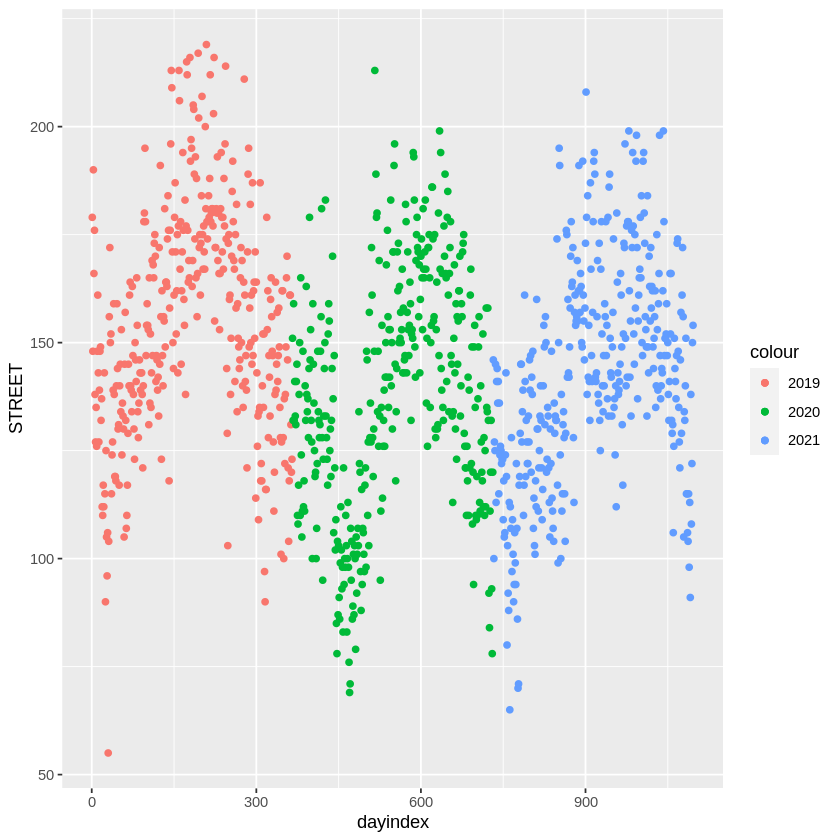

In [365]:
ggplot() +
  geom_point(data=crimes19a[which(crimes19a$STREET <= 300), ], aes(dayindex, STREET, color="2019")) +
  geom_point(data=crimes20a[which(crimes20a$STREET <= 300), ], aes(dayindex, STREET, color="2020")) +
  geom_point(data=crimes21a[which(crimes21a$STREET <= 300), ], aes(dayindex, STREET, color="2021"))

# Street vs Weather Data

Temperature vs Street Crime

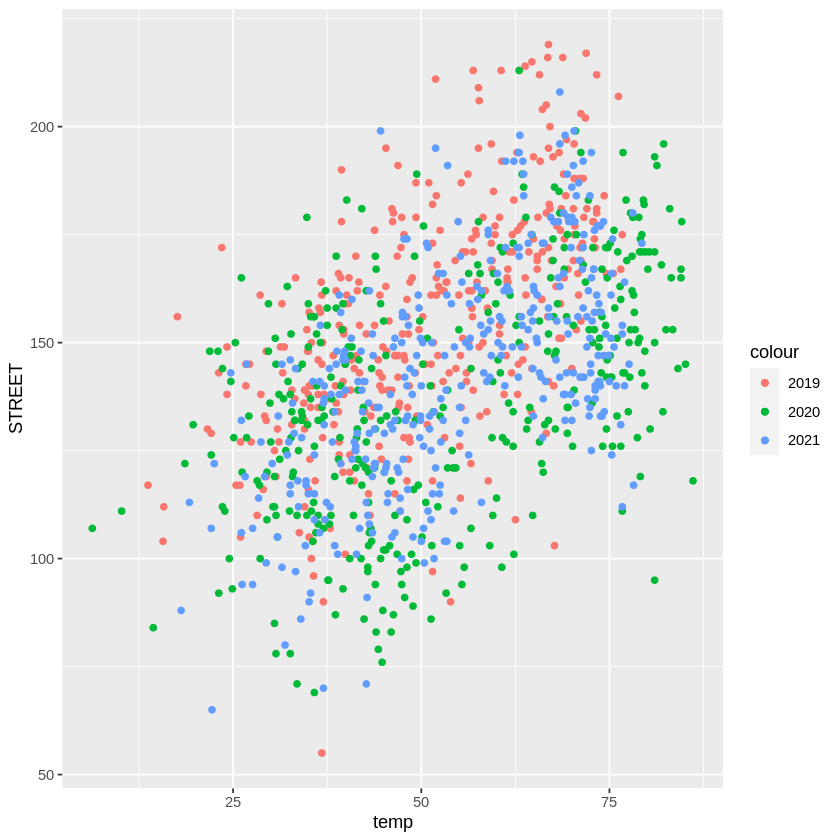

In [366]:
ggplot() +
  geom_point(data=crimes19a, aes(temp, STREET, color="2019")) +
  geom_point(data=crimes20a[which(crimes20a$STREET <= 300), ], aes(temp, STREET, color="2020")) +
  geom_point(data=crimes21a, aes(temp, STREET, color="2021"))

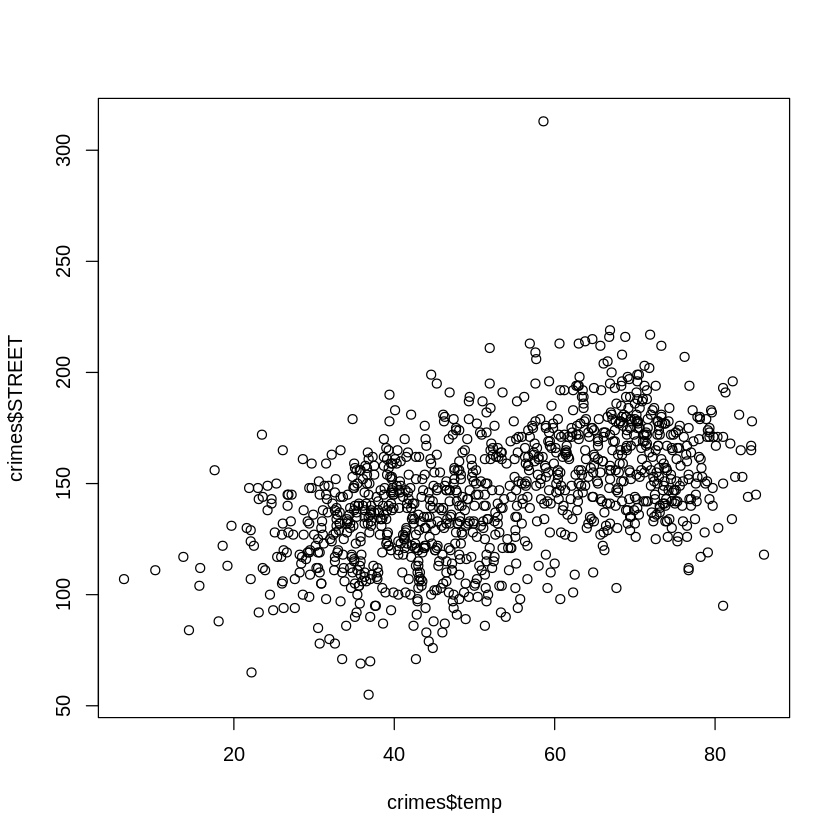

In [367]:
plot(crimes$temp, crimes$STREET)

# Department Store

<br>
<br>
<br>

**Crimes in Department Store**
```

```

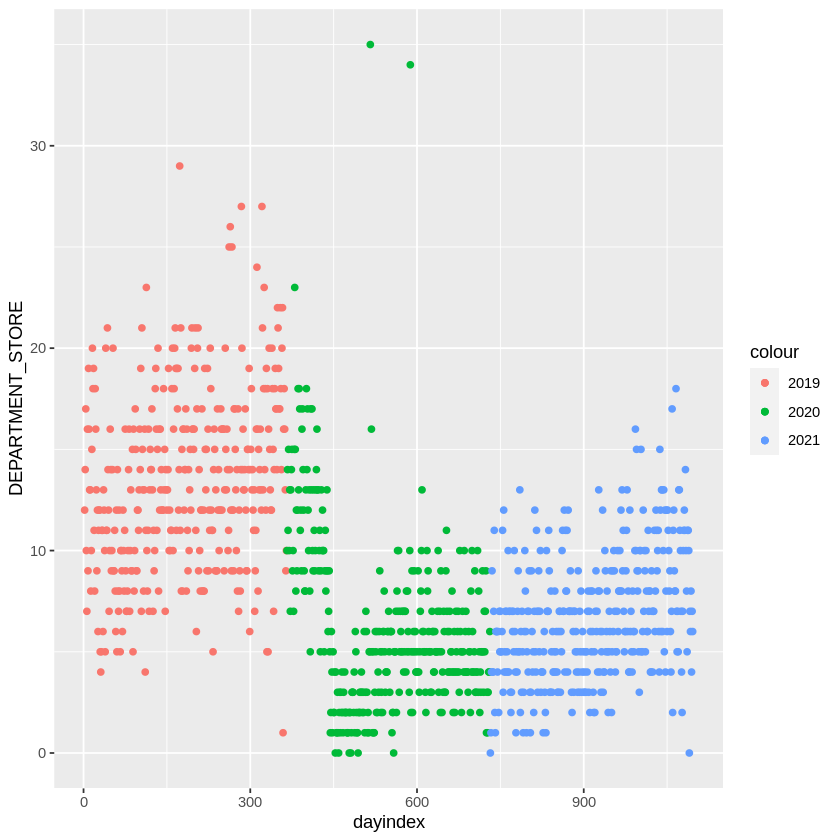

In [368]:
ggplot() +
  geom_point(data=crimes19b, aes(dayindex, DEPARTMENT_STORE, color="2019")) +
  geom_point(data=crimes20b, aes(dayindex, DEPARTMENT_STORE, color="2020")) +
  geom_point(data=crimes21b, aes(dayindex, DEPARTMENT_STORE, color="2021"))

# Bars / Taverns

<br>
<br>
<br>

**Crimes in Bars**
```

```

In [369]:
crimes19d <- crimes19x[which(crimes19x$BAR_OR_TAVERN <= 30), ]
crimes20d <- crimes20x[which(crimes20x$BAR_OR_TAVERN <= 30), ]
crimes21d <- crimes21x[which(crimes21x$BAR_OR_TAVERN <= 30), ]
head(crimes19d);
tail(crimes19d);
head(crimes20d);
tail(crimes20d);
head(crimes21d);
tail(crimes21d);

new_day_num date       year month day dow       dow_num TOTAL_CRIMES
1 2           2019-01-01 2019 1     1   Tuesday   2       1076        
2 3           2019-01-02 2019 1     2   Wednesday 3        655        
3 4           2019-01-03 2019 1     3   Thursday  4        752        
4 5           2019-01-04 2019 1     4   Friday    5        769        
5 6           2019-01-05 2019 1     5   Saturday  6        792        
6 7           2019-01-06 2019 1     6   Sunday    7        664        
  ABANDONED_BUILDING AIRPORT_OR_AIRCRAFT ⋯ slp    visib wdsp mxpsd gust max 
1 1                  0                   ⋯ 1009.2  5.4  18.3 29.9  41.0 54.0
2 1                  3                   ⋯ 1022.9 10.0  10.3 14.0  24.1 55.0
3 1                  5                   ⋯ 1015.6  9.5   9.2 19.0  24.1 46.9
4 0                  2                   ⋯ 1014.4  9.8   9.9 18.1  26.0 46.9
5 0                  2                   ⋯ 1005.8  5.0  11.8 21.0  31.1 46.9
6 1                  4                   ⋯ 1007.1  9.6  13.1 20.0  28.9 46.9
  min  prcp sndp  fog
1 39.9 0.84 999.9 1  
2 28.0 0.61 999.9 0  
3 28.0 0.00 999.9 0  
4 30.9 0.01 999.9 0  
5 30.9 0.25 999.9 0  
6 34.0 0.86 999.9 0

new_day_num date       year month day dow      dow_num TOTAL_CRIMES
360 4           2019-12-26 2019 12    26  Thursday 4       610         
361 5           2019-12-27 2019 12    27  Friday   5       693         
362 6           2019-12-28 2019 12    28  Saturday 6       639         
363 7           2019-12-29 2019 12    29  Sunday   7       689         
364 1           2019-12-30 2019 12    30  Monday   1       616         
365 2           2019-12-31 2019 12    31  Tuesday  2       549         
    ABANDONED_BUILDING AIRPORT_OR_AIRCRAFT ⋯ slp    visib wdsp mxpsd gust  max 
360 2                  0                   ⋯ 1025.7 10.0   5.9 14.0  999.9 46.4
361 2                  3                   ⋯ 1026.1 10.0   7.6 12.0  999.9 48.0
362 0                  3                   ⋯ 1019.1  9.0   9.1 14.0  999.9 48.2
363 0                  7                   ⋯ 1021.7 10.0   6.8 11.1  999.9 48.0
364 1                  1                   ⋯ 1017.1  5.2  13.0 25.1   35.0 45.0
365 0                  2                   ⋯ 1002.6  4.8  14.7 31.1   39.0 52.0
    min  prcp sndp  fog
360 28.9 0.00 999.9 0  
361 28.9 0.00 999.9 0  
362 37.0 0.00 999.9 0  
363 30.9 0.00 999.9 0  
364 30.9 0.39 999.9 0  
365 37.9 0.88 999.9 1

new_day_num date       year month day dow       dow_num TOTAL_CRIMES
366 10          2020-01-01 2020 1     1   Wednesday 3       956         
367 11          2020-01-02 2020 1     2   Thursday  4       636         
368 12          2020-01-03 2020 1     3   Friday    5       697         
369 13          2020-01-04 2020 1     4   Saturday  6       638         
370 14          2020-01-05 2020 1     5   Sunday    7       623         
371  8          2020-01-06 2020 1     6   Monday    1       691         
    ABANDONED_BUILDING AIRPORT_OR_AIRCRAFT ⋯ slp    visib wdsp mxpsd gust  max 
366 0                  0                   ⋯ 1009.1 10.0  10.1 15.0   25.1 42.1
367 0                  2                   ⋯ 1002.3 10.0  13.2 18.1   27.0 48.9
368 3                  4                   ⋯ 1008.2  9.8   5.5  9.9  999.9 46.0
369 0                  2                   ⋯ 1014.8  8.1   8.5 13.0  999.9 36.0
370 0                  3                   ⋯ 1017.9  9.9  12.2 20.0   31.1 43.0
371 0                  3                   ⋯ 1020.1 10.0   9.7 15.0   28.0 42.1
    min  prcp sndp  fog
366 21.9 0.00   1.2 0  
367 37.0 0.00 999.9 0  
368 36.0 0.00 999.9 0  
369 30.2 0.00   1.2 1  
370 25.0 0.01 999.9 0  
371 26.1 0.00 999.9 0

new_day_num date       year month day dow       dow_num TOTAL_CRIMES
726 13          2020-12-26 2020 12    26  Saturday  6       440         
727 14          2020-12-27 2020 12    27  Sunday    7       495         
728  8          2020-12-28 2020 12    28  Monday    1       528         
729  9          2020-12-29 2020 12    29  Tuesday   2       429         
730 10          2020-12-30 2020 12    30  Wednesday 3       474         
731 11          2020-12-31 2020 12    31  Thursday  4       552         
    ABANDONED_BUILDING AIRPORT_OR_AIRCRAFT ⋯ slp    visib wdsp mxpsd gust max 
726 0                  4                   ⋯ 1015.0 10.0   8.7 18.1  26.0 35.1
727 0                  3                   ⋯ 1010.9 10.0   7.4 12.0  24.1 46.9
728 0                  2                   ⋯ 1020.1 10.0  11.2 19.0  31.1 45.0
729 0                  4                   ⋯ 1033.5  8.9   5.8 13.0  22.9 32.0
730 0                  2                   ⋯ 1015.1  6.8  12.9 20.0  28.0 36.0
731 1                  1                   ⋯ 1024.3 10.0   6.1 15.0  24.1 30.2
    min  prcp sndp  fog
726 19.0 0.00 999.9 0  
727 24.1 0.00 999.9 0  
728 28.9 0.00 999.9 1  
729 18.0 0.00   1.2 1  
730 27.0 0.43   1.2 1  
731 24.1 0.01 999.9 0

new_day_num date       year month day dow       dow_num TOTAL_CRIMES
732 19          2021-01-01 2021 1     1   Friday    5       721         
733 20          2021-01-02 2021 1     2   Saturday  6       449         
734 21          2021-01-03 2021 1     3   Sunday    7       515         
735 15          2021-01-04 2021 1     4   Monday    1       531         
736 16          2021-01-05 2021 1     5   Tuesday   2       540         
737 17          2021-01-06 2021 1     6   Wednesday 3       483         
    ABANDONED_BUILDING AIRPORT_OR_AIRCRAFT ⋯ slp    visib wdsp mxpsd gust max 
732 0                  3                   ⋯ 1029.3 10.0   7.6 14.0  20.0 54.0
733 0                  3                   ⋯ 1012.7  7.4  15.4 22.9  34.0 53.1
734 0                  8                   ⋯ 1018.0 10.0  10.3 19.0  27.0 53.1
735 0                  4                   ⋯ 1011.2  9.1  15.7 21.0  28.9 44.1
736 0                  3                   ⋯ 1009.7  8.6  16.0 19.0  26.0 44.1
737 0                  1                   ⋯ 1009.5  9.9  17.3 22.0  28.0 39.9
    min  prcp sndp  fog
732 33.1 0.13 999.9 0  
733 33.1 0.56 999.9 1  
734 39.0 0.00 999.9 0  
735 39.0 0.40 999.9 1  
736 37.0 0.14 999.9 1  
737 35.1 0.01 999.9 1

new_day_num date       year month day dow       dow_num TOTAL_CRIMES
1091 21          2021-12-26 2021 12    26  Sunday    7       443         
1092 15          2021-12-27 2021 12    27  Monday    1       509         
1093 16          2021-12-28 2021 12    28  Tuesday   2       454         
1094 17          2021-12-29 2021 12    29  Wednesday 3       497         
1095 18          2021-12-30 2021 12    30  Thursday  4       549         
1096 19          2021-12-31 2021 12    31  Friday    5       595         
     ABANDONED_BUILDING AIRPORT_OR_AIRCRAFT ⋯ slp    visib wdsp mxpsd gust 
1091 0                  4                   ⋯ 1004.7  8.3  13.7 25.1   32.1
1092 0                  3                   ⋯ 1015.3 10.0  12.4 19.0   26.0
1093 0                  2                   ⋯ 1011.0  9.1   7.5 14.0  999.9
1094 0                  2                   ⋯ 1012.1 10.0   4.1  9.9  999.9
1095 0                  4                   ⋯ 1014.2  9.9   5.4  9.9  999.9
1096 0                  3                   ⋯ 1014.2  8.5   3.4  8.0  999.9
     max  min  prcp sndp  fog
1091 50.0 35.1 0.25 999.9 1  
1092 44.1 36.0 0.03 999.9 0  
1093 48.9 35.1 0.05 999.9 1  
1094 48.9 39.9 0.01 999.9 1  
1095 51.1 41.0 0.00 999.9 0  
1096 51.1 45.0 0.00 999.9 1

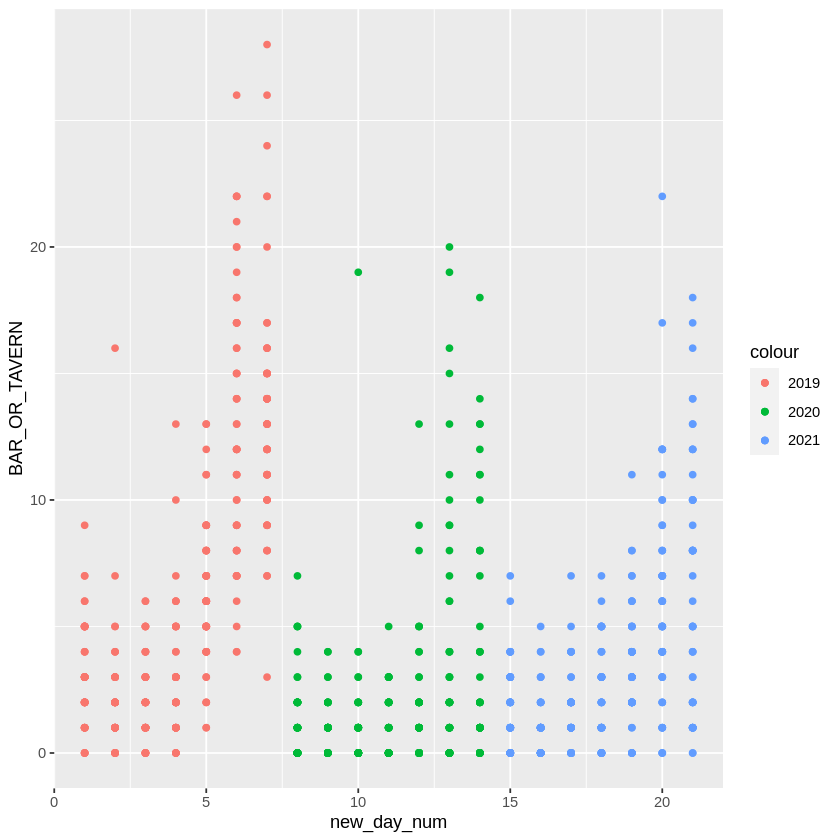

In [370]:
ggplot() +
  geom_point(data=crimes19d, aes(new_day_num, BAR_OR_TAVERN, color="2019")) +
  geom_point(data=crimes20d, aes(new_day_num, BAR_OR_TAVERN, color="2020")) +
  geom_point(data=crimes21d, aes(new_day_num, BAR_OR_TAVERN, color="2021"))

In [371]:
# correlation between day of the week and crimes committed in Bars / Tavern
cor(crimes19d$new_day_num, crimes19d$BAR_OR_TAVERN);
cor(crimes20d$new_day_num, crimes20d$BAR_OR_TAVERN);
cor(crimes21d$new_day_num, crimes21d$BAR_OR_TAVERN);

[1] 0.7139145

[1] 0.2857333

[1] 0.519763

# Bar / Tavern vs Weather Data

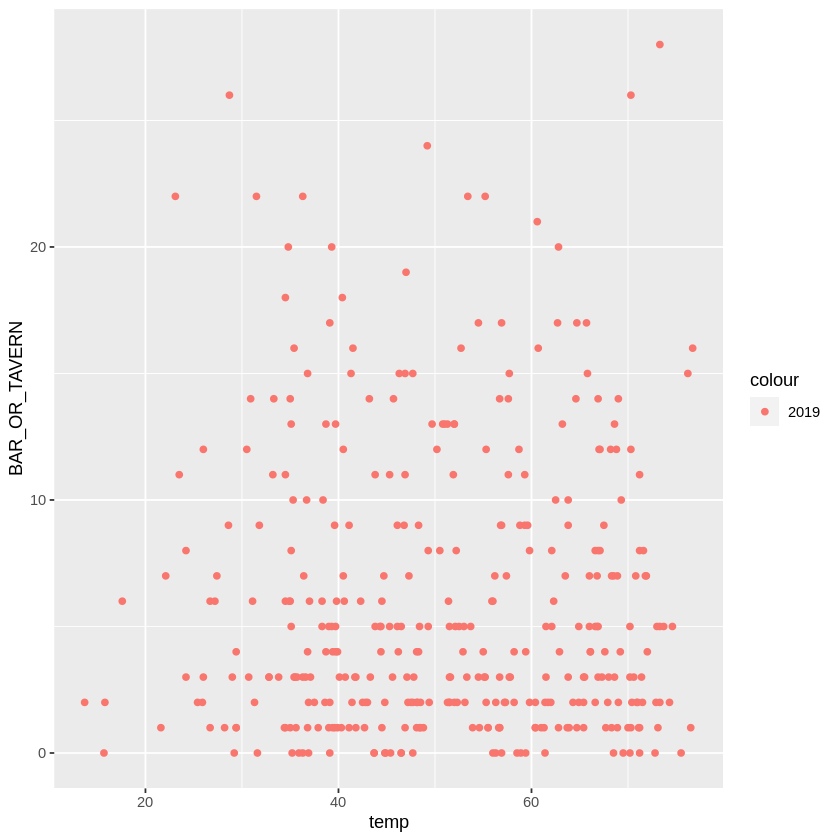

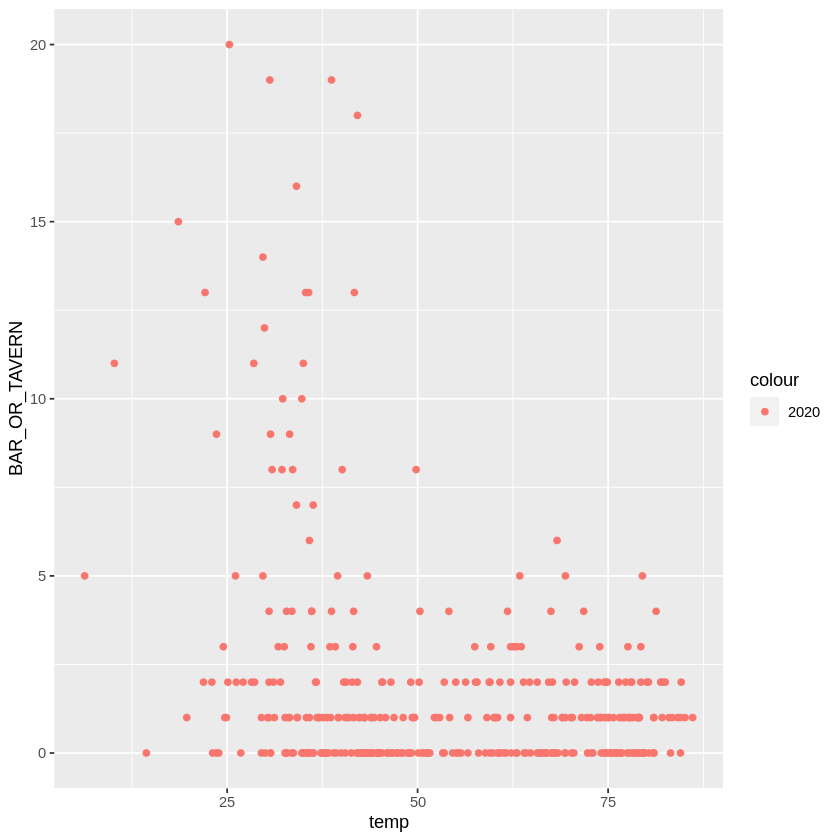

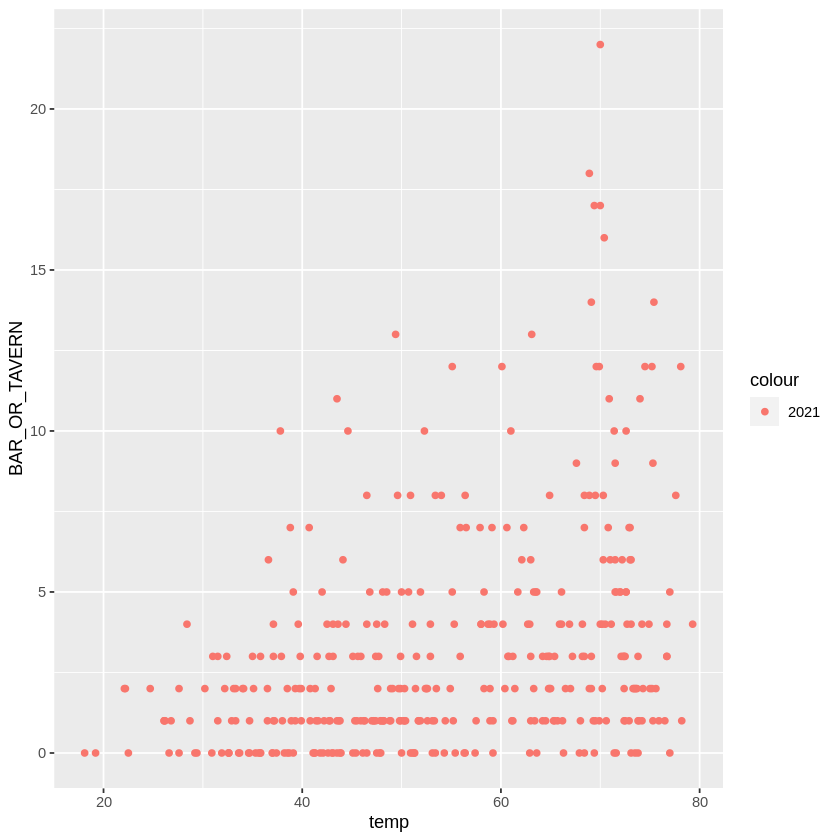

In [372]:
ggplot() +
  geom_point(data=crimes19d[which(crimes19d$TOTAL_CRIMES <= 1000), ], aes(temp, BAR_OR_TAVERN, color="2019"))

ggplot() +
  geom_point(data=crimes20d[which(crimes20d$TOTAL_CRIMES <= 1000), ], aes(temp, BAR_OR_TAVERN, color="2020")) 

ggplot() +
  geom_point(data=crimes21d[which(crimes21d$TOTAL_CRIMES <= 1000), ], aes(temp, BAR_OR_TAVERN, color="2021"))

In [373]:
# correlation between day of the week and crimes committed in Bars / Tavern
cor(crimes19d$temp, crimes19d$BAR_OR_TAVERN);
cor(crimes20d$temp, crimes20d$BAR_OR_TAVERN);
cor(crimes21d$temp, crimes21d$BAR_OR_TAVERN);

[1] -0.01018478

[1] -0.3033583

[1] 0.3581037

<br>
<br>
<br>

**REHASH - Total Crimes vs Temperature**
```

```

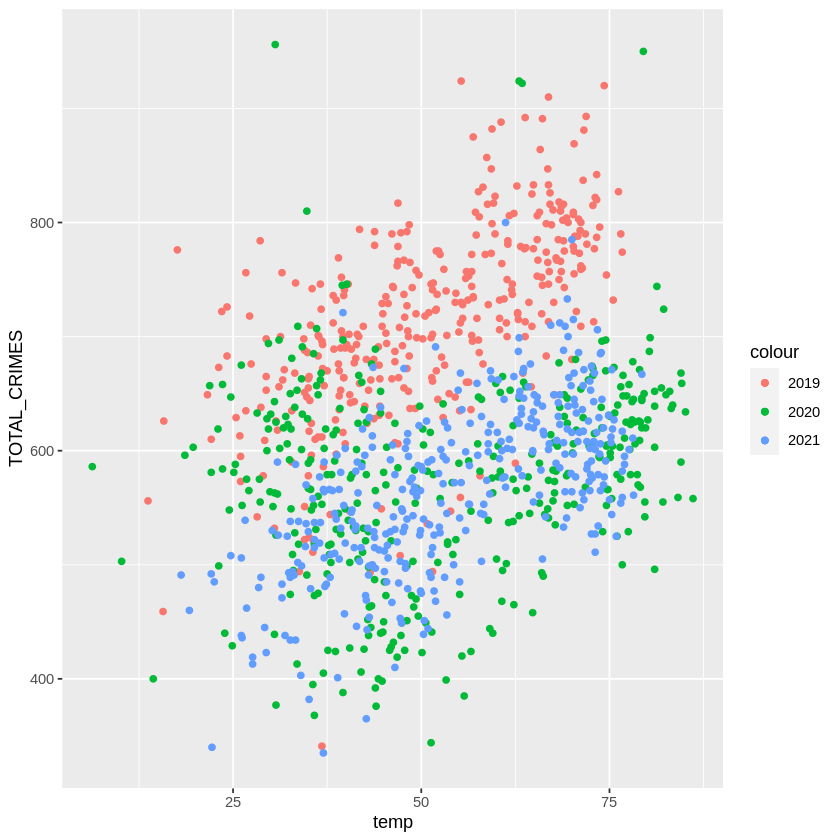

In [374]:
ggplot() +
  geom_point(data=crimes19b, aes(temp, TOTAL_CRIMES, color="2019")) +
  geom_point(data=crimes20b, aes(temp, TOTAL_CRIMES, color="2020")) +
  geom_point(data=crimes21b, aes(temp, TOTAL_CRIMES, color="2021"))

In [375]:
# correlation between temperature and number of crimes committed daily
# 2020 has likely been influenced by covid
cor(crimes19b$temp, crimes19b$TOTAL_CRIMES);
cor(crimes20b$temp, crimes20b$TOTAL_CRIMES);
cor(crimes21b$temp, crimes21b$TOTAL_CRIMES);

[1] 0.6183962

[1] 0.2430774

[1] 0.6236605

# Battery

[1] 0.702476

[1] 0.4449494

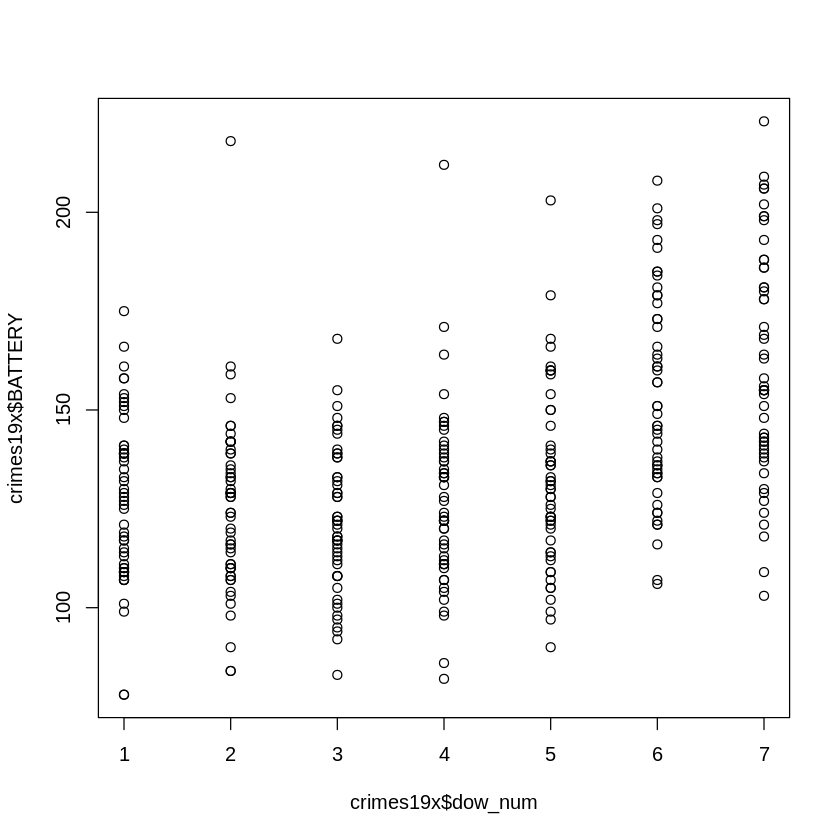

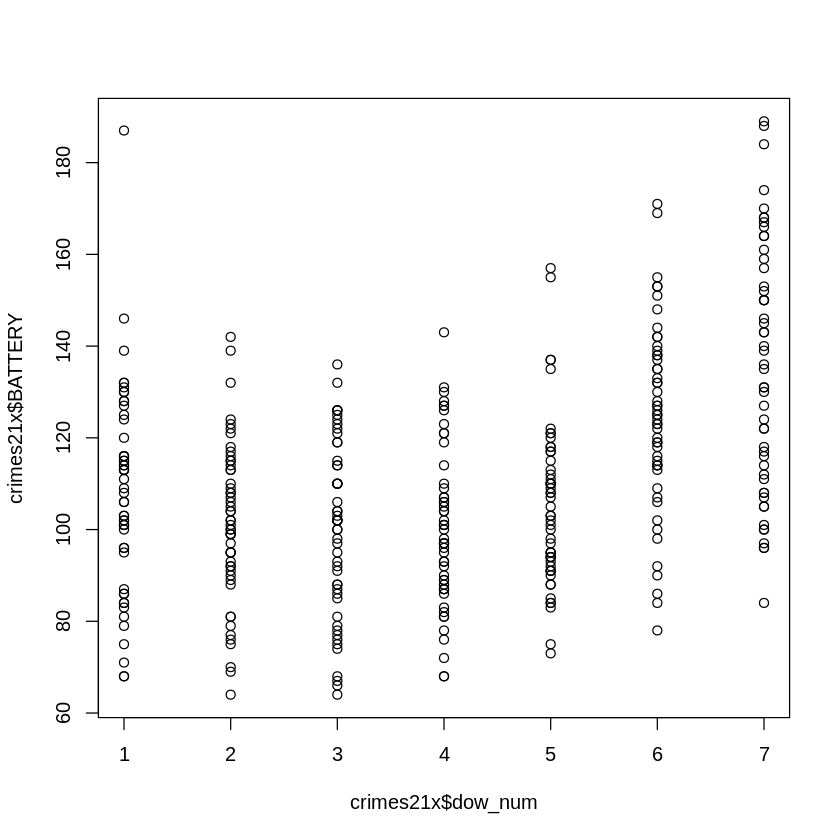

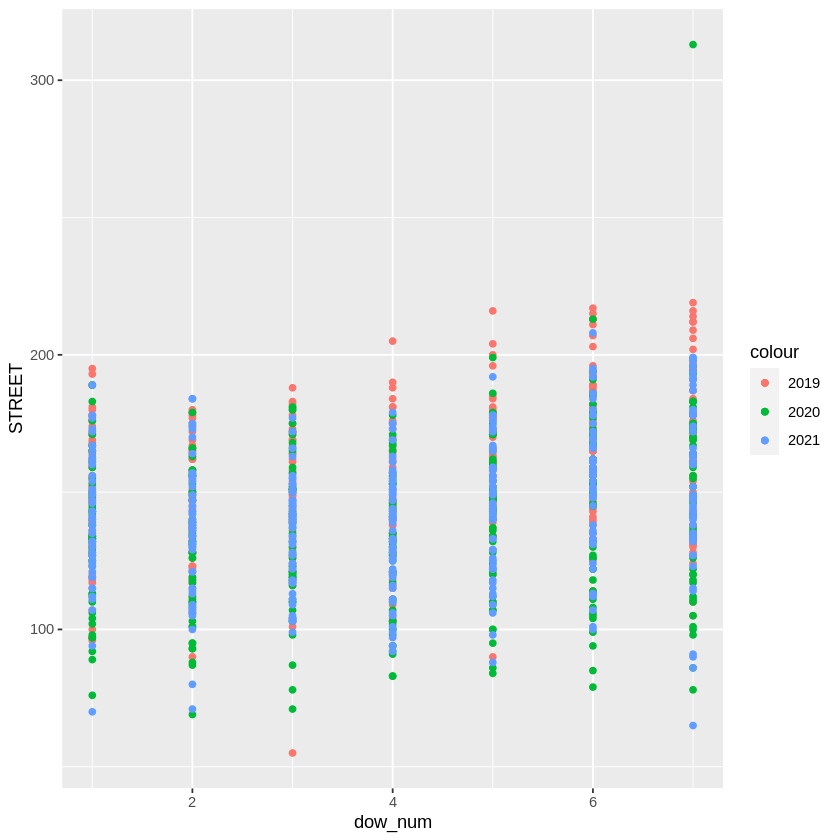

In [376]:
cor(crimes19a$BAR_OR_TAVERN, crimes19a$dow_num);
cor(crimes19a$BATTERY, crimes19a$dow_num);

plot(crimes19x$dow_num, crimes19x$BATTERY);
plot(crimes21x$dow_num, crimes21x$BATTERY);

ggplot() +
  geom_point(data=crimes19x, aes(dow_num, STREET, color="2019")) +
  geom_point(data=crimes20x, aes(dow_num, STREET, color="2020")) +
  geom_point(data=crimes21x, aes(dow_num, STREET, color="2021"))


# Battery vs Weather Data

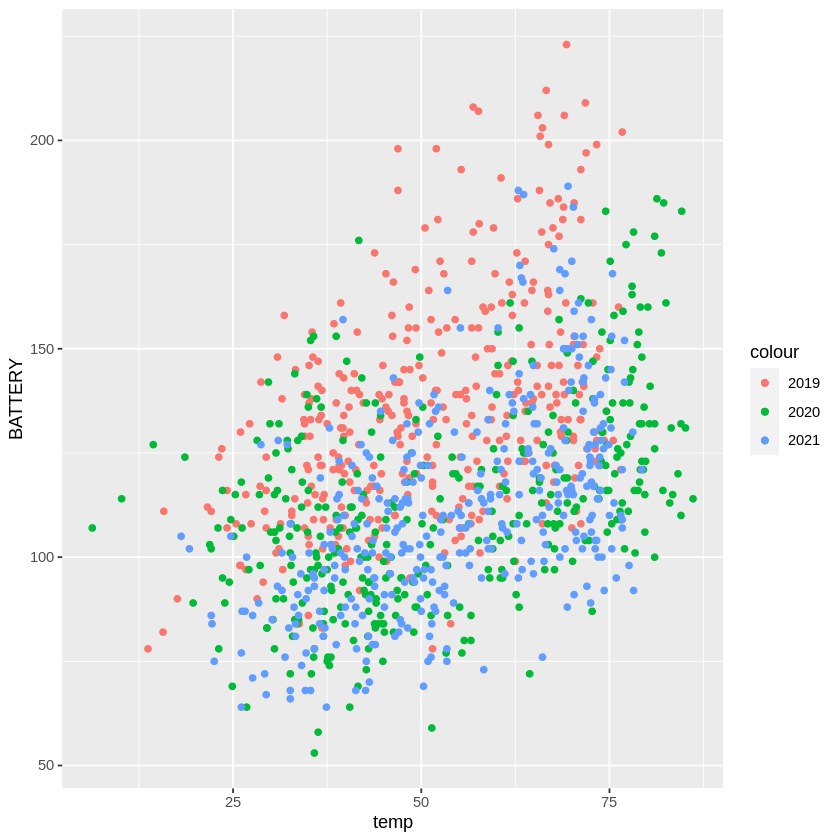

In [377]:
ggplot() +
  geom_point(data=crimes19b[which(crimes19b$BATTERY <= 225),], aes(temp, BATTERY, color="2019")) +
  geom_point(data=crimes20b[which(crimes20b$BATTERY <= 225),], aes(temp, BATTERY, color="2020")) +
  geom_point(data=crimes21b[which(crimes21b$BATTERY <= 225),], aes(temp, BATTERY, color="2021"))

# Analysis Summary

<br>
<br>
<br>

**Summary**

From the results above, it seems that temperature has a large impact on the total crimes committed daily while the day of the week appears to have a much smaller effect than originally anticipated.

However, the day of the week has a much clearer effect on crimes committed in Bars and Taverns therefore, some further analysis could be done on this data instead although 2020 data also appears to be obscured by the pandemic.

For this reason, further analysis will be carried out on the following areas
- total crimes
- bar crimes
- street crimes

analysis will be conducted using the following influencing factors
- temp
- Day of the Week
- min (minimum temperature)
- max (maximum temperature)
```

```


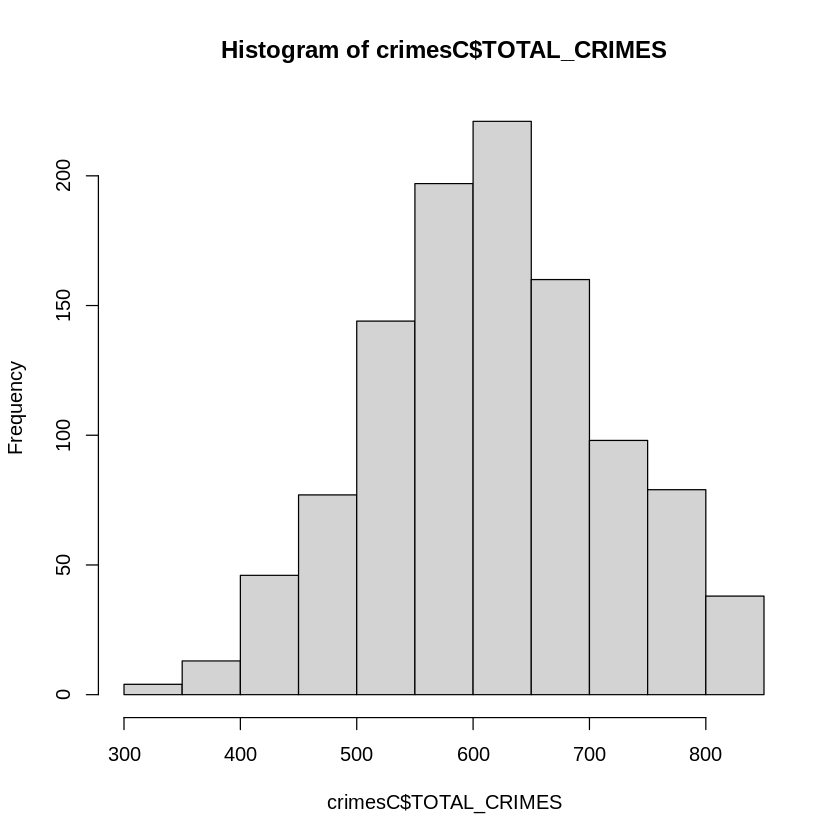

In [378]:
# total crimes 
crimesC <-rbind(crimes19c, crimes20c, crimes21c)
hist(crimesC$TOTAL_CRIMES, breaks =12)



# Export for Linear Predictive Analysis

In [379]:
crimes19x <- crimes19c[which(crimes19c$TOTAL_CRIMES > 1),];
summary(crimes19x$TOTAL_CRIMES)

crimes21x <- crimes21c[which(crimes21c$TOTAL_CRIMES > 1),];
summary(crimes21x$TOTAL_CRIMES)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  341.0   662.0   715.0   707.8   767.0   847.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  335.0   520.0   573.0   567.9   617.0   800.0 

In [380]:
# Perform normalisation (𝑥 −𝑥𝑚𝑖𝑛)/(𝑥𝑚𝑎𝑥 −𝑥𝑚𝑖𝑛)
# 2019 data

calc1 <- crimes19x$TOTAL_CRIMES-341;
calc2 <- 847-341;

crimes19x$TOTAL_CRIMES <- calc1/calc2;
print('2019')
print(crimes19x$TOTAL_CRIMES)

# Perform normalisation (𝑥 −𝑥𝑚𝑖𝑛)/(𝑥𝑚𝑎𝑥 −𝑥𝑚𝑖𝑛)
# 2021 data

calc3 <- crimes21x$TOTAL_CRIMES-335;
calc4 <- 800-335;

crimes21x$TOTAL_CRIMES <- calc3/calc4;
print('2021')
print(crimes21x$TOTAL_CRIMES)

[1] "2019"
  [1] 0.6205534 0.8122530 0.8458498 0.8913043 0.6383399 0.6620553 0.7114625
  [8] 0.5731225 0.6818182 0.8754941 0.6561265 0.4584980 0.5810277 0.7055336
 [15] 0.7094862 0.6166008 0.6462451 0.3577075 0.3003953 0.4249012 0.5632411
 [22] 0.6343874 0.5256917 0.4841897 0.3774704 0.3616601 0.3557312 0.3023715
 [29] 0.0000000 0.2332016 0.8596838 0.7529644 0.5039526 0.7806324 0.6166008
 [36] 0.5830040 0.6501976 0.5948617 0.8201581 0.5869565 0.5632411 0.6403162
 [43] 0.5968379 0.7924901 0.7905138 0.6640316 0.5474308 0.4920949 0.5375494
 [50] 0.5810277 0.7015810 0.7332016 0.6047431 0.4071146 0.5059289 0.5296443
 [57] 0.6086957 0.5019763 0.8201581 0.6403162 0.4150198 0.4011858 0.3972332
 [64] 0.5691700 0.5316206 0.7450593 0.5454545 0.5355731 0.7094862 0.5652174
 [71] 0.6857708 0.6620553 0.7786561 0.8399209 0.5355731 0.6126482 0.5988142
 [78] 0.6956522 0.6877470 0.7272727 0.6897233 0.6067194 0.5889328 0.6541502
 [85] 0.7055336 0.6758893 0.6600791 0.6363636 0.5849802 0.8952569 0.6245059
 

In [381]:
crimes19x1 <- crimes19x[which(crimes19x$BATTERY <= 225),];
crimes21x1 <- crimes21x[which(crimes21x$BATTERY <= 225),];

summary(crimes19x1$BATTERY);
summary(crimes21x1$BATTERY);

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   78.0   116.0   132.0   134.0   146.5   223.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   64.0    95.0   108.0   110.8   124.0   189.0 

In [382]:
# Perform normalisation of Battery data (𝑥 −𝑥𝑚𝑖𝑛)/(𝑥𝑚𝑎𝑥 −𝑥𝑚𝑖𝑛)
# 2019 data

calc1 <- crimes19x1$BATTERY-78;
calc2 <- 223-78;

crimes19x$BATTERY <- calc1/calc2;
print('2019')
print(crimes19x$BATTERY)

# Perform normalisation (𝑥 −𝑥𝑚𝑖𝑛)/(𝑥𝑚𝑎𝑥 −𝑥𝑚𝑖𝑛)
# 2021 data

calc3 <- crimes21x1$BATTERY-64;
calc4 <- 189-64;

crimes21x$BATTERY <- calc3/calc4;
print('2021')
print(crimes21x$BATTERY)


[1] "2019"
  [1] 0.18620690 0.23448276 0.18620690 0.65517241 0.44827586 0.20689655
  [7] 0.31724138 0.15172414 0.24137931 0.26896552 0.31724138 0.35862069
 [13] 0.22758621 0.31724138 0.20689655 0.20000000 0.24827586 0.20000000
 [19] 0.21379310 0.00000000 0.22758621 0.13103448 0.22068966 0.21379310
 [25] 0.19310345 0.17241379 0.21379310 0.04137931 0.03448276 0.02758621
 [31] 0.08275862 0.33103448 0.41379310 0.35172414 0.17931034 0.29655172
 [37] 0.30344828 0.14482759 0.41379310 0.44137931 0.15862069 0.26206897
 [43] 0.26206897 0.52413793 0.28965517 0.45517241 0.48275862 0.22068966
 [49] 0.13793103 0.25517241 0.30344828 0.29655172 0.30344828 0.27586207
 [55] 0.21379310 0.22758621 0.23448276 0.13793103 0.13103448 0.40689655
 [61] 0.35172414 0.20000000 0.08275862 0.20689655 0.22758621 0.37241379
 [67] 0.46896552 0.42758621 0.33793103 0.17241379 0.37241379 0.31724138
 [73] 0.40000000 0.82758621 0.43448276 0.42068966 0.35172414 0.16551724
 [79] 0.42758621 0.40689655 0.57241379 0.45517241 0.2

In [383]:
summary(crimes19x$BATTERY);
summary(crimes19x$TOTAL_CRIMES);

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2621  0.3724  0.3862  0.4724  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.6344  0.7391  0.7248  0.8419  1.0000 

In [384]:
summary(crimes19x$BAR_OR_TAVERN);
summary(crimes21x$BAR_OR_TAVERN);

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   5.932   9.000  35.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   3.145   4.000  22.000 

In [385]:
# Perform normalisation of BAR / TAVERN crimes (𝑥 −𝑥𝑚𝑖𝑛)/(𝑥𝑚𝑎𝑥 −𝑥𝑚𝑖𝑛)
# 2019 data

calc1 <- crimes19x$BAR_OR_TAVERN-0;
calc2 <- 35-0;

crimes19x$BAR_OR_TAVERN <- calc1/calc2;
print('2019')
print(crimes19x$BAR_OR_TAVERN)

# Perform normalisation (𝑥 −𝑥𝑚𝑖𝑛)/(𝑥𝑚𝑎𝑥 −𝑥𝑚𝑖𝑛)
# 2021 data

calc3 <- crimes21x$BAR_OR_TAVERN-0;
calc4 <- 22-0;

crimes21x$BAR_OR_TAVERN <- calc3/calc4;
print('2021')
print(crimes21x$BAR_OR_TAVERN)

[1] "2019"
  [1] 0.17142857 0.02857143 0.14285714 0.31428571 0.37142857 0.20000000
  [7] 0.00000000 0.11428571 0.17142857 0.25714286 0.62857143 0.34285714
 [13] 0.08571429 0.02857143 0.05714286 0.02857143 0.31428571 0.51428571
 [19] 0.40000000 0.05714286 0.05714286 0.00000000 0.14285714 0.17142857
 [25] 0.34285714 0.37142857 0.08571429 0.08571429 0.02857143 0.00000000
 [31] 0.17142857 0.31428571 0.45714286 0.14285714 0.05714286 0.00000000
 [37] 0.05714286 0.17142857 0.62857143 0.74285714 0.08571429 0.11428571
 [43] 0.02857143 0.08571429 0.17142857 0.25714286 0.40000000 0.08571429
 [49] 0.05714286 0.02857143 0.11428571 0.14285714 0.57142857 0.34285714
 [55] 0.11428571 0.00000000 0.02857143 0.08571429 0.17142857 0.22857143
 [61] 0.31428571 0.02857143 0.02857143 0.05714286 0.20000000 0.17142857
 [67] 0.14285714 0.42857143 0.08571429 0.05714286 0.02857143 0.02857143
 [73] 0.14285714 1.00000000 0.62857143 0.17142857 0.00000000 0.05714286
 [79] 0.08571429 0.17142857 0.57142857 0.48571429 0.0

In [386]:
# ignore 2020 data because of pandemic disruption to data
crimesX <- rbind(crimes19x, crimes21x)
summary(crimesX)

    dayindex        dayofyear              date          year     
 Min.   :   2.0   Min.   :  1.00   2019-01-02:  1   Min.   :2019  
 1st Qu.: 186.5   1st Qu.: 90.75   2019-01-03:  1   1st Qu.:2019  
 Median : 738.5   Median :182.50   2019-01-04:  1   Median :2021  
 Mean   : 555.5   Mean   :182.86   2019-01-05:  1   Mean   :2020  
 3rd Qu.: 917.2   3rd Qu.:275.25   2019-01-06:  1   3rd Qu.:2021  
 Max.   :1096.0   Max.   :365.00   2019-01-07:  1   Max.   :2021  
                                   (Other)   :710                 
     month             day              dow         dow_num     
 Min.   : 1.000   Min.   : 1.0   Friday   :102   Min.   :1.000  
 1st Qu.: 3.750   1st Qu.: 8.0   Monday   :103   1st Qu.:2.000  
 Median : 7.000   Median :16.0   Saturday : 98   Median :4.000  
 Mean   : 6.515   Mean   :15.9   Sunday   :103   Mean   :3.983  
 3rd Qu.:10.000   3rd Qu.:23.0   Thursday :103   3rd Qu.:6.000  
 Max.   :12.000   Max.   :31.0   Tuesday  :103   Max.   :7.000  
         

In [387]:
c(crimesX)

$dayindex
  [1]    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16
 [16]   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31
 [31]   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46
 [46]   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61
 [61]   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76
 [76]   77   78   79   80   81   82   83   84   85   86   87   88   89   90   91
 [91]   92   93   94   95   96   97   98   99  100  101  102  103  104  105  106
[106]  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121
[121]  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136
[136]  137  138  139  140  141  142  143  144  146  147  148  149  150  151  153
[151]  154  155  156  157  158  160  161  162  163  164  165  166  167  168  169
[166]  170  171  172  173  174  175  176  177  178  179  181  183  184  185  187
[181]  188  189  190  191  192  193  195  196  197  198  199  200  201  202  203
[196]  204  205  206  207  208  209  210  211  212  216  217  218  219  220  221
[211]  222  223  224  225  226  227  228  229  230  231  232  233  234  235  236
[226]  237  238  239  240  241  242  243  245  246  247  248  249  250  251  252
[241]  253  254  255  256  257  258  259  260  261  262  263  264  265  266  267
[256]  268  269  270  271  272  273  275  276  277  278  279  280  281  282  283
[271]  284  285  286  287  288  289  290  291  292  293  294  295  296  297  298
[286]  299  300  301  302  303  304  306  307  308  309  310  311  312  313  314
[301]  315  316  317  318  319  320  321  322  323  324  325  326  327  328  329
[316]  330  331  332  333  334  335  336  337  338  339  340  341  342  343  344
[331]  345  346  347  348  349  350  351  352  353  354  355  356  357  358  359
[346]  360  361  362  363  364  365  732  733  734  735  736  737  738  739  740
[361]  741  742  743  744  745  746  747  748  749  750  751  752  753  754  755
[376]  756  757  758  759  760  761  762  763  764  765  766  767  768  769  770
[391]  771  772  773  774  775  776  777  778  779  780  781  782  783  784  785
[406]  786  787  788  789  790  791  792  793  794  795  796  797  798  799  800
[421]  801  802  803  804  805  806  807  808  809  810  811  812  813  814  815
[436]  816  817  818  819  820  821  822  823  824  825  826  827  828  829  830
[451]  831  832  833  834  835  836  837  838  839  840  841  842  843  844  845
[466]  846  847  848  849  850  851  852  853  854  855  856  857  858  859  860
[481]  861  862  863  864  865  866  867  868  869  870  871  872  873  874  875
[496]  876  877  878  879  880  881  882  883  884  885  886  887  888  889  890
[511]  891  892  893  894  895  896  897  898  899  900  901  902  903  904  905
[526]  906  907  908  909  910  911  912  913  914  915  916  917  918  919  920
[541]  921  922  923  924  925  926  927  928  929  930  931  932  933  934  935
[556]  936  937  938  939  940  941  942  943  944  945  946  947  948  949  950
[571]  951  952  953  954  955  956  957  958  959  960  961  962  963  964  965
[586]  966  967  968  969  970  971  972  973  974  975  976  977  978  979  980
[601]  981  982  983  984  985  986  987  988  989  990  991  992  993  994  995
[616]  996  997  998  999 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010
[631] 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025
[646] 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040
[661] 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
[676] 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070
[691] 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085
[706] 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096

$dayofyear
  [1]   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
 [19]  20  21  22  23  24  25  2

In [388]:
cor(crimes19d$temp, crimes19d$BAR_OR_TAVERN);
cor(crimes21d$temp, crimes21d$BAR_OR_TAVERN);
cor(crimesX$temp, crimesX$BAR_OR_TAVERN);

[1] -0.01018478

[1] 0.3581037

[1] 0.1525796

In [389]:
# dow vs total crimes
linearRegression_DOW_TOTALCRIMES <- crimesX[,c(8, 9)];

# dow vs temp vs total crimes
linearRegression_DOW_TEMP_TOTALCRIMES <- crimesX[,c(8, 131, 9)];

# dow vs Bar_Tavern
linearRegression_DOW_BAR <- crimesX[,c(8, 21)];

# dow vs Bar_Tavern vs temp
linearRegression_DOW_BAR_TEMP <- crimesX[,c(8, 131, 21)];

# dow vs Battery Crimes
linearRegression_DOW_BATTERY <- crimesX[,c(8, 101)];

# dow vs Battery Crimes vs temp
linearRegression_DOW_BATTERY_TEMP <- crimesX[,c(8, 131, 101)];

# all of the above dow, temp, total crimes, bar crimes, battery crimes
linearRegression_ALL <- crimesX[,c(8, 131, 9, 21, 101)];


head(linearRegression_DOW_TOTALCRIMES);
head(linearRegression_DOW_TEMP_TOTALCRIMES);
head(linearRegression_DOW_BAR);
head(linearRegression_DOW_BAR_TEMP);
head(linearRegression_DOW_BATTERY);
head(linearRegression_DOW_BATTERY_TEMP);
head(linearRegression_ALL);

dow_num TOTAL_CRIMES
2 3       0.6205534   
3 4       0.8122530   
4 5       0.8458498   
5 6       0.8913043   
6 7       0.6383399   
7 1       0.6620553

dow_num temp TOTAL_CRIMES
2 3       35.0 0.6205534   
3 4       39.4 0.8122530   
4 5       39.0 0.8458498   
5 6       43.8 0.8913043   
6 7       39.7 0.6383399   
7 1       27.4 0.6620553

dow_num BAR_OR_TAVERN
2 3       0.17142857   
3 4       0.02857143   
4 5       0.14285714   
5 6       0.31428571   
6 7       0.37142857   
7 1       0.20000000

dow_num temp BAR_OR_TAVERN
2 3       35.0 0.17142857   
3 4       39.4 0.02857143   
4 5       39.0 0.14285714   
5 6       43.8 0.31428571   
6 7       39.7 0.37142857   
7 1       27.4 0.20000000

dow_num BATTERY  
2 3       0.1862069
3 4       0.2344828
4 5       0.1862069
5 6       0.6551724
6 7       0.4482759
7 1       0.2068966

dow_num temp BATTERY  
2 3       35.0 0.1862069
3 4       39.4 0.2344828
4 5       39.0 0.1862069
5 6       43.8 0.6551724
6 7       39.7 0.4482759
7 1       27.4 0.2068966

dow_num temp TOTAL_CRIMES BAR_OR_TAVERN BATTERY  
2 3       35.0 0.6205534    0.17142857    0.1862069
3 4       39.4 0.8122530    0.02857143    0.2344828
4 5       39.0 0.8458498    0.14285714    0.1862069
5 6       43.8 0.8913043    0.31428571    0.6551724
6 7       39.7 0.6383399    0.37142857    0.4482759
7 1       27.4 0.6620553    0.20000000    0.2068966

In [390]:
# export linear data to csv's
write.csv(linearRegression_DOW_TOTALCRIMES, file="/content/linearRegression_DOW_TOTALCRIMES.csv");
write.csv(linearRegression_DOW_TEMP_TOTALCRIMES, file="/content/linearRegression_DOW_TEMP_TOTALCRIMES.csv");
write.csv(linearRegression_DOW_BAR, file="/content/linearRegression_DOW_BAR.csv");
write.csv(linearRegression_DOW_BAR_TEMP, file="/content/linearRegression_DOW_BAR_TEMP.csv");
write.csv(linearRegression_DOW_BATTERY, file="/content/linearRegression_DOW_BATTERY.csv");
write.csv(linearRegression_DOW_BATTERY_TEMP, file="/content/linearRegression_DOW_BATTERY_TEMP.csv");
write.csv(linearRegression_ALL, file="/content/linearRegression_ALL.csv");

# Export for Neural Network Predictive Analysis

In [392]:
crimesNN <- crimesX;
head(crimesX)

dayindex dayofyear date       year month day dow       dow_num TOTAL_CRIMES
2 2        2         2019-01-02 2019 1     2   Wednesday 3       0.6205534   
3 3        3         2019-01-03 2019 1     3   Thursday  4       0.8122530   
4 4        4         2019-01-04 2019 1     4   Friday    5       0.8458498   
5 5        5         2019-01-05 2019 1     5   Saturday  6       0.8913043   
6 6        6         2019-01-06 2019 1     6   Sunday    7       0.6383399   
7 7        7         2019-01-07 2019 1     7   Monday    1       0.6620553   
  ABANDONED_BUILDING ⋯ slp    visib wdsp mxpsd gust max  min  prcp sndp  fog
2 1                  ⋯ 1022.9 10.0  10.3 14.0  24.1 55.0 28.0 0.61 999.9 0  
3 1                  ⋯ 1015.6  9.5   9.2 19.0  24.1 46.9 28.0 0.00 999.9 0  
4 0                  ⋯ 1014.4  9.8   9.9 18.1  26.0 46.9 30.9 0.01 999.9 0  
5 0                  ⋯ 1005.8  5.0  11.8 21.0  31.1 46.9 30.9 0.25 999.9 0  
6 1                  ⋯ 1007.1  9.6  13.1 20.0  28.9 46.9 34.0 0.86 999.9 0  
7 0                  ⋯ 1024.8 10.0  17.4 22.0  31.1 45.0 21.9 0.00 999.9 0

In [393]:
# swap month from numerical value to name
crimesNN$month[crimesNN$month == 1] <- 'Jan'
crimesNN$month[crimesNN$month == 2] <- 'Feb'
crimesNN$month[crimesNN$month == 3] <- 'Mar'
crimesNN$month[crimesNN$month == 4] <- 'Apr'
crimesNN$month[crimesNN$month == 5] <- 'May'
crimesNN$month[crimesNN$month == 6] <- 'Jun'
crimesNN$month[crimesNN$month == 7] <- 'Jul'
crimesNN$month[crimesNN$month == 8] <- 'Aug'
crimesNN$month[crimesNN$month == 9] <- 'Sep'
crimesNN$month[crimesNN$month == 10] <- 'Oct'
crimesNN$month[crimesNN$month == 11] <- 'Nov'
crimesNN$month[crimesNN$month == 12] <- 'Dec'

head(crimesNN)

dayindex dayofyear date       year month day dow       dow_num TOTAL_CRIMES
2 2        2         2019-01-02 2019 Jan   2   Wednesday 3       0.6205534   
3 3        3         2019-01-03 2019 Jan   3   Thursday  4       0.8122530   
4 4        4         2019-01-04 2019 Jan   4   Friday    5       0.8458498   
5 5        5         2019-01-05 2019 Jan   5   Saturday  6       0.8913043   
6 6        6         2019-01-06 2019 Jan   6   Sunday    7       0.6383399   
7 7        7         2019-01-07 2019 Jan   7   Monday    1       0.6620553   
  ABANDONED_BUILDING ⋯ slp    visib wdsp mxpsd gust max  min  prcp sndp  fog
2 1                  ⋯ 1022.9 10.0  10.3 14.0  24.1 55.0 28.0 0.61 999.9 0  
3 1                  ⋯ 1015.6  9.5   9.2 19.0  24.1 46.9 28.0 0.00 999.9 0  
4 0                  ⋯ 1014.4  9.8   9.9 18.1  26.0 46.9 30.9 0.01 999.9 0  
5 0                  ⋯ 1005.8  5.0  11.8 21.0  31.1 46.9 30.9 0.25 999.9 0  
6 1                  ⋯ 1007.1  9.6  13.1 20.0  28.9 46.9 34.0 0.86 999.9 0  
7 0                  ⋯ 1024.8 10.0  17.4 22.0  31.1 45.0 21.9 0.00 999.9 0

In [394]:
# apply hot encoding to month and Day of the week

months <- model.matrix(~0+crimesNN$month)
head(months)

crimesNN$monthApr crimesNN$monthAug crimesNN$monthDec crimesNN$monthFeb
1 0                 0                 0                 0                
2 0                 0                 0                 0                
3 0                 0                 0                 0                
4 0                 0                 0                 0                
5 0                 0                 0                 0                
6 0                 0                 0                 0                
  crimesNN$monthJan crimesNN$monthJul crimesNN$monthJun crimesNN$monthMar
1 1                 0                 0                 0                
2 1                 0                 0                 0                
3 1                 0                 0                 0                
4 1                 0                 0                 0                
5 1                 0                 0                 0                
6 1                 0                 0                 0                
  crimesNN$monthMay crimesNN$monthNov crimesNN$monthOct crimesNN$monthSep
1 0                 0                 0                 0                
2 0                 0                 0                 0                
3 0                 0                 0                 0                
4 0                 0                 0                 0                
5 0                 0                 0                 0                
6 0                 0                 0                 0

In [395]:
# edit column names
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")
head(months)

Apr Aug Dec Feb Jan Jul Jun Mar May Nov Oct Sep
1 0   0   0   0   1   0   0   0   0   0   0   0  
2 0   0   0   0   1   0   0   0   0   0   0   0  
3 0   0   0   0   1   0   0   0   0   0   0   0  
4 0   0   0   0   1   0   0   0   0   0   0   0  
5 0   0   0   0   1   0   0   0   0   0   0   0  
6 0   0   0   0   1   0   0   0   0   0   0   0

In [396]:
# hot encode day of the week

daysofweek <- model.matrix(~0+crimesNN$dow)
head(daysofweek)

crimesNN$dowFriday crimesNN$dowMonday crimesNN$dowSaturday crimesNN$dowSunday
1 0                  0                  0                    0                 
2 0                  0                  0                    0                 
3 1                  0                  0                    0                 
4 0                  0                  1                    0                 
5 0                  0                  0                    1                 
6 0                  1                  0                    0                 
  crimesNN$dowThursday crimesNN$dowTuesday crimesNN$dowWednesday
1 0                    0                   1                    
2 1                    0                   0                    
3 0                    0                   0                    
4 0                    0                   0                    
5 0                    0                   0                    
6 0                    0                   0

In [397]:
# edit column names
colnames(daysofweek) <- c("Friday", "Monday", "Saturday", "Sunday", "Thusday", "Tuesday", "Wednesday");
head(daysofweek)

Friday Monday Saturday Sunday Thusday Tuesday Wednesday
1 0      0      0        0      0       0       1        
2 0      0      0        0      1       0       0        
3 1      0      0        0      0       0       0        
4 0      0      1        0      0       0       0        
5 0      0      0        1      0       0       0        
6 0      1      0        0      0       0       0

In [398]:
crimes_nndata <- data.frame(months, daysofweek, crimesX$year, crimesX$temp, crimesX$TOTAL_CRIMES, crimesX$BAR_OR_TAVERN, crimesX$BATTERY);
head(crimes_nndata)

Apr Aug Dec Feb Jan Jul Jun Mar May Nov ⋯ Saturday Sunday Thusday Tuesday
1 0   0   0   0   1   0   0   0   0   0   ⋯ 0        0      0       0      
2 0   0   0   0   1   0   0   0   0   0   ⋯ 0        0      1       0      
3 0   0   0   0   1   0   0   0   0   0   ⋯ 0        0      0       0      
4 0   0   0   0   1   0   0   0   0   0   ⋯ 1        0      0       0      
5 0   0   0   0   1   0   0   0   0   0   ⋯ 0        1      0       0      
6 0   0   0   0   1   0   0   0   0   0   ⋯ 0        0      0       0      
  Wednesday crimesX.year crimesX.temp crimesX.TOTAL_CRIMES
1 1         2019         35.0         0.6205534           
2 0         2019         39.4         0.8122530           
3 0         2019         39.0         0.8458498           
4 0         2019         43.8         0.8913043           
5 0         2019         39.7         0.6383399           
6 0         2019         27.4         0.6620553           
  crimesX.BAR_OR_TAVERN crimesX.BATTERY
1 0.17142857            0.1862069      
2 0.02857143            0.2344828      
3 0.14285714            0.1862069      
4 0.31428571            0.6551724      
5 0.37142857            0.4482759      
6 0.20000000            0.2068966

In [399]:
# edit remaining column names
colnames(crimes_nndata)[which(names(crimes_nndata) == "crimesX.year")] <- "year"
colnames(crimes_nndata)[which(names(crimes_nndata) == "crimesX.temp")] <- "temp"
colnames(crimes_nndata)[which(names(crimes_nndata) == "crimesX.BAR_OR_TAVERN")] <- "BAR_TAVERN"
colnames(crimes_nndata)[which(names(crimes_nndata) == "crimesX.BATTERY")] <- "BATTERY"
colnames(crimes_nndata)[which(names(crimes_nndata) == "crimesX.TOTAL_CRIMES")] <- "TOTAL_CRIMES"

In [400]:
# check final result
head(crimes_nndata);
tail(crimes_nndata);
summary(crimes_nndata);

Apr Aug Dec Feb Jan Jul Jun Mar May Nov ⋯ Saturday Sunday Thusday Tuesday
1 0   0   0   0   1   0   0   0   0   0   ⋯ 0        0      0       0      
2 0   0   0   0   1   0   0   0   0   0   ⋯ 0        0      1       0      
3 0   0   0   0   1   0   0   0   0   0   ⋯ 0        0      0       0      
4 0   0   0   0   1   0   0   0   0   0   ⋯ 1        0      0       0      
5 0   0   0   0   1   0   0   0   0   0   ⋯ 0        1      0       0      
6 0   0   0   0   1   0   0   0   0   0   ⋯ 0        0      0       0      
  Wednesday year temp TOTAL_CRIMES BAR_TAVERN BATTERY  
1 1         2019 35.0 0.6205534    0.17142857 0.1862069
2 0         2019 39.4 0.8122530    0.02857143 0.2344828
3 0         2019 39.0 0.8458498    0.14285714 0.1862069
4 0         2019 43.8 0.8913043    0.31428571 0.6551724
5 0         2019 39.7 0.6383399    0.37142857 0.4482759
6 0         2019 27.4 0.6620553    0.20000000 0.2068966

Apr Aug Dec Feb Jan Jul Jun Mar May Nov ⋯ Saturday Sunday Thusday Tuesday
711 0   0   1   0   0   0   0   0   0   0   ⋯ 0        1      0       0      
712 0   0   1   0   0   0   0   0   0   0   ⋯ 0        0      0       0      
713 0   0   1   0   0   0   0   0   0   0   ⋯ 0        0      0       1      
714 0   0   1   0   0   0   0   0   0   0   ⋯ 0        0      0       0      
715 0   0   1   0   0   0   0   0   0   0   ⋯ 0        0      1       0      
716 0   0   1   0   0   0   0   0   0   0   ⋯ 0        0      0       0      
    Wednesday year temp TOTAL_CRIMES BAR_TAVERN BATTERY
711 0         2021 42.8 0.2322581    0.04545455 0.352  
712 0         2021 38.0 0.3741935    0.04545455 0.312  
713 0         2021 43.1 0.2559140    0.00000000 0.048  
714 1         2021 43.9 0.3483871    0.00000000 0.120  
715 0         2021 47.4 0.4602151    0.13636364 0.296  
716 0         2021 48.3 0.5591398    0.18181818 0.392

      Apr              Aug              Dec               Feb         
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0000   Median :0.0000   Median :0.00000   Median :0.00000  
 Mean   :0.0838   Mean   :0.0824   Mean   :0.08659   Mean   :0.07821  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.00000  
      Jan              Jul              Jun               Mar         
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0000   Median :0.0000   Median :0.00000   Median :0.00000  
 Mean   :0.0852   Mean   :0.0824   Mean   :0.07961   Mean   :0.08659  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.00000  
      

In [401]:
print(crimes_nndata)

    Apr Aug Dec Feb Jan Jul Jun Mar May Nov Oct Sep Friday Monday Saturday
1     0   0   0   0   1   0   0   0   0   0   0   0      0      0        0
2     0   0   0   0   1   0   0   0   0   0   0   0      0      0        0
3     0   0   0   0   1   0   0   0   0   0   0   0      1      0        0
4     0   0   0   0   1   0   0   0   0   0   0   0      0      0        1
5     0   0   0   0   1   0   0   0   0   0   0   0      0      0        0
6     0   0   0   0   1   0   0   0   0   0   0   0      0      1        0
7     0   0   0   0   1   0   0   0   0   0   0   0      0      0        0
8     0   0   0   0   1   0   0   0   0   0   0   0      0      0        0
9     0   0   0   0   1   0   0   0   0   0   0   0      0      0        0
10    0   0   0   0   1   0   0   0   0   0   0   0      1      0        0
11    0   0   0   0   1   0   0   0   0   0   0   0      0      0        1
12    0   0   0   0   1   0   0   0   0   0   0   0      0      0        0
13    0   0   0   0   1  

In [402]:
write.csv(crimes_nndata, file="/content/crimes_nndata.csv")

# Additional Explorative Analysis

<br>
<br>
<br>

**Crimes vs Day of the Week**
```

```


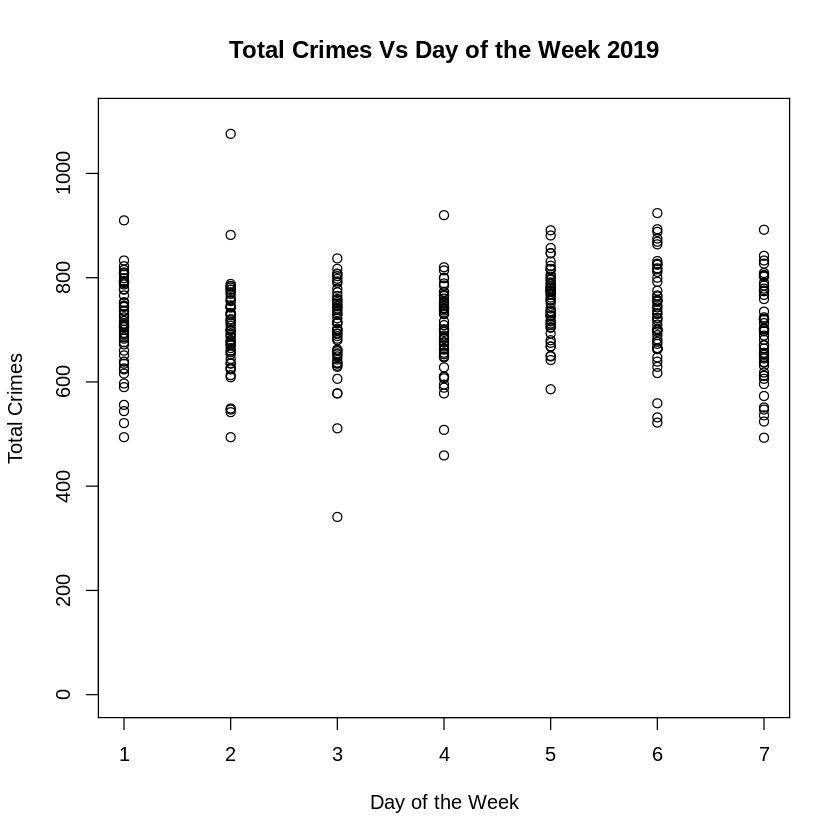

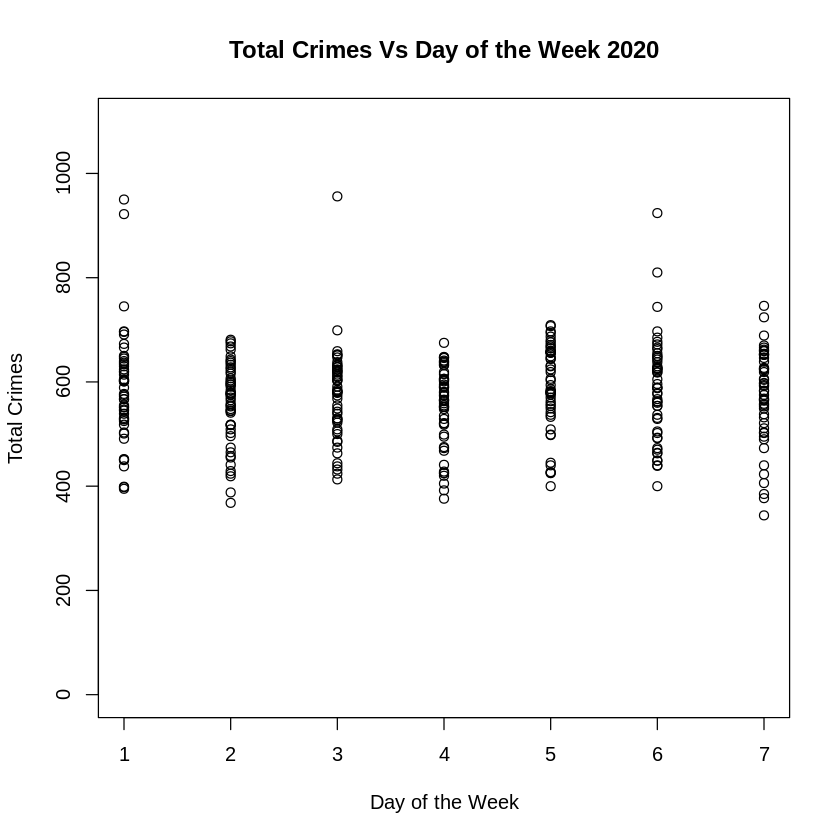

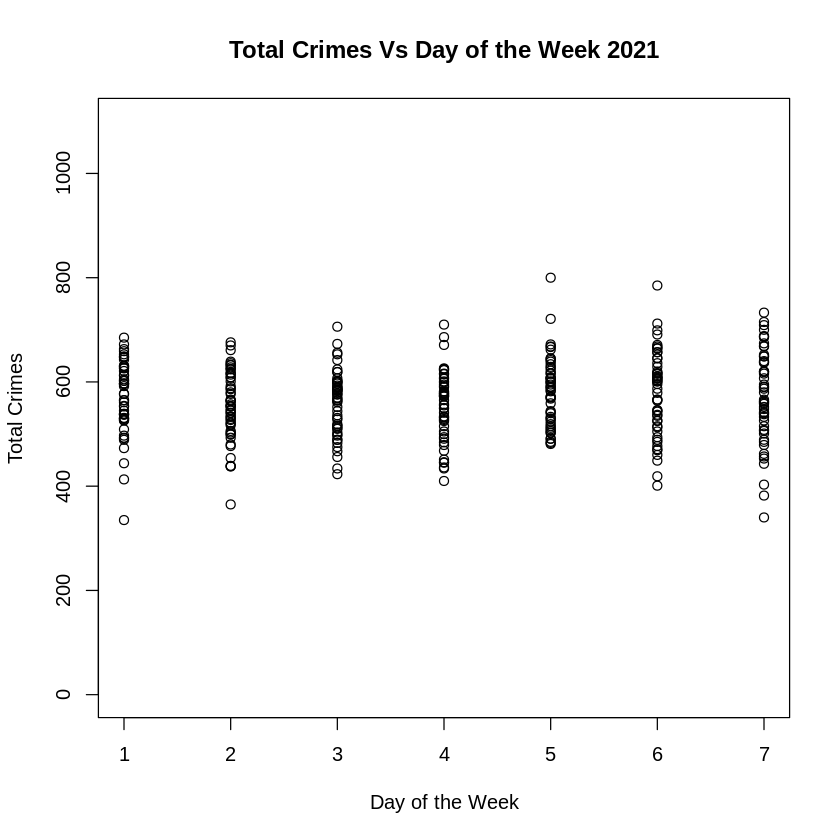

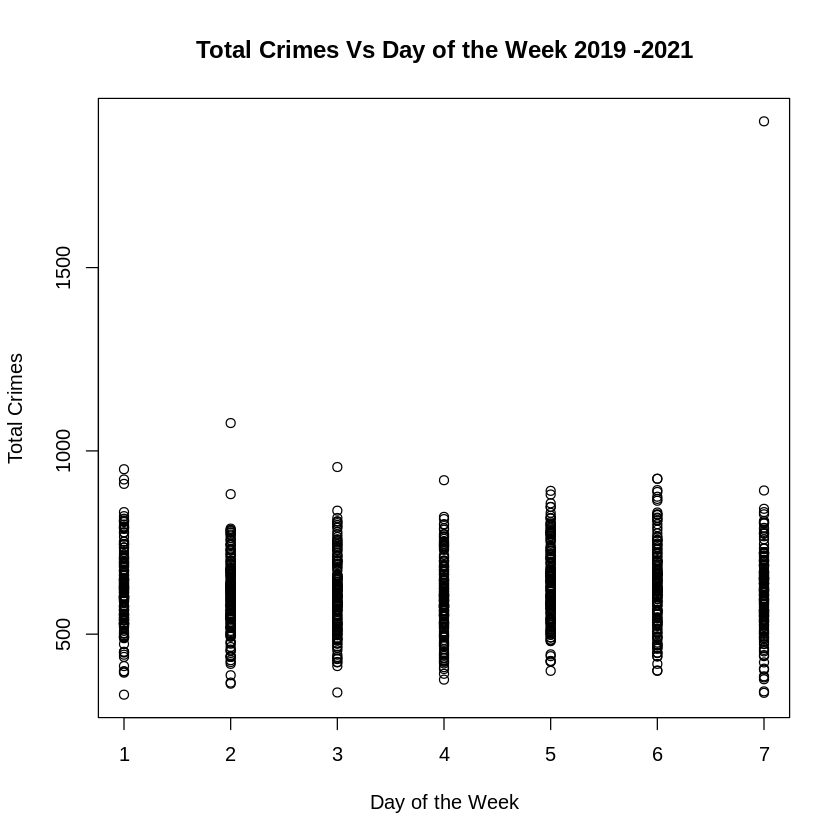

In [403]:
plot(crimes$dow_num[0:365], crimes$TOTAL_CRIMES[0:365], main="Total Crimes Vs Day of the Week 2019", ylim=c(0,1100), xlab='Day of the Week', ylab="Total Crimes");
plot(crimes$dow_num[366:731], crimes$TOTAL_CRIMES[366:731], main="Total Crimes Vs Day of the Week 2020", ylim=c(0,1100), xlab='Day of the Week', ylab="Total Crimes");
plot(crimes$dow_num[732:1096], crimes$TOTAL_CRIMES[732:1096], main="Total Crimes Vs Day of the Week 2021", ylim=c(0,1100), xlab='Day of the Week', ylab="Total Crimes");
plot(crimes$dow_num, crimes$TOTAL_CRIMES, main="Total Crimes Vs Day of the Week 2019 -2021", xlab='Day of the Week', ylab="Total Crimes");

The exploratory analysis completed above shows that there may be a slight trend when comparing the total number of crimes committed daily to the day of the week that the crimes were committed on.

As Thursday appears to have the lowest overall crime, I will set it as day 1 of the week.

In [404]:
crimes$dow_num <- crimes$dow_num+6;
crimes$dow_num[crimes$dow_num == 8] <- 1;
crimes$dow_num[crimes$dow_num == 9] <- 2;
crimes$dow_num[crimes$dow_num == 10] <- 3;
crimes$dow_num[crimes$dow_num == 11] <- 4;
crimes$dow_num[crimes$dow_num == 12] <- 5;
crimes$dow_num[crimes$dow_num == 13] <- 6;

In [405]:
# set dow test data
crimes19 <- crimes[which(crimes$year == 2019), ];
dayofyear <- 1*seq_len(nrow(crimes19));
dayindex <- 1*seq_len(nrow(crimes19));
crimes19dow <- cbind(dayindex, dayofyear, crimes19);

crimes20 <- crimes[which(crimes$year == 2020), ];
dayofyear <- 1*seq_len(nrow(crimes20));
dayindex <- 1*seq_len(nrow(crimes20)) + 365;
crimes20dow <- cbind(dayindex, dayofyear, crimes20);

crimes21 <- crimes[which(crimes$year == 2021), ];
dayofyear <- 1*seq_len(nrow(crimes21));
dayindex <- 1*seq_len(nrow(crimes21)) + 731;
crimes21dow <- cbind(dayindex, dayofyear, crimes21);

In [406]:
head(crimes19dow);

dayindex dayofyear date       year month day dow       dow_num TOTAL_CRIMES
1 1        1         2019-01-01 2019 1     1   Tuesday   1       1076        
2 2        2         2019-01-02 2019 1     2   Wednesday 2        655        
3 3        3         2019-01-03 2019 1     3   Thursday  3        752        
4 4        4         2019-01-04 2019 1     4   Friday    4        769        
5 5        5         2019-01-05 2019 1     5   Saturday  5        792        
6 6        6         2019-01-06 2019 1     6   Sunday    6        664        
  ABANDONED_BUILDING ⋯ slp    visib wdsp mxpsd gust max  min  prcp sndp  fog
1 1                  ⋯ 1009.2  5.4  18.3 29.9  41.0 54.0 39.9 0.84 999.9 1  
2 1                  ⋯ 1022.9 10.0  10.3 14.0  24.1 55.0 28.0 0.61 999.9 0  
3 1                  ⋯ 1015.6  9.5   9.2 19.0  24.1 46.9 28.0 0.00 999.9 0  
4 0                  ⋯ 1014.4  9.8   9.9 18.1  26.0 46.9 30.9 0.01 999.9 0  
5 0                  ⋯ 1005.8  5.0  11.8 21.0  31.1 46.9 30.9 0.25 999.9 0  
6 1                  ⋯ 1007.1  9.6  13.1 20.0  28.9 46.9 34.0 0.86 999.9 0

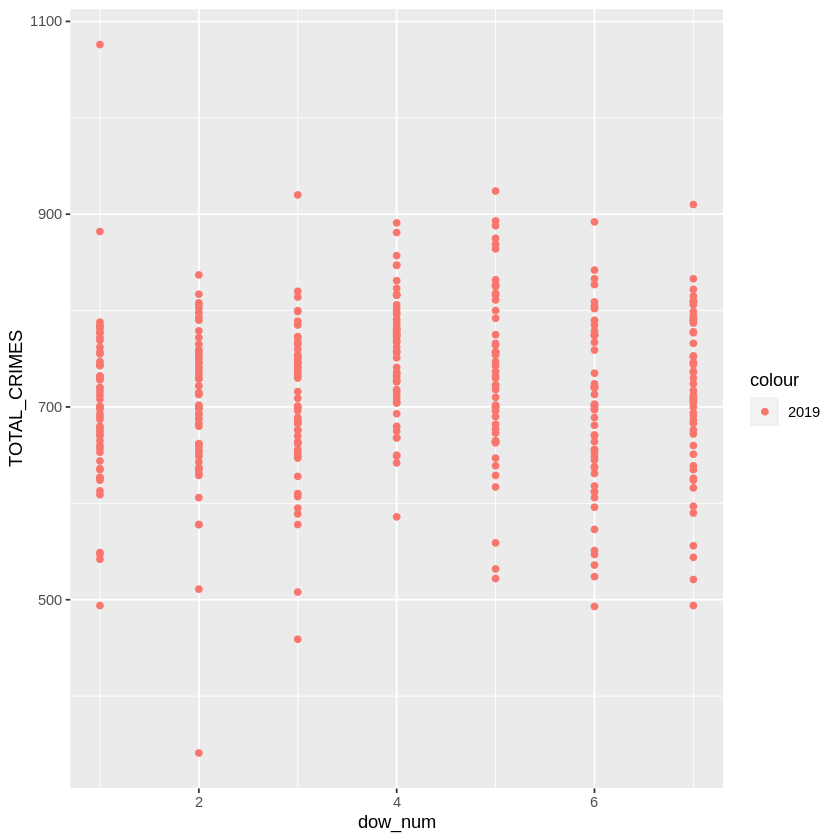

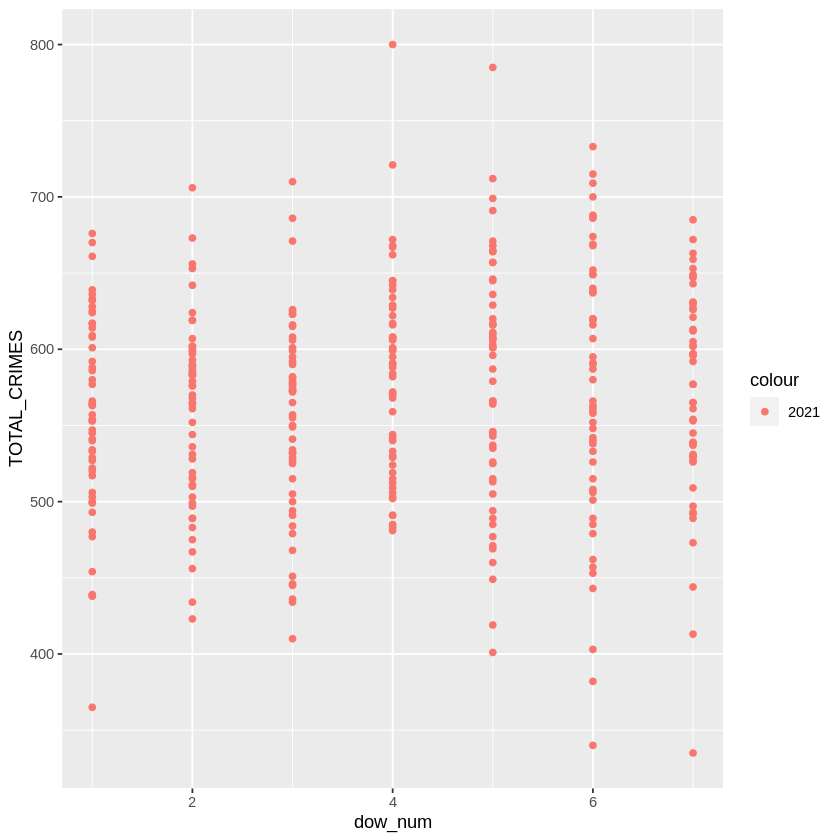

In [407]:
ggplot() +
  geom_point(data=crimes19dow, aes(dow_num, TOTAL_CRIMES, color="2019")) 
  # geom_point(data=crimes20dow, aes(dow_num, TOTAL_CRIMES, color="2020")) +
ggplot() +
  geom_point(data=crimes21dow, aes(dow_num, TOTAL_CRIMES, color="2021"))

In [408]:
cor(crimes19dow$dow_num, crimes19dow$TOTAL_CRIMES)

[1] 0.04974675

Summary of all 2020 Crimes in Chicago by month, day, crime types, locations and weather



```
**Notes on weather data:**
```


temp - Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9

dewp - Mean dew point for the day in degreesm Fahrenheit to tenths. Missing = 9999.9

slp - Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9

visib - Mean visibility for the day in miles to tenths. Missing = 999.9

wdsp - Mean wind speed for the day in knots to tenths. Missing = 999.9

mxpsd - Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9

gust - Maximum wind gust reported for the day in knots to tenths. Missing = 999.9

max - Maximum temperature reported during the day in Fahrenheit to tenths--time of max temp report varies by country and region, so this will sometimes not be the max for the calendar day. Missing = 9999.9

min - Minimum temperature reported during the day in Fahrenheit to tenths--time of min temp report varies by country and region, so this will sometimes not be the min for the calendar day. Missing = 9999.9

prcp - Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; will usually not end with the midnight observation--i.e., may include latter part of previous day. .00 indicates no measurable precipitation (includes a trace). Missing = 99.99 Note: Many stations do not report '0' on days with no precipitation--therefore, '99.99' will often appear on these days. Also, for example, a station may only report a 6-hour amount for the period during which rain fell. See Flag field for source of data

sndp - Snow depth in inches to tenths--last report for the day if reported more than once. Missing = 999.9 Note: Most stations do not report '0' ondays with no snow on the ground--therefore, '999.9' will often appear on these days

fog - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day

In [409]:
head(crimes)

date       year month day dow       dow_num TOTAL_CRIMES ABANDONED_BUILDING
1 2019-01-01 2019 1     1   Tuesday   1       1076         1                 
2 2019-01-02 2019 1     2   Wednesday 2        655         1                 
3 2019-01-03 2019 1     3   Thursday  3        752         1                 
4 2019-01-04 2019 1     4   Friday    4        769         0                 
5 2019-01-05 2019 1     5   Saturday  5        792         0                 
6 2019-01-06 2019 1     6   Sunday    6        664         1                 
  AIRPORT_OR_AIRCRAFT ALLEY ⋯ slp    visib wdsp mxpsd gust max  min  prcp sndp 
1 0                   23    ⋯ 1009.2  5.4  18.3 29.9  41.0 54.0 39.9 0.84 999.9
2 3                   10    ⋯ 1022.9 10.0  10.3 14.0  24.1 55.0 28.0 0.61 999.9
3 5                   17    ⋯ 1015.6  9.5   9.2 19.0  24.1 46.9 28.0 0.00 999.9
4 2                   21    ⋯ 1014.4  9.8   9.9 18.1  26.0 46.9 30.9 0.01 999.9
5 2                   20    ⋯ 1005.8  5.0  11.8 21.0  31.1 46.9 30.9 0.25 999.9
6 4                   15    ⋯ 1007.1  9.6  13.1 20.0  28.9 46.9 34.0 0.86 999.9
  fog
1 1  
2 0  
3 0  
4 0  
5 0  
6 0

In [410]:
summary(crimes)

         date           year          month             day       
 2019-01-01:   1   Min.   :2019   Min.   : 1.000   Min.   : 1.00  
 2019-01-02:   1   1st Qu.:2019   1st Qu.: 4.000   1st Qu.: 8.00  
 2019-01-03:   1   Median :2020   Median : 7.000   Median :16.00  
 2019-01-04:   1   Mean   :2020   Mean   : 6.522   Mean   :15.73  
 2019-01-05:   1   3rd Qu.:2021   3rd Qu.:10.000   3rd Qu.:23.00  
 2019-01-06:   1   Max.   :2021   Max.   :12.000   Max.   :31.00  
 (Other)   :1090                                                  
        dow         dow_num       TOTAL_CRIMES    ABANDONED_BUILDING
 Friday   :157   Min.   :1.000   Min.   : 335.0   Min.   : 0.0000   
 Monday   :156   1st Qu.:2.000   1st Qu.: 547.0   1st Qu.: 0.0000   
 Saturday :156   Median :4.000   Median : 616.0   Median : 0.0000   
 Sunday   :156   Mean   :3.995   Mean   : 620.5   Mean   : 0.4462   
 Thursday :157   3rd Qu.:6.000   3rd Qu.: 687.0   3rd Qu.: 1.0000   
 Tuesday  :157   Max.   :7.000   Max.   :1899.0   

In [411]:
crimes$date[0:365];
crimes$date[366:731];
crimes$date[732:1096];

[1] 2019-01-01 2019-01-02 2019-01-03 2019-01-04 2019-01-05 2019-01-06
  [7] 2019-01-07 2019-01-08 2019-01-09 2019-01-10 2019-01-11 2019-01-12
 [13] 2019-01-13 2019-01-14 2019-01-15 2019-01-16 2019-01-17 2019-01-18
 [19] 2019-01-19 2019-01-20 2019-01-21 2019-01-22 2019-01-23 2019-01-24
 [25] 2019-01-25 2019-01-26 2019-01-27 2019-01-28 2019-01-29 2019-01-30
 [31] 2019-01-31 2019-02-01 2019-02-02 2019-02-03 2019-02-04 2019-02-05
 [37] 2019-02-06 2019-02-07 2019-02-08 2019-02-09 2019-02-10 2019-02-11
 [43] 2019-02-12 2019-02-13 2019-02-14 2019-02-15 2019-02-16 2019-02-17
 [49] 2019-02-18 2019-02-19 2019-02-20 2019-02-21 2019-02-22 2019-02-23
 [55] 2019-02-24 2019-02-25 2019-02-26 2019-02-27 2019-02-28 2019-03-01
 [61] 2019-03-02 2019-03-03 2019-03-04 2019-03-05 2019-03-06 2019-03-07
 [67] 2019-03-08 2019-03-09 2019-03-10 2019-03-11 2019-03-12 2019-03-13
 [73] 2019-03-14 2019-03-15 2019-03-16 2019-03-17 2019-03-18 2019-03-19
 [79] 2019-03-20 2019-03-21 2019-03-22 2019-03-23 2019-03-24 2019-03-25
 [85] 2019-03-26 2019-03-27 2019-03-28 2019-03-29 2019-03-30 2019-03-31
 [91] 2019-04-01 2019-04-02 2019-04-03 2019-04-04 2019-04-05 2019-04-06
 [97] 2019-04-07 2019-04-08 2019-04-09 2019-04-10 2019-04-11 2019-04-12
[103] 2019-04-13 2019-04-14 2019-04-15 2019-04-16 2019-04-17 2019-04-18
[109] 2019-04-19 2019-04-20 2019-04-21 2019-04-22 2019-04-23 2019-04-24
[115] 2019-04-25 2019-04-26 2019-04-27 2019-04-28 2019-04-29 2019-04-30
[121] 2019-05-01 2019-05-02 2019-05-03 2019-05-04 2019-05-05 2019-05-06
[127] 2019-05-07 2019-05-08 2019-05-09 2019-05-10 2019-05-11 2019-05-12
[133] 2019-05-13 2019-05-14 2019-05-15 2019-05-16 2019-05-17 2019-05-18
[139] 2019-05-19 2019-05-20 2019-05-21 2019-05-22 2019-05-23 2019-05-24
[145] 2019-05-25 2019-05-26 2019-05-27 2019-05-28 2019-05-29 2019-05-30
[151] 2019-05-31 2019-06-01 2019-06-02 2019-06-03 2019-06-04 2019-06-05
[157] 2019-06-06 2019-06-07 2019-06-08 2019-06-09 2019-06-10 2019-06-11
[163] 2019-06-12 2019-06-13 2019-06-14 2019-06-15 2019-06-16 2019-06-17
[169] 2019-06-18 2019-06-19 2019-06-20 2019-06-21 2019-06-22 2019-06-23
[175] 2019-06-24 2019-06-25 2019-06-26 2019-06-27 2019-06-28 2019-06-29
[181] 2019-06-30 2019-07-01 2019-07-02 2019-07-03 2019-07-04 2019-07-05
[187] 2019-07-06 2019-07-07 2019-07-08 2019-07-09 2019-07-10 2019-07-11
[193] 2019-07-12 2019-07-13 2019-07-14 2019-07-15 2019-07-16 2019-07-17
[199] 2019-07-18 2019-07-19 2019-07-20 2019-07-21 2019-07-22 2019-07-23
[205] 2019-07-24 2019-07-25 2019-07-26 2019-07-27 2019-07-28 2019-07-29
[211] 2019-07-30 2019-07-31 2019-08-01 2019-08-02 2019-08-03 2019-08-04
[217] 2019-08-05 2019-08-06 2019-08-07 2019-08-08 2019-08-09 2019-08-10
[223] 2019-08-11 2019-08-12 2019-08-13 2019-08-14 2019-08-15 2019-08-16
[229] 2019-08-17 2019-08-18 2019-08-19 2019-08-20 2019-08-21 2019-08-22
[235] 2019-08-23 2019-08-24 2019-08-25 2019-08-26 2019-08-27 2019-08-28
[241] 2019-08-29 2019-08-30 2019-08-31 2019-09-01 2019-09-02 2019-09-03
[247] 2019-09-04 2019-09-05 2019-09-06 2019-09-07 2019-09-08 2019-09-09
[253] 2019-09-10 2019-09-11 2019-09-12 2019-09-13 2019-09-14 2019-09-15
[259] 2019-09-16 2019-09-17 2019-09-18 2019-09-19 2019-09-20 2019-09-21
[265] 2019-09-22 2019-09-23 2019-09-24 2019-09-25 2019-09-26 2019-09-27
[271] 2019-09-28 2019-09-29 2019-09-30 2019-10-01 2019-10-02 2019-10-03
[277] 2019-10-04 2019-10-05 2019-10-06 2019-10-07 2019-10-08 2019-10-09
[283] 2019-10-10 2019-10-11 2019-10-12 2019-10-13 2019-10-14 2019-10-15
[289] 2019-10-16 2019-10-17 2019-10-18 2019-10-19 2019-10-20 2019-10-21
[295] 2019-10-22 2019-10-23 2019-10-24 2019-10-25 2019-10-26 2019-10-27
[301] 2019-10-28 2019-10-29 2019-10-30 2019-10-31 2019-11-01 2019-11-02
[307] 2019-11-03 2019-11-04 2019-11-05 2019-11-06 2019-11-07 2019-11-08
[313] 2019-11-09 2019-11-10 2019-11-11 2019-11-12 2019-11-13 2019-11-14
[319] 2019-11-15 2019-11-16 2019-11-17 2019-11-18 2019-11-19 2019-11-20
[325] 2019-11-21 2019-11-22 2019-11-23 2019-11-24 2019-11-25 2019-11-26
[331] 2019-11-27 2019-11-28 2019-11-29 201

[1] 2020-01-01 2020-01-02 2020-01-03 2020-01-04 2020-01-05 2020-01-06
  [7] 2020-01-07 2020-01-08 2020-01-09 2020-01-10 2020-01-11 2020-01-12
 [13] 2020-01-13 2020-01-14 2020-01-15 2020-01-16 2020-01-17 2020-01-18
 [19] 2020-01-19 2020-01-20 2020-01-21 2020-01-22 2020-01-23 2020-01-24
 [25] 2020-01-25 2020-01-26 2020-01-27 2020-01-28 2020-01-29 2020-01-30
 [31] 2020-01-31 2020-02-01 2020-02-02 2020-02-03 2020-02-04 2020-02-05
 [37] 2020-02-06 2020-02-07 2020-02-08 2020-02-09 2020-02-10 2020-02-11
 [43] 2020-02-12 2020-02-13 2020-02-14 2020-02-15 2020-02-16 2020-02-17
 [49] 2020-02-18 2020-02-19 2020-02-20 2020-02-21 2020-02-22 2020-02-23
 [55] 2020-02-24 2020-02-25 2020-02-26 2020-02-27 2020-02-28 2020-02-29
 [61] 2020-03-01 2020-03-02 2020-03-03 2020-03-04 2020-03-05 2020-03-06
 [67] 2020-03-07 2020-03-08 2020-03-09 2020-03-10 2020-03-11 2020-03-12
 [73] 2020-03-13 2020-03-14 2020-03-15 2020-03-16 2020-03-17 2020-03-18
 [79] 2020-03-19 2020-03-20 2020-03-21 2020-03-22 2020-03-23 2020-03-24
 [85] 2020-03-25 2020-03-26 2020-03-27 2020-03-28 2020-03-29 2020-03-30
 [91] 2020-03-31 2020-04-01 2020-04-02 2020-04-03 2020-04-04 2020-04-05
 [97] 2020-04-06 2020-04-07 2020-04-08 2020-04-09 2020-04-10 2020-04-11
[103] 2020-04-12 2020-04-13 2020-04-14 2020-04-15 2020-04-16 2020-04-17
[109] 2020-04-18 2020-04-19 2020-04-20 2020-04-21 2020-04-22 2020-04-23
[115] 2020-04-24 2020-04-25 2020-04-26 2020-04-27 2020-04-28 2020-04-29
[121] 2020-04-30 2020-05-01 2020-05-02 2020-05-03 2020-05-04 2020-05-05
[127] 2020-05-06 2020-05-07 2020-05-08 2020-05-09 2020-05-10 2020-05-11
[133] 2020-05-12 2020-05-13 2020-05-14 2020-05-15 2020-05-16 2020-05-17
[139] 2020-05-18 2020-05-19 2020-05-20 2020-05-21 2020-05-22 2020-05-23
[145] 2020-05-24 2020-05-25 2020-05-26 2020-05-27 2020-05-28 2020-05-29
[151] 2020-05-30 2020-05-31 2020-06-01 2020-06-02 2020-06-03 2020-06-04
[157] 2020-06-05 2020-06-06 2020-06-07 2020-06-08 2020-06-09 2020-06-10
[163] 2020-06-11 2020-06-12 2020-06-13 2020-06-14 2020-06-15 2020-06-16
[169] 2020-06-17 2020-06-18 2020-06-19 2020-06-20 2020-06-21 2020-06-22
[175] 2020-06-23 2020-06-24 2020-06-25 2020-06-26 2020-06-27 2020-06-28
[181] 2020-06-29 2020-06-30 2020-07-01 2020-07-02 2020-07-03 2020-07-04
[187] 2020-07-05 2020-07-06 2020-07-07 2020-07-08 2020-07-09 2020-07-10
[193] 2020-07-11 2020-07-12 2020-07-13 2020-07-14 2020-07-15 2020-07-16
[199] 2020-07-17 2020-07-18 2020-07-19 2020-07-20 2020-07-21 2020-07-22
[205] 2020-07-23 2020-07-24 2020-07-25 2020-07-26 2020-07-27 2020-07-28
[211] 2020-07-29 2020-07-30 2020-07-31 2020-08-01 2020-08-02 2020-08-03
[217] 2020-08-04 2020-08-05 2020-08-06 2020-08-07 2020-08-08 2020-08-09
[223] 2020-08-10 2020-08-11 2020-08-12 2020-08-13 2020-08-14 2020-08-15
[229] 2020-08-16 2020-08-17 2020-08-18 2020-08-19 2020-08-20 2020-08-21
[235] 2020-08-22 2020-08-23 2020-08-24 2020-08-25 2020-08-26 2020-08-27
[241] 2020-08-28 2020-08-29 2020-08-30 2020-08-31 2020-09-01 2020-09-02
[247] 2020-09-03 2020-09-04 2020-09-05 2020-09-06 2020-09-07 2020-09-08
[253] 2020-09-09 2020-09-10 2020-09-11 2020-09-12 2020-09-13 2020-09-14
[259] 2020-09-15 2020-09-16 2020-09-17 2020-09-18 2020-09-19 2020-09-20
[265] 2020-09-21 2020-09-22 2020-09-23 2020-09-24 2020-09-25 2020-09-26
[271] 2020-09-27 2020-09-28 2020-09-29 2020-09-30 2020-10-01 2020-10-02
[277] 2020-10-03 2020-10-04 2020-10-05 2020-10-06 2020-10-07 2020-10-08
[283] 2020-10-09 2020-10-10 2020-10-11 2020-10-12 2020-10-13 2020-10-14
[289] 2020-10-15 2020-10-16 2020-10-17 2020-10-18 2020-10-19 2020-10-20
[295] 2020-10-21 2020-10-22 2020-10-23 2020-10-24 2020-10-25 2020-10-26
[301] 2020-10-27 2020-10-28 2020-10-29 2020-10-30 2020-10-31 2020-11-01
[307] 2020-11-02 2020-11-03 2020-11-04 2020-11-05 2020-11-06 2020-11-07
[313] 2020-11-08 2020-11-09 2020-11-10 2020-11-11 2020-11-12 2020-11-13
[319] 2020-11-14 2020-11-15 2020-11-16 2020-11-17 2020-11-18 2020-11-19
[325] 2020-11-20 2020-11-21 2020-11-22 2020-11-23 2020-11-24 2020-11-25
[331] 2020-11-26 2020-11-27 2020-11-28 202

[1] 2021-01-01 2021-01-02 2021-01-03 2021-01-04 2021-01-05 2021-01-06
  [7] 2021-01-07 2021-01-08 2021-01-09 2021-01-10 2021-01-11 2021-01-12
 [13] 2021-01-13 2021-01-14 2021-01-15 2021-01-16 2021-01-17 2021-01-18
 [19] 2021-01-19 2021-01-20 2021-01-21 2021-01-22 2021-01-23 2021-01-24
 [25] 2021-01-25 2021-01-26 2021-01-27 2021-01-28 2021-01-29 2021-01-30
 [31] 2021-01-31 2021-02-01 2021-02-02 2021-02-03 2021-02-04 2021-02-05
 [37] 2021-02-06 2021-02-07 2021-02-08 2021-02-09 2021-02-10 2021-02-11
 [43] 2021-02-12 2021-02-13 2021-02-14 2021-02-15 2021-02-16 2021-02-17
 [49] 2021-02-18 2021-02-19 2021-02-20 2021-02-21 2021-02-22 2021-02-23
 [55] 2021-02-24 2021-02-25 2021-02-26 2021-02-27 2021-02-28 2021-03-01
 [61] 2021-03-02 2021-03-03 2021-03-04 2021-03-05 2021-03-06 2021-03-07
 [67] 2021-03-08 2021-03-09 2021-03-10 2021-03-11 2021-03-12 2021-03-13
 [73] 2021-03-14 2021-03-15 2021-03-16 2021-03-17 2021-03-18 2021-03-19
 [79] 2021-03-20 2021-03-21 2021-03-22 2021-03-23 2021-03-24 2021-03-25
 [85] 2021-03-26 2021-03-27 2021-03-28 2021-03-29 2021-03-30 2021-03-31
 [91] 2021-04-01 2021-04-02 2021-04-03 2021-04-04 2021-04-05 2021-04-06
 [97] 2021-04-07 2021-04-08 2021-04-09 2021-04-10 2021-04-11 2021-04-12
[103] 2021-04-13 2021-04-14 2021-04-15 2021-04-16 2021-04-17 2021-04-18
[109] 2021-04-19 2021-04-20 2021-04-21 2021-04-22 2021-04-23 2021-04-24
[115] 2021-04-25 2021-04-26 2021-04-27 2021-04-28 2021-04-29 2021-04-30
[121] 2021-05-01 2021-05-02 2021-05-03 2021-05-04 2021-05-05 2021-05-06
[127] 2021-05-07 2021-05-08 2021-05-09 2021-05-10 2021-05-11 2021-05-12
[133] 2021-05-13 2021-05-14 2021-05-15 2021-05-16 2021-05-17 2021-05-18
[139] 2021-05-19 2021-05-20 2021-05-21 2021-05-22 2021-05-23 2021-05-24
[145] 2021-05-25 2021-05-26 2021-05-27 2021-05-28 2021-05-29 2021-05-30
[151] 2021-05-31 2021-06-01 2021-06-02 2021-06-03 2021-06-04 2021-06-05
[157] 2021-06-06 2021-06-07 2021-06-08 2021-06-09 2021-06-10 2021-06-11
[163] 2021-06-12 2021-06-13 2021-06-14 2021-06-15 2021-06-16 2021-06-17
[169] 2021-06-18 2021-06-19 2021-06-20 2021-06-21 2021-06-22 2021-06-23
[175] 2021-06-24 2021-06-25 2021-06-26 2021-06-27 2021-06-28 2021-06-29
[181] 2021-06-30 2021-07-01 2021-07-02 2021-07-03 2021-07-04 2021-07-05
[187] 2021-07-06 2021-07-07 2021-07-08 2021-07-09 2021-07-10 2021-07-11
[193] 2021-07-12 2021-07-13 2021-07-14 2021-07-15 2021-07-16 2021-07-17
[199] 2021-07-18 2021-07-19 2021-07-20 2021-07-21 2021-07-22 2021-07-23
[205] 2021-07-24 2021-07-25 2021-07-26 2021-07-27 2021-07-28 2021-07-29
[211] 2021-07-30 2021-07-31 2021-08-01 2021-08-02 2021-08-03 2021-08-04
[217] 2021-08-05 2021-08-06 2021-08-07 2021-08-08 2021-08-09 2021-08-10
[223] 2021-08-11 2021-08-12 2021-08-13 2021-08-14 2021-08-15 2021-08-16
[229] 2021-08-17 2021-08-18 2021-08-19 2021-08-20 2021-08-21 2021-08-22
[235] 2021-08-23 2021-08-24 2021-08-25 2021-08-26 2021-08-27 2021-08-28
[241] 2021-08-29 2021-08-30 2021-08-31 2021-09-01 2021-09-02 2021-09-03
[247] 2021-09-04 2021-09-05 2021-09-06 2021-09-07 2021-09-08 2021-09-09
[253] 2021-09-10 2021-09-11 2021-09-12 2021-09-13 2021-09-14 2021-09-15
[259] 2021-09-16 2021-09-17 2021-09-18 2021-09-19 2021-09-20 2021-09-21
[265] 2021-09-22 2021-09-23 2021-09-24 2021-09-25 2021-09-26 2021-09-27
[271] 2021-09-28 2021-09-29 2021-09-30 2021-10-01 2021-10-02 2021-10-03
[277] 2021-10-04 2021-10-05 2021-10-06 2021-10-07 2021-10-08 2021-10-09
[283] 2021-10-10 2021-10-11 2021-10-12 2021-10-13 2021-10-14 2021-10-15
[289] 2021-10-16 2021-10-17 2021-10-18 2021-10-19 2021-10-20 2021-10-21
[295] 2021-10-22 2021-10-23 2021-10-24 2021-10-25 2021-10-26 2021-10-27
[301] 2021-10-28 2021-10-29 2021-10-30 2021-10-31 2021-11-01 2021-11-02
[307] 2021-11-03 2021-11-04 2021-11-05 2021-11-06 2021-11-07 2021-11-08
[313] 2021-11-09 2021-11-10 2021-11-11 2021-11-12 2021-11-13 2021-11-14
[319] 2021-11-15 2021-11-16 2021-11-17 2021-11-18 2021-11-19 2021-11-20
[325] 2021-11-21 2021-11-22 2021-11-23 2021-11-24 2021-11-25 2021-11-26
[331] 2021-11-27 2021-11-28 2021-11-29 202


<br>
<br>
<br>
<br>


**TRENDS - TOTAL CRIMES EACH YEAR** - by month

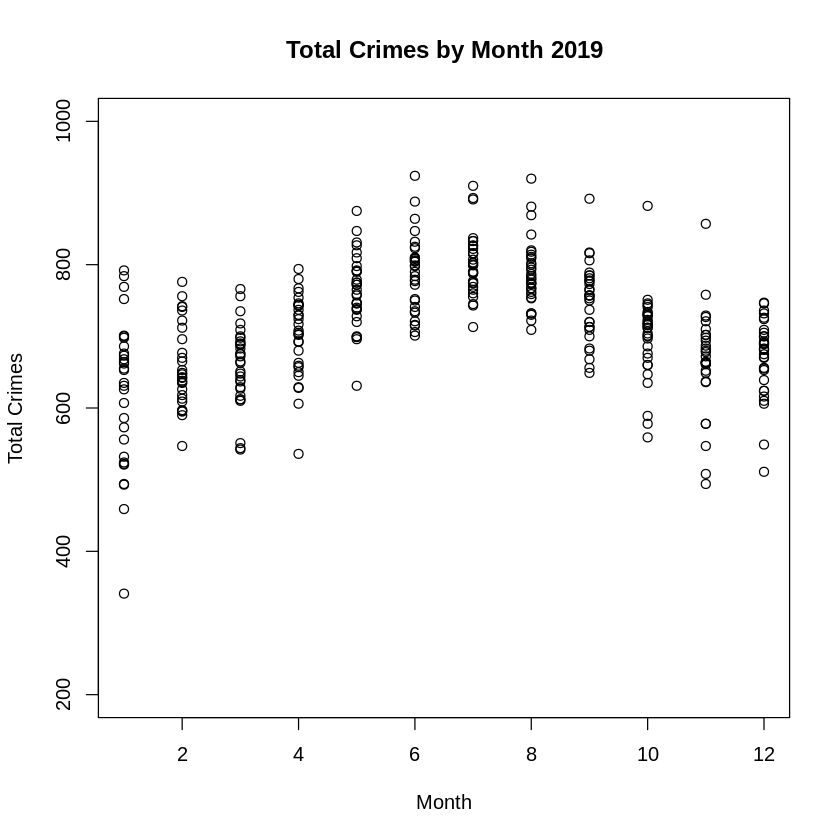

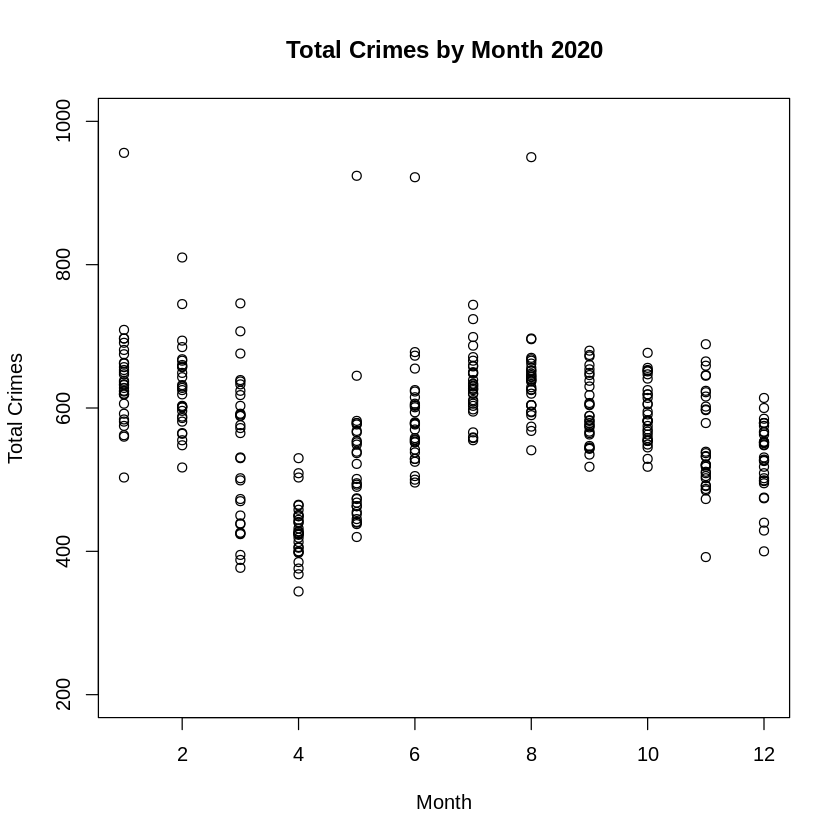

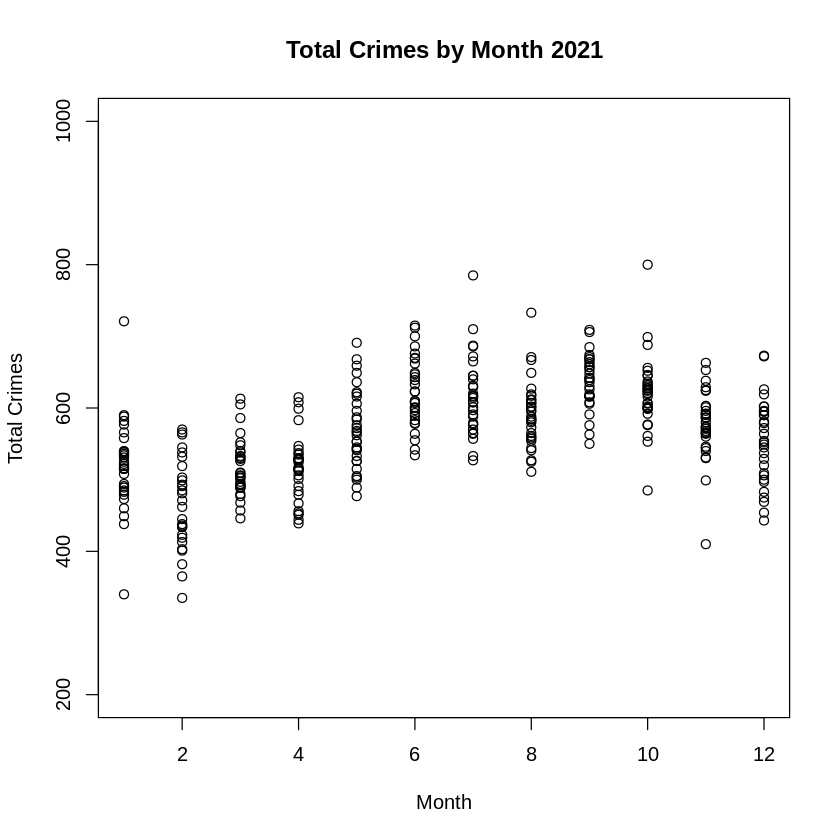

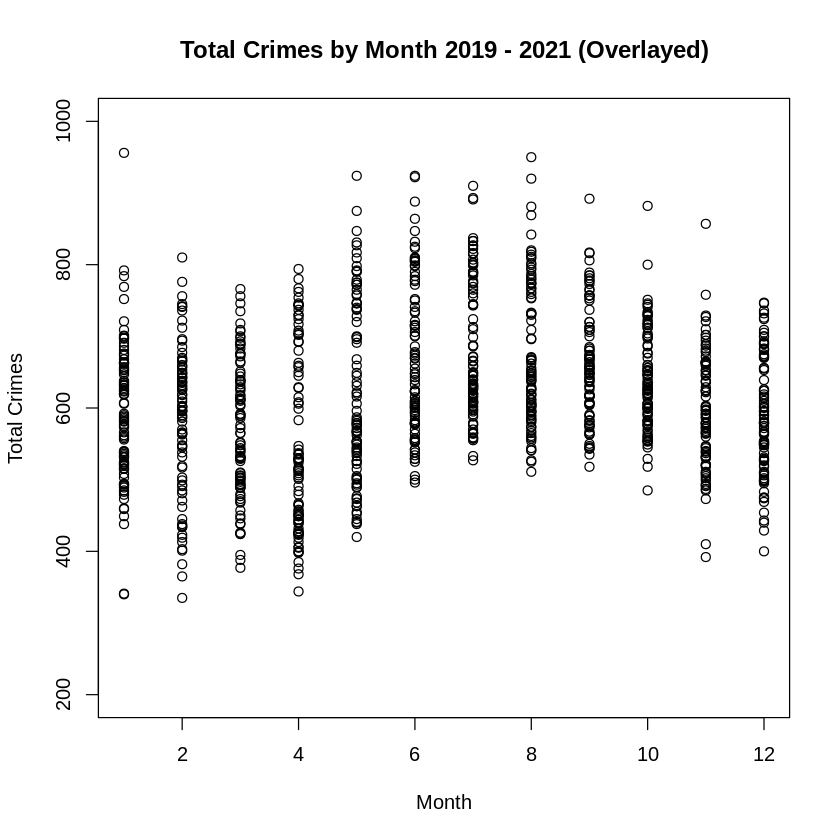

In [412]:
plot(crimes$month[0:365], crimes$TOTAL_CRIMES[0:365], main="Total Crimes by Month 2019", ylim=c(200,1000), xlab='Month', ylab="Total Crimes");
plot(crimes$month[366:731], crimes$TOTAL_CRIMES[366:731], main="Total Crimes by Month 2020", ylim=c(200,1000), xlab='Month', ylab="Total Crimes");
plot(crimes$month[732:1096], crimes$TOTAL_CRIMES[732:1096], main="Total Crimes by Month 2021", ylim=c(200,1000), xlab='Month', ylab="Total Crimes");
plot(crimes$month, crimes$TOTAL_CRIMES, main="Total Crimes by Month 2019 - 2021 (Overlayed)", ylim=c(200,1000), xlab='Month', ylab="Total Crimes");


<br>
<br>
<br>
<br>


**TRENDS - Total Crimes By Day**

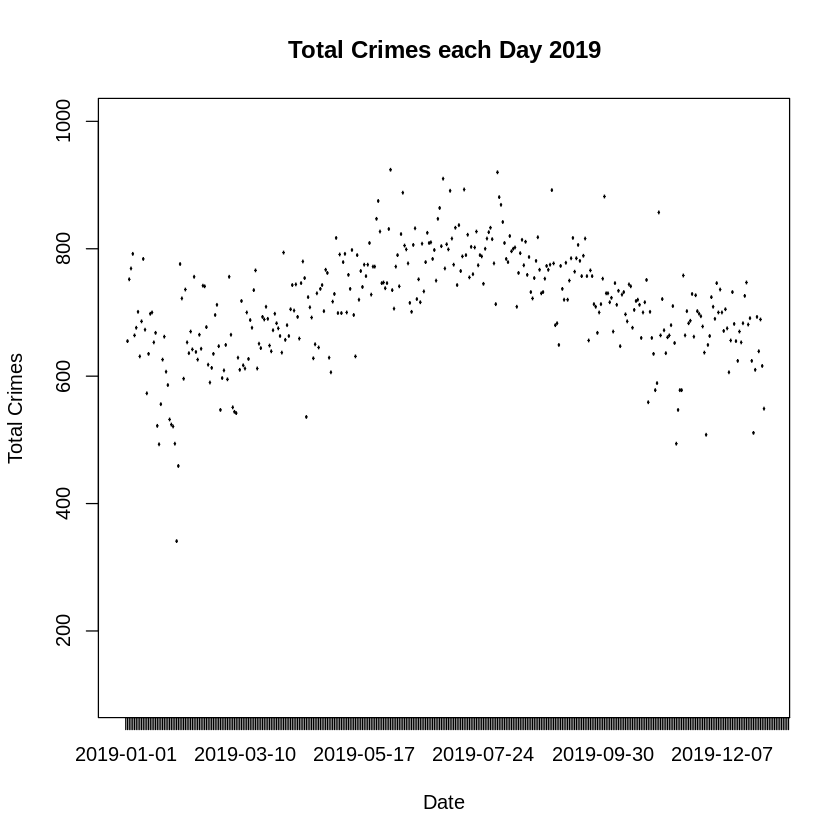

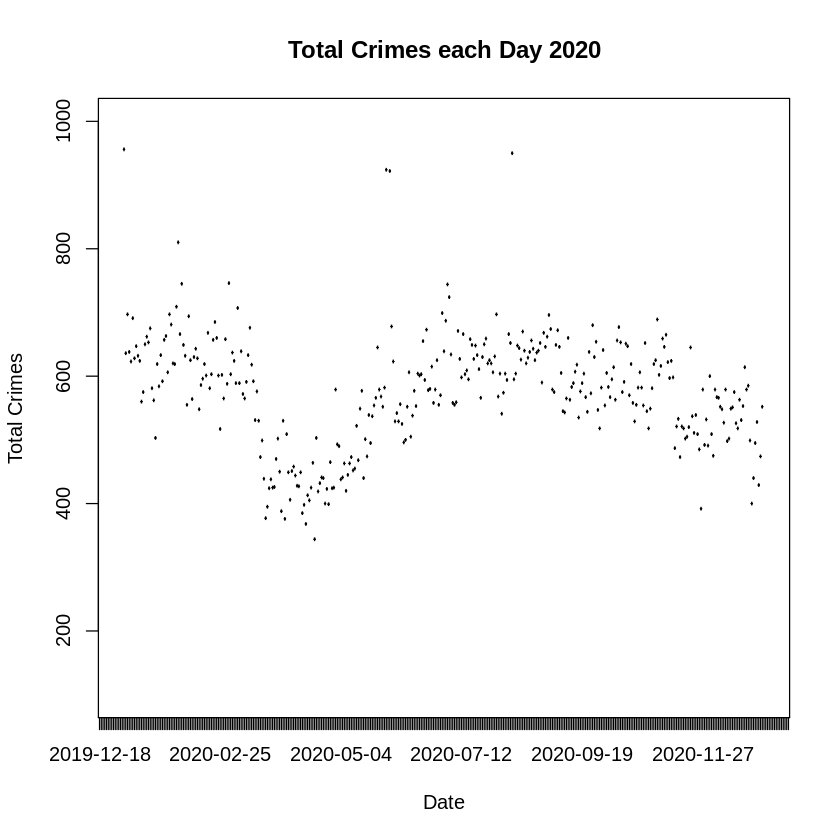

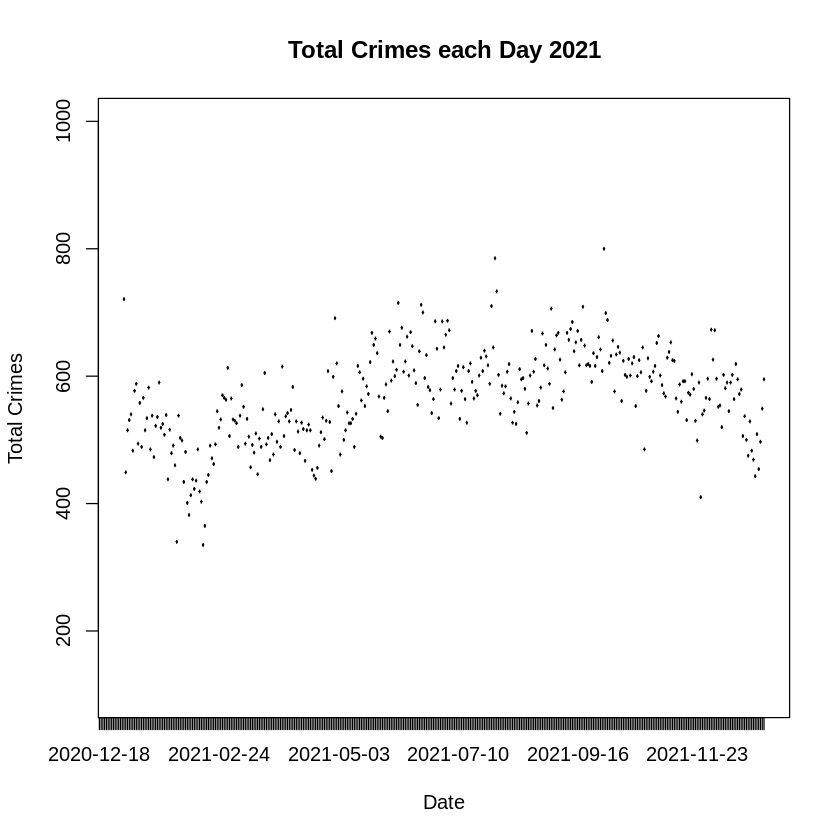

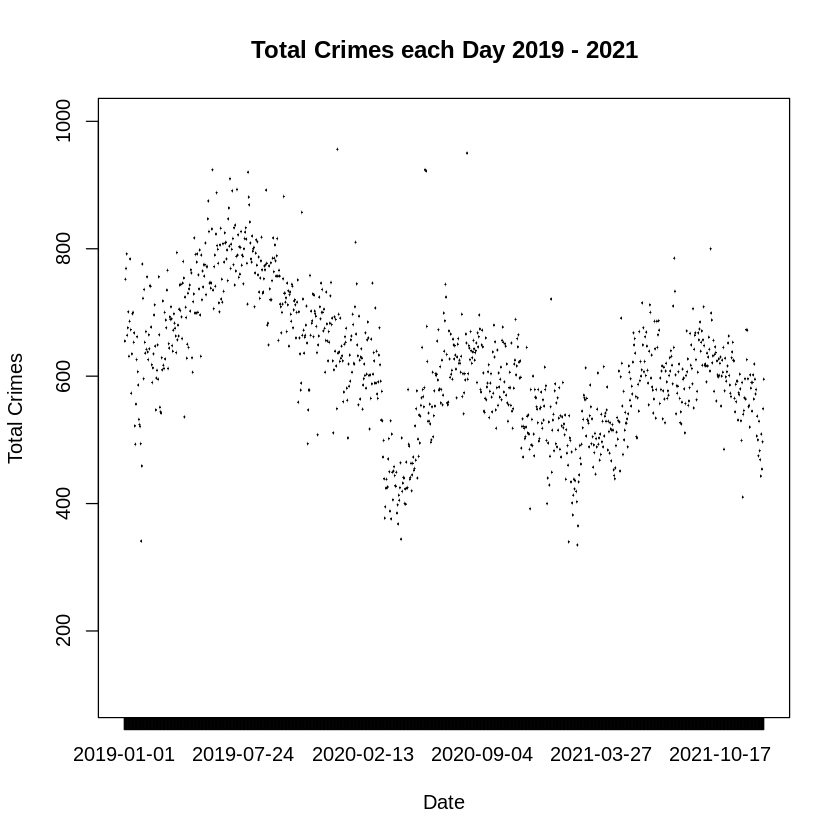

In [413]:
plot(crimes$date[0:365], crimes$TOTAL_CRIMES[0:365], main="Total Crimes each Day 2019", ylim=c(100,1000), xlim=c(0, 365), xlab='Date', ylab="Total Crimes");
plot(crimes$date[366:731], crimes$TOTAL_CRIMES[366:731], main="Total Crimes each Day 2020", ylim=c(100,1000), xlim=c(366, 732), xlab='Date', ylab="Total Crimes");
plot(crimes$date[732:1096], crimes$TOTAL_CRIMES[732:1096], main="Total Crimes each Day 2021", ylim=c(100,1000), xlim=c(732, 1096), xlab='Date', ylab="Total Crimes");
plot(crimes$date, crimes$TOTAL_CRIMES, main="Total Crimes each Day 2019 - 2021", ylim=c(100,1000), xlab='Date', ylab="Total Crimes");

In [414]:
cor(crimes$dow_num[732:1096], crimes$TOTAL_CRIMES[732:1096])

[1] 0.09350811


<br>
<br>
<br>
<br>


**TRENDS - SPECIFIC CRIMES EACH YEAR**

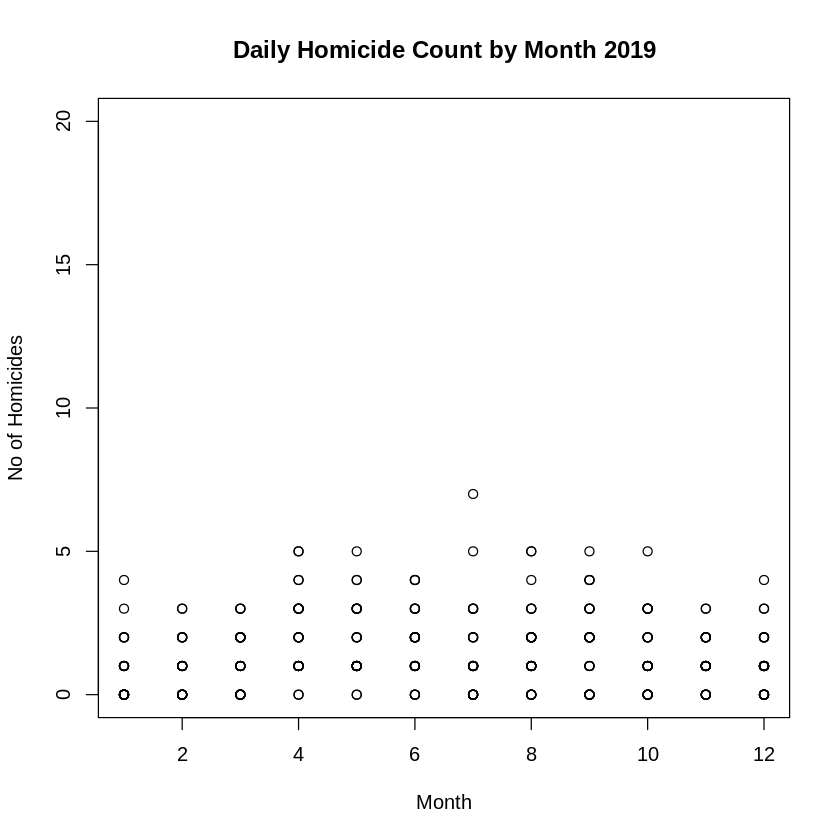

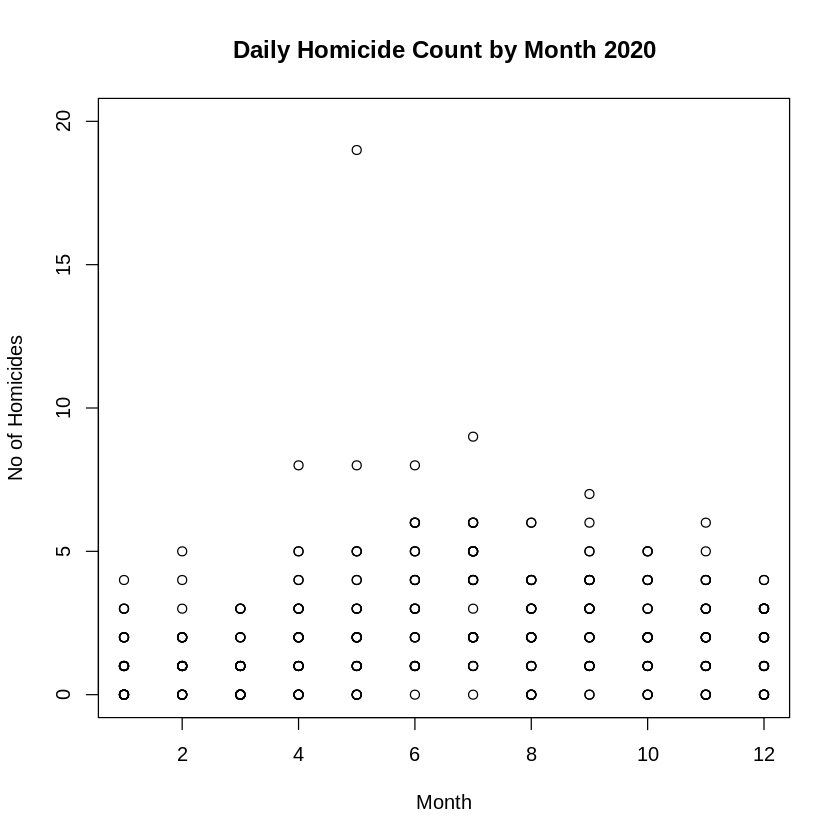

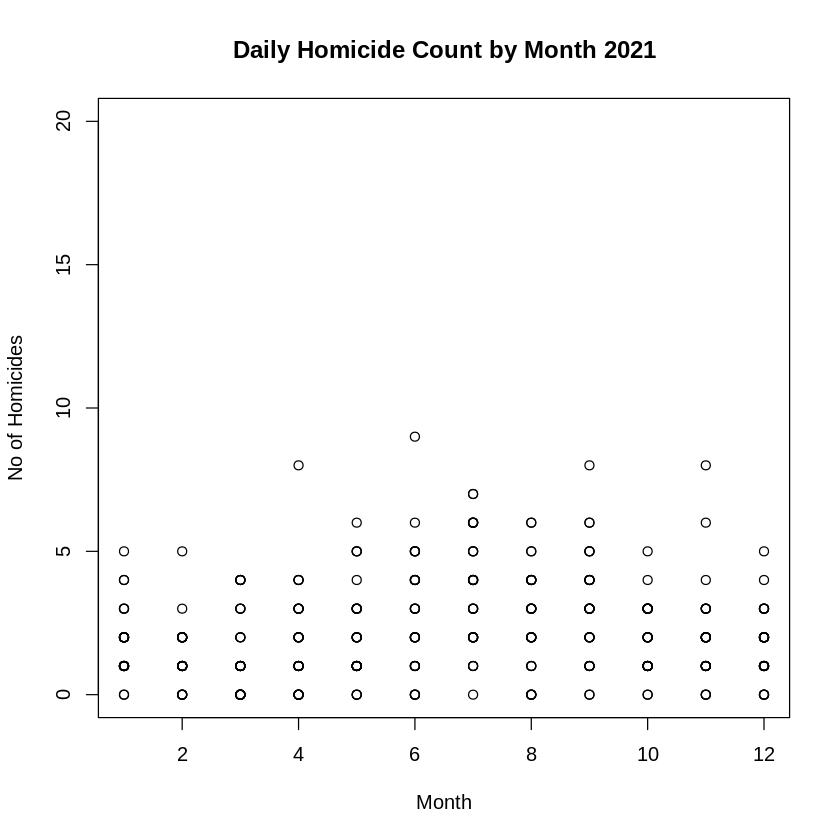

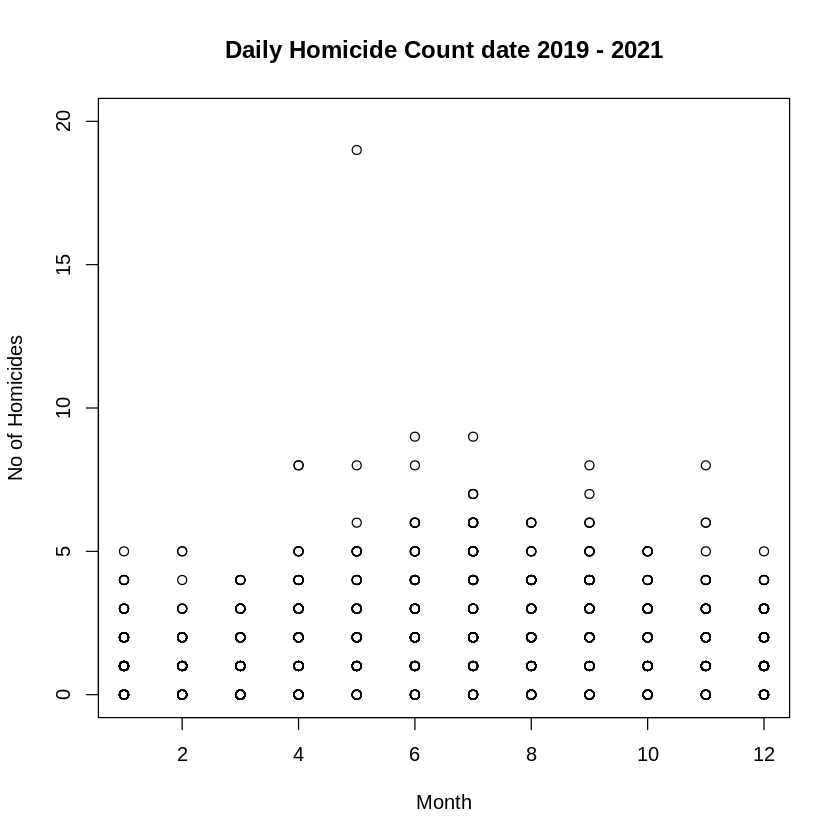

In [415]:
plot(crimes$month[0:365], crimes$HOMICIDE[0:365], ylim=c(0,20), main="Daily Homicide Count by Month 2019", xlab='Month', ylab="No of Homicides");
plot(crimes$month[366:731], crimes$HOMICIDE[366:731], ylim=c(0,20), main="Daily Homicide Count by Month 2020", xlab='Month', ylab="No of Homicides");
plot(crimes$month[732:1096], crimes$HOMICIDE[732:1096], ylim=c(0,20), main="Daily Homicide Count by Month 2021", xlab='Month', ylab="No of Homicides");
plot(crimes$month, crimes$HOMICIDE, ylim=c(0,20), main="Daily Homicide Count date 2019 - 2021", xlab='Month', ylab="No of Homicides");

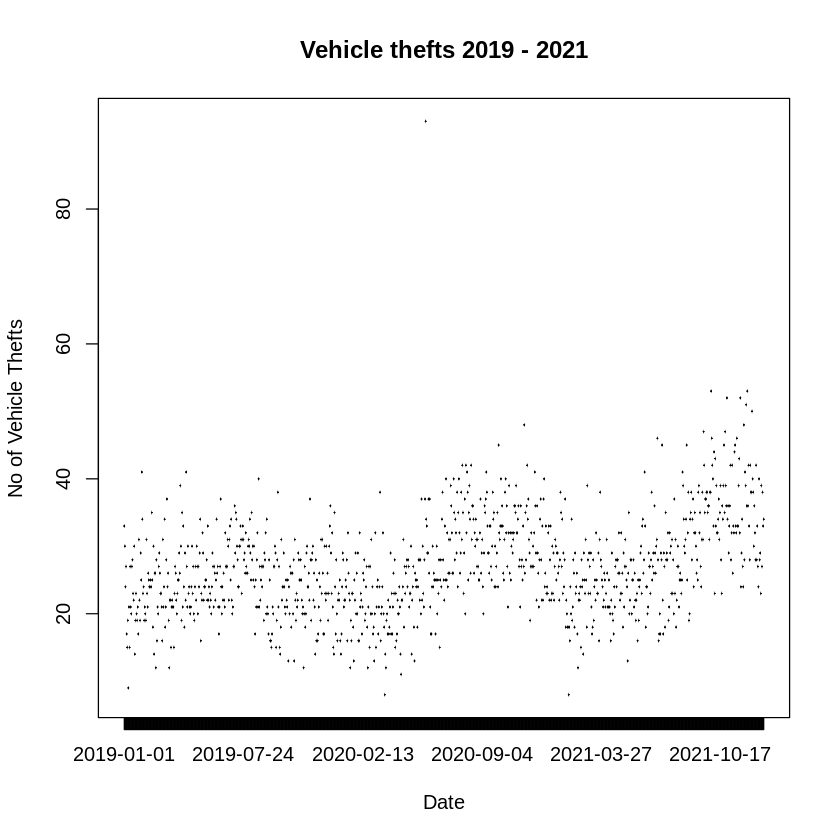

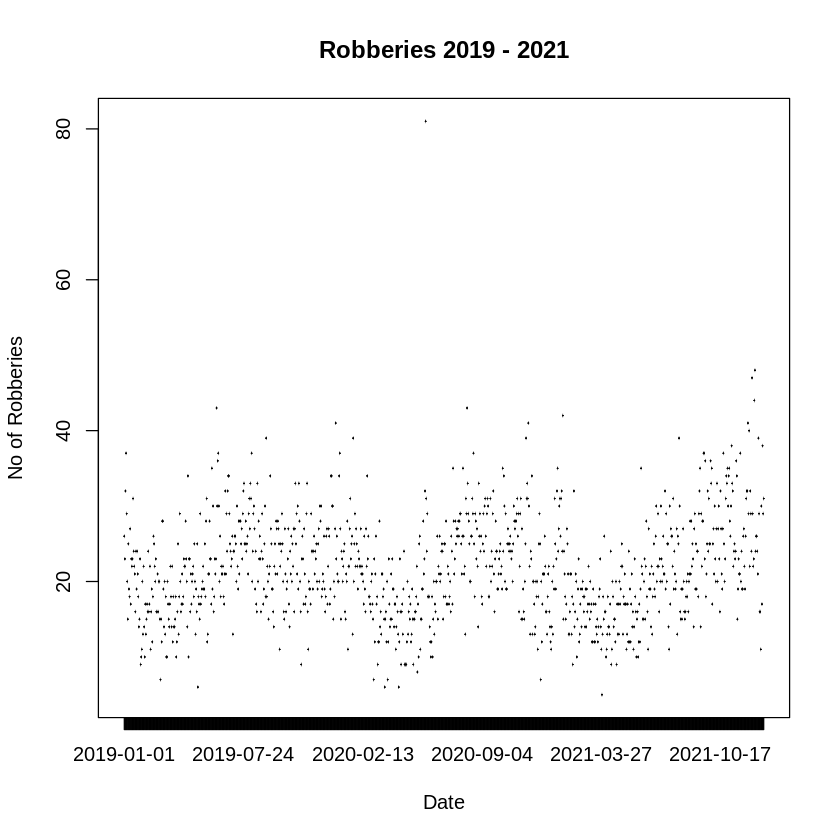

In [416]:
plot(crimes$date, crimes$MOTOR_VEHICLE_THEFT, main="Vehicle thefts 2019 - 2021", xlab='Date', ylab="No of Vehicle Thefts");
plot(crimes$date, crimes$ROBBERY, main="Robberies 2019 - 2021", xlab='Date', ylab="No of Robberies");


<br>
<br>
<br>
<br>


**TRENDS - Crimes vs Day of the Week**

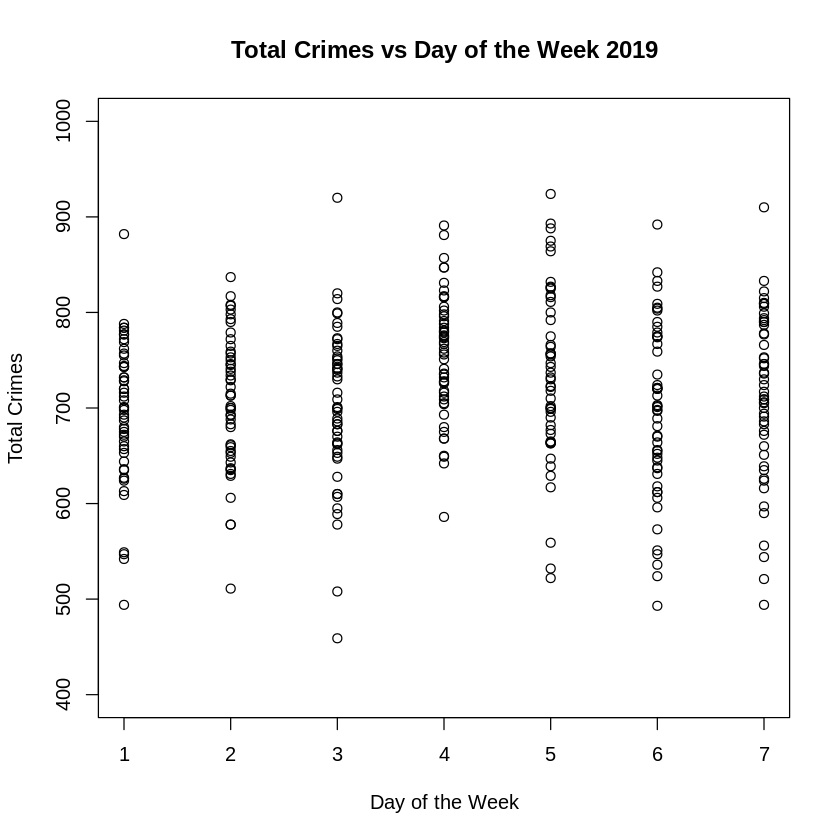

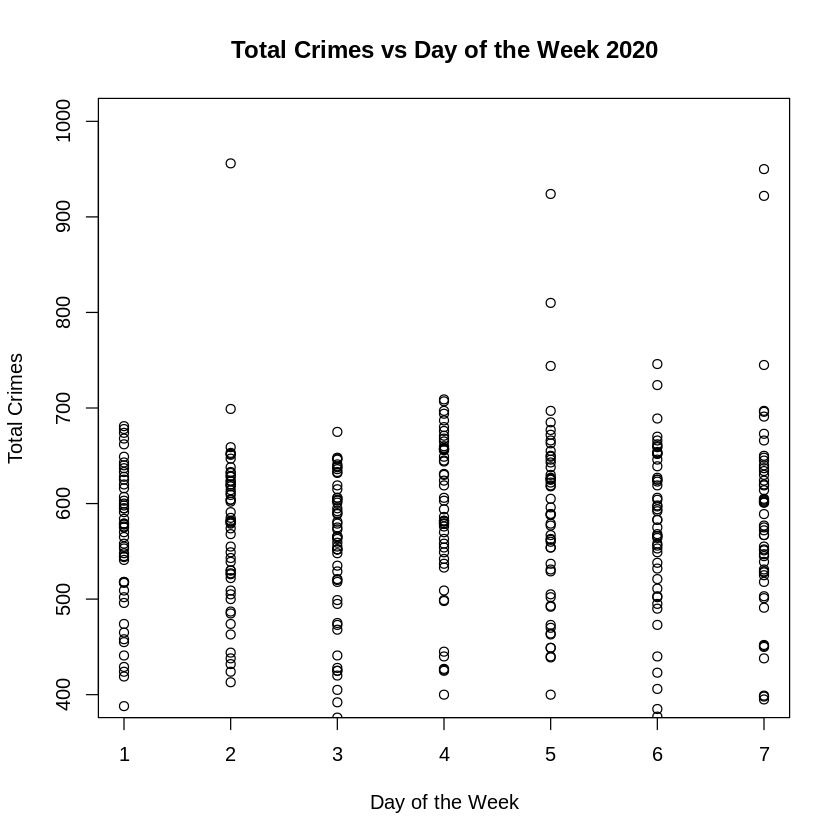

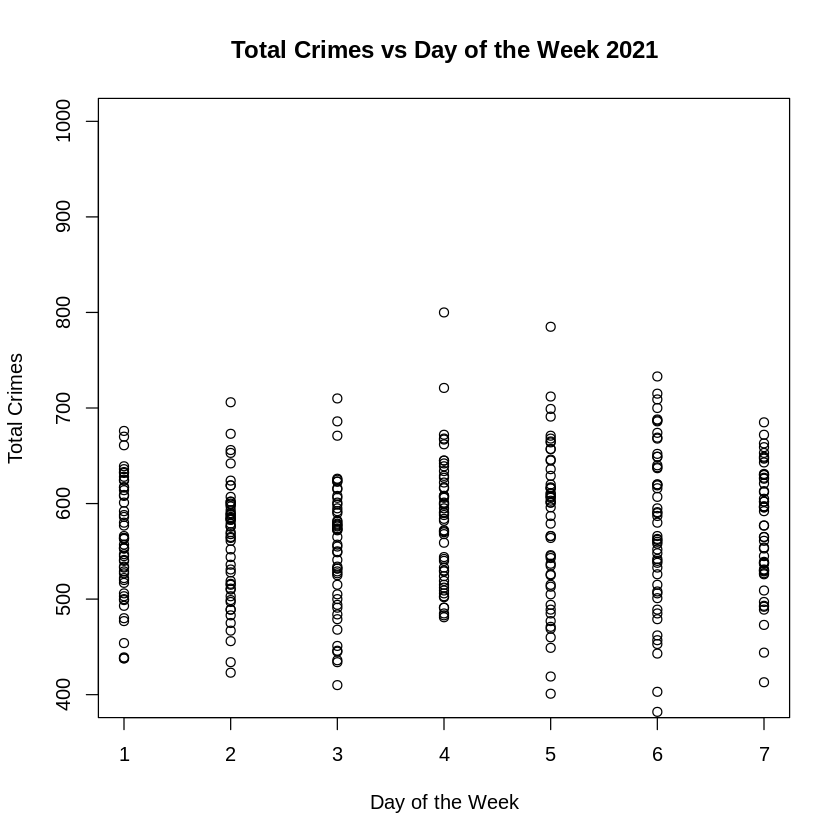

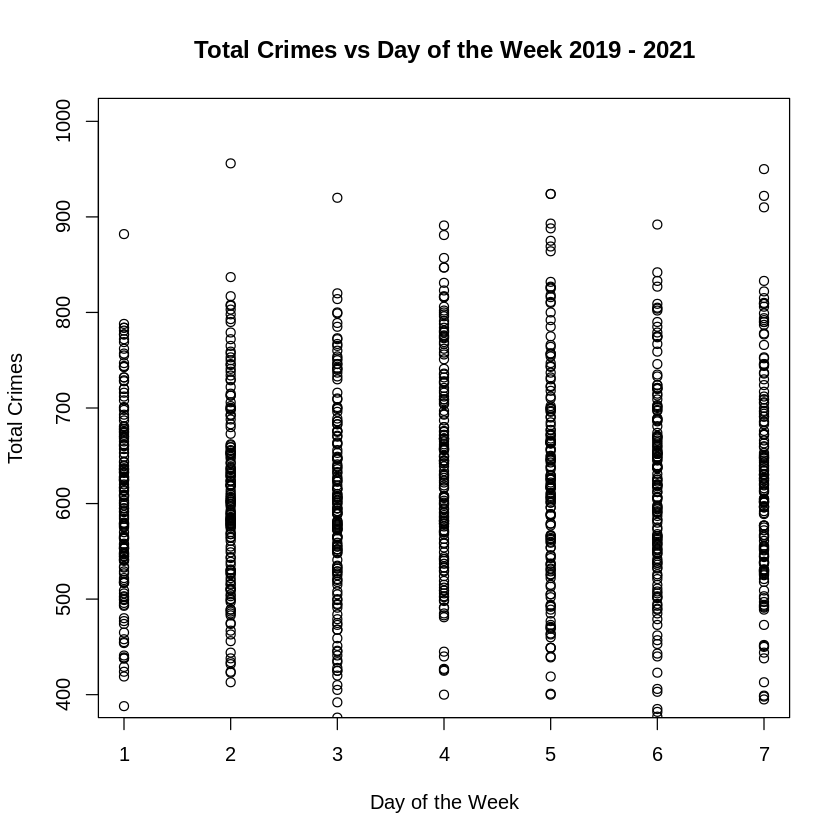

In [417]:
plot(crimes$dow_num[0:365], crimes$TOTAL_CRIMES[0:365], main="Total Crimes vs Day of the Week 2019", xlab='Day of the Week', ylab="Total Crimes", ylim=c(400,1000));
plot(crimes$dow_num[366:731], crimes$TOTAL_CRIMES[366:731], main="Total Crimes vs Day of the Week 2020", xlab='Day of the Week', ylab="Total Crimes", ylim=c(400,1000));
plot(crimes$dow_num[732:1096], crimes$TOTAL_CRIMES[732:1096], main="Total Crimes vs Day of the Week 2021", xlab='Day of the Week', ylab="Total Crimes", ylim=c(400,1000));
plot(crimes$dow_num, crimes$TOTAL_CRIMES, main="Total Crimes vs Day of the Week 2019 - 2021", xlab='Day of the Week', ylab="Total Crimes", ylim=c(400,1000));


In [418]:
cor(crimes$dow_num, crimes$TOTAL_CRIMES);

[1] 0.06594182


<br>
<br>
<br>
<br>


**TRENDS - Crimes vs Temperature**

In [419]:
summary(crimes$temp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.30   39.77   51.70   52.86   67.00   86.10 

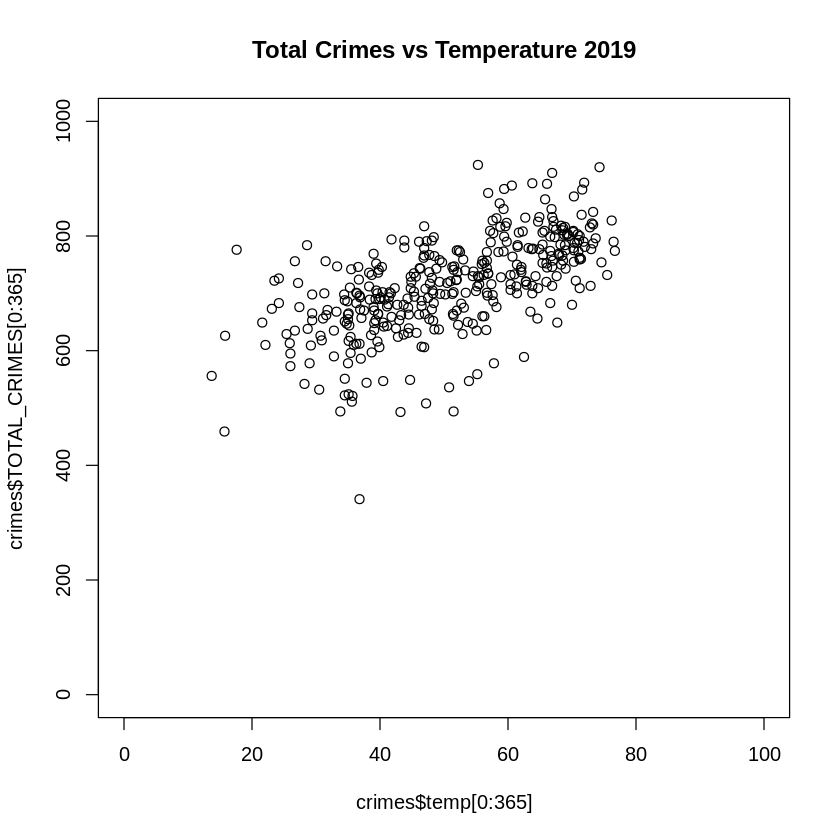

In [420]:
plot(crimes$temp[0:365], crimes$TOTAL_CRIMES[0:365], xlim=c(0, 100), ylim=c(0, 1000), main="Total Crimes vs Temperature 2019")

In [421]:
cor(crimes$temp[0:365], crimes$TOTAL_CRIMES[0:365])

[1] 0.6002355

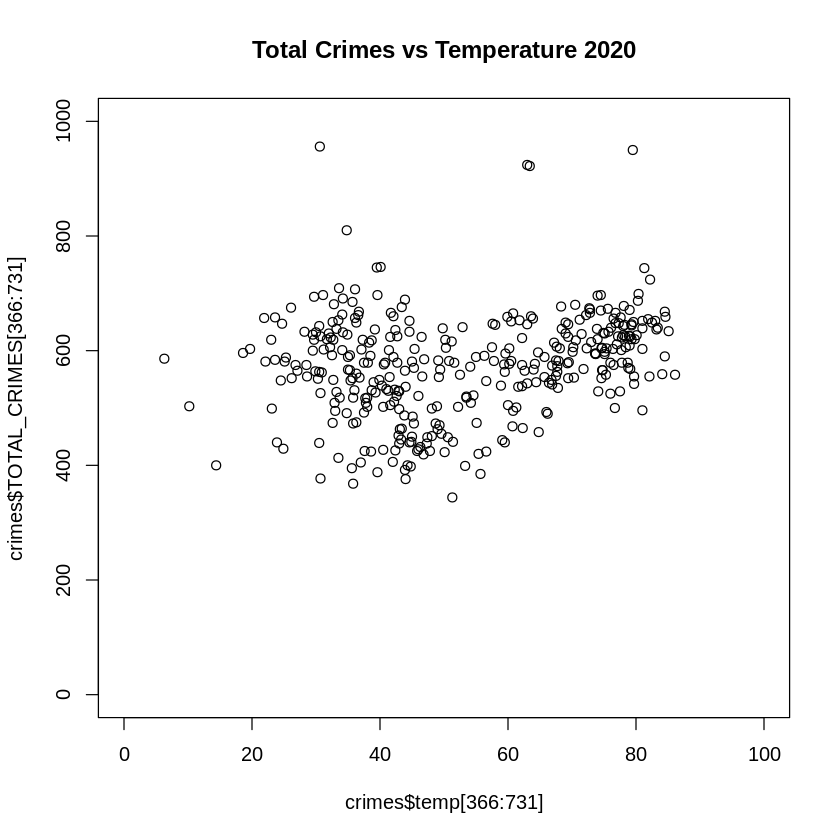

In [422]:
plot(crimes$temp[366:731], crimes$TOTAL_CRIMES[366:731], xlim=c(0, 100), ylim=c(0, 1000), main="Total Crimes vs Temperature 2020")

In [423]:
cor(crimes$temp[366:731], crimes$TOTAL_CRIMES[366:731])

[1] 0.2011031

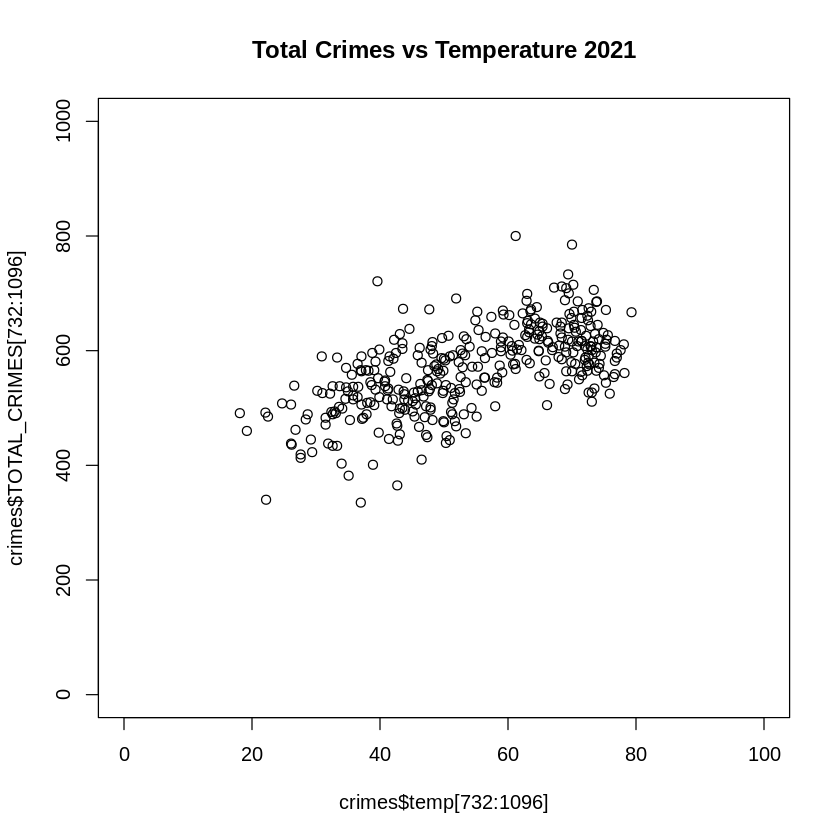

In [424]:
plot(crimes$temp[732:1096], crimes$TOTAL_CRIMES[732:1096], xlim=c(0, 100), ylim=c(0, 1000), main="Total Crimes vs Temperature 2021")

In [425]:
cor(crimes$temp[732:1096], crimes$TOTAL_CRIMES[732:1096])

[1] 0.6236605

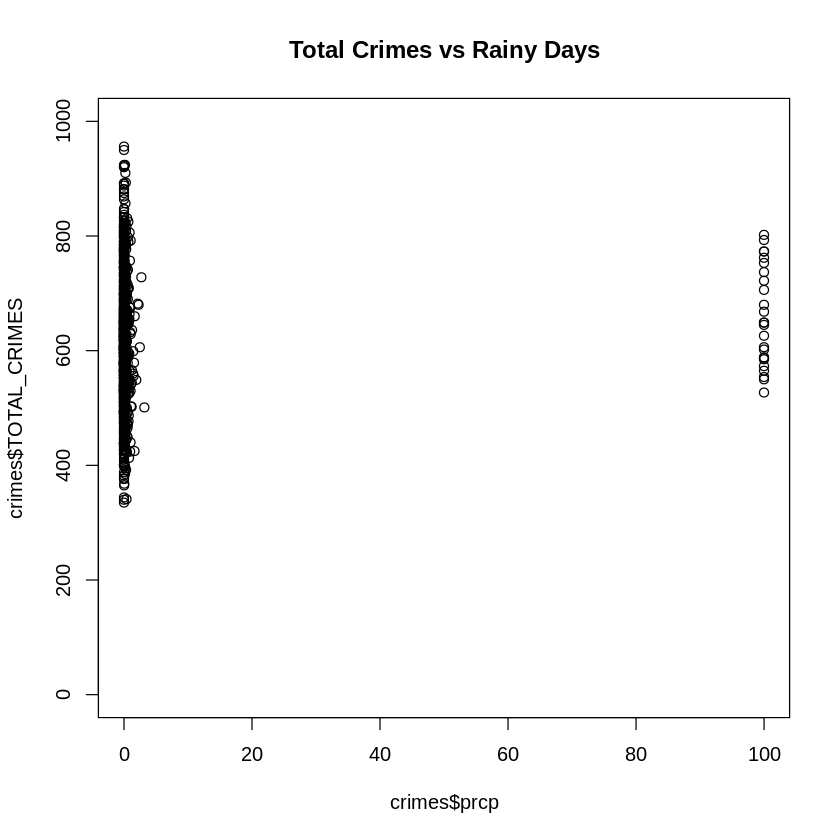

In [426]:
plot(crimes$prcp, crimes$TOTAL_CRIMES, main="Total Crimes vs Rainy Days", ylim=c(0,1000))

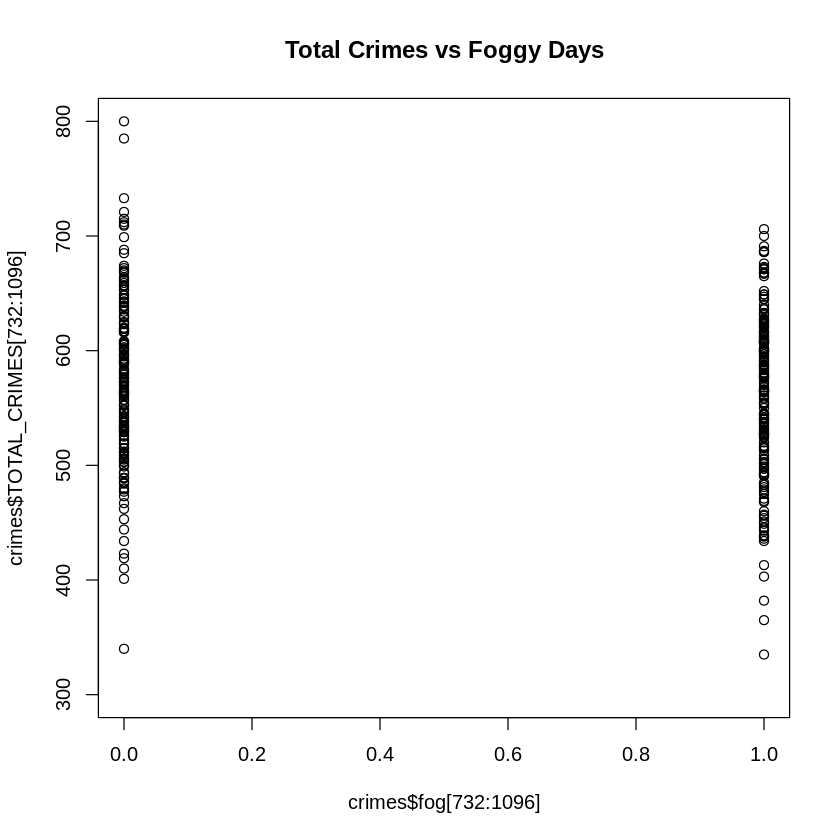

In [428]:
plot(crimes$fog[732:1096], crimes$TOTAL_CRIMES[732:1096], main="Total Crimes vs Foggy Days", ylim=c(300,800))

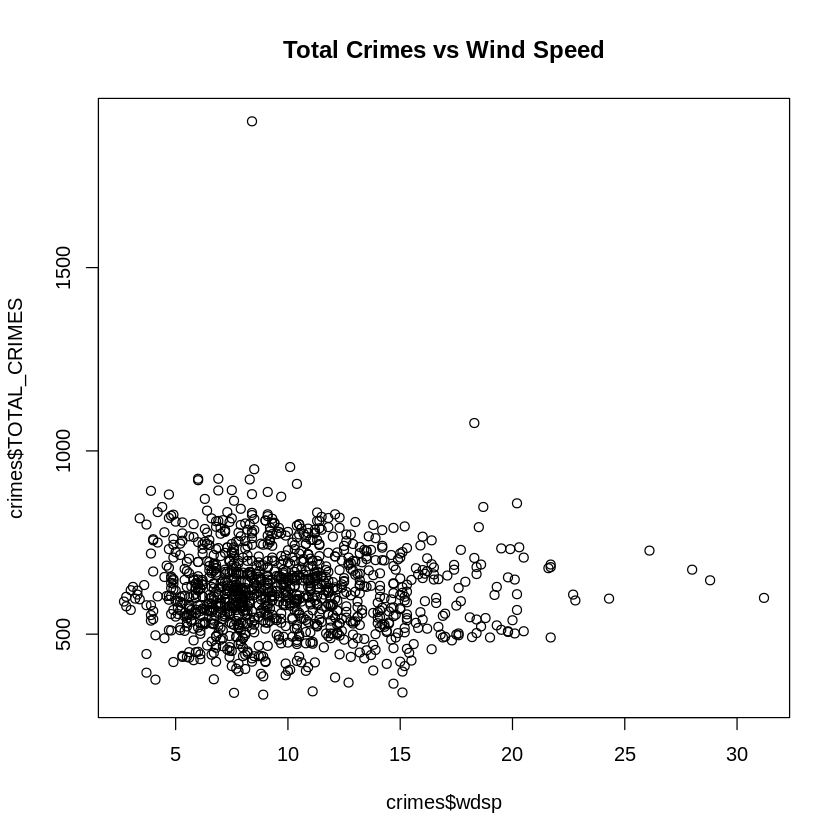

In [429]:
plot(crimes$wdsp, crimes$TOTAL_CRIMES, main="Total Crimes vs Wind Speed")

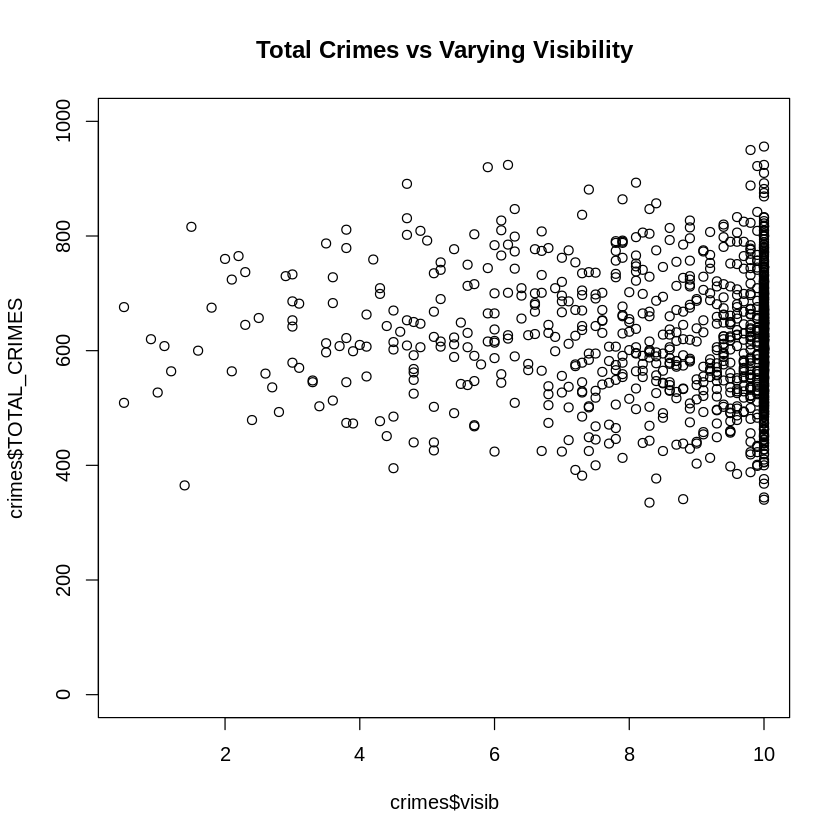

In [430]:
plot(crimes$visib, crimes$TOTAL_CRIMES, main="Total Crimes vs Varying Visibility", ylim=c(0,1000))

<br>
<br>
<br>
<br>
<strong>Parking Lot Crimes</strong>

```

```



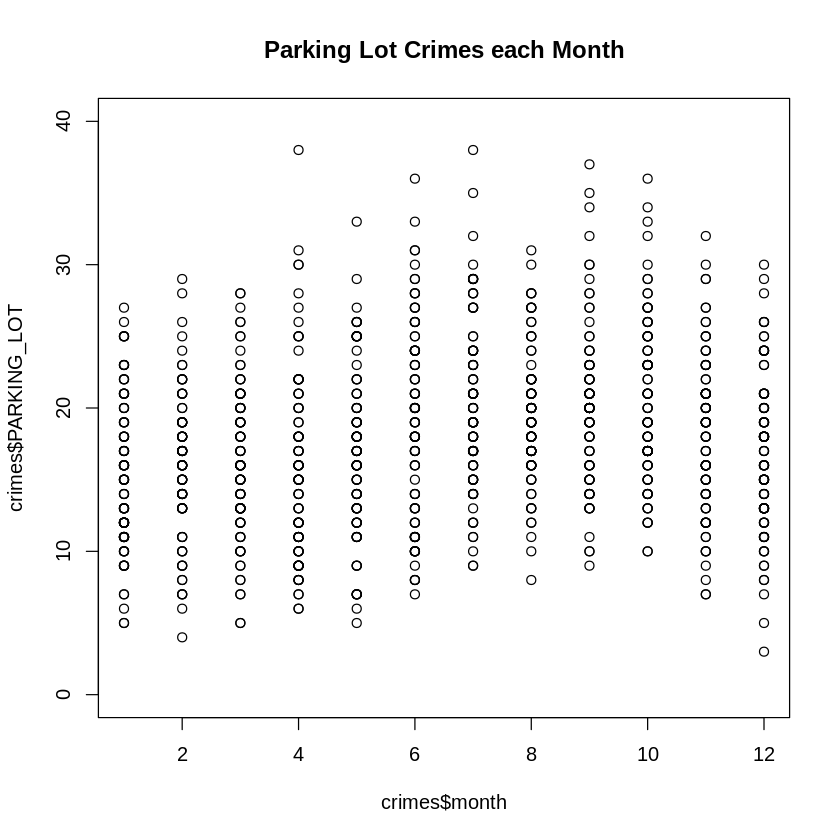

In [431]:
plot(crimes$month, crimes$PARKING_LOT, main="Parking Lot Crimes each Month", ylim=c(0,40))

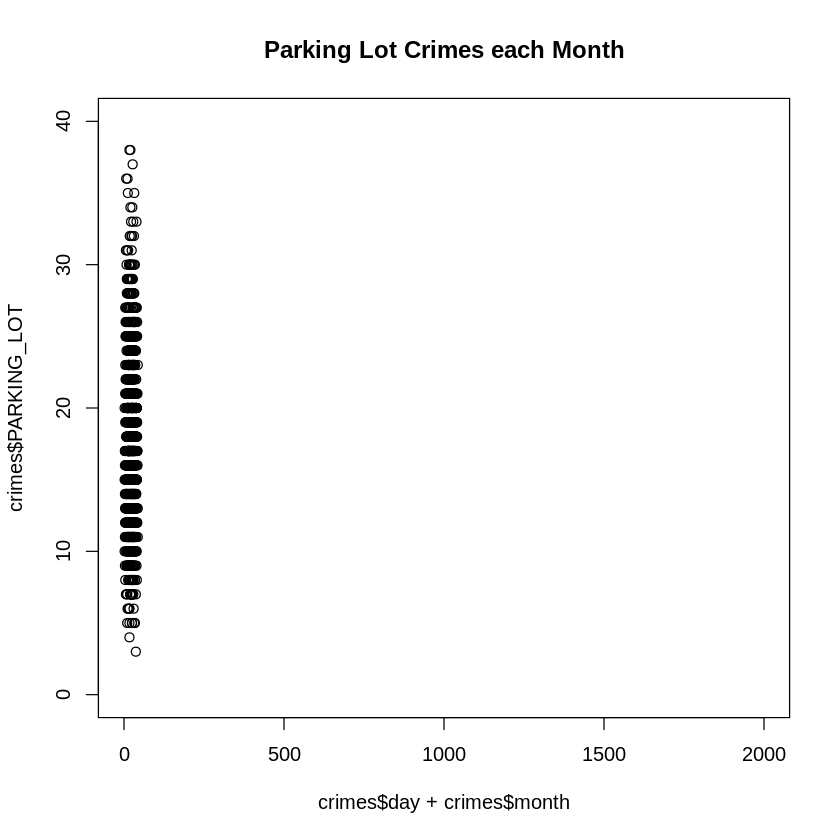

In [432]:
plot(crimes$day+crimes$month, crimes$PARKING_LOT, main="Parking Lot Crimes each Month", ylim=c(0,40), xlim=c(0, 2000))

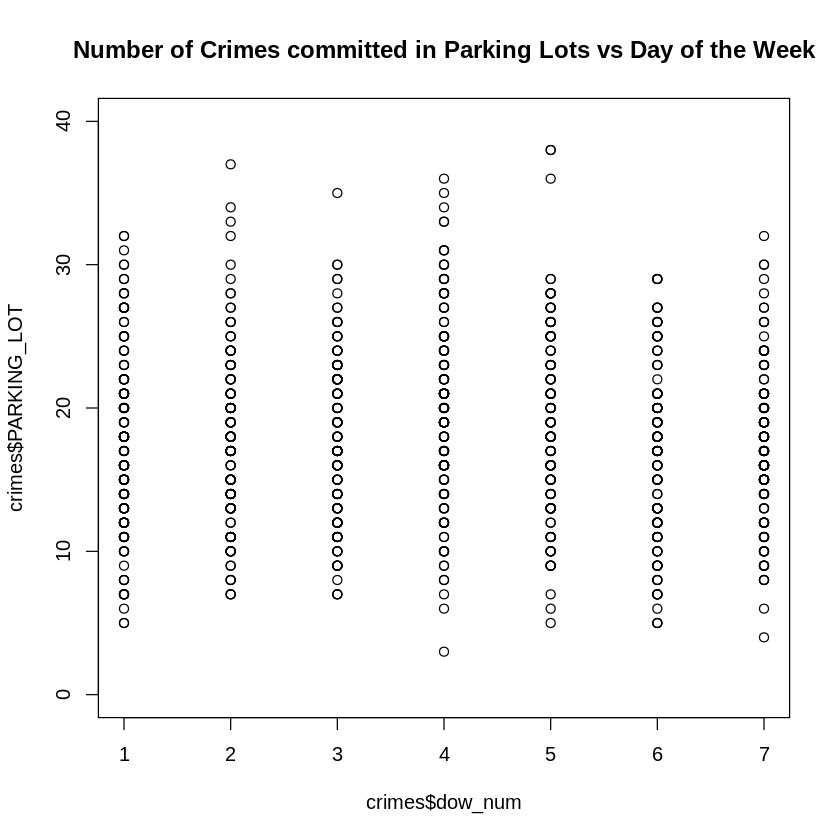

In [433]:
plot(crimes$dow_num, crimes$PARKING_LOT, main="Number of Crimes committed in Parking Lots vs Day of the Week", ylim=c(0,40))

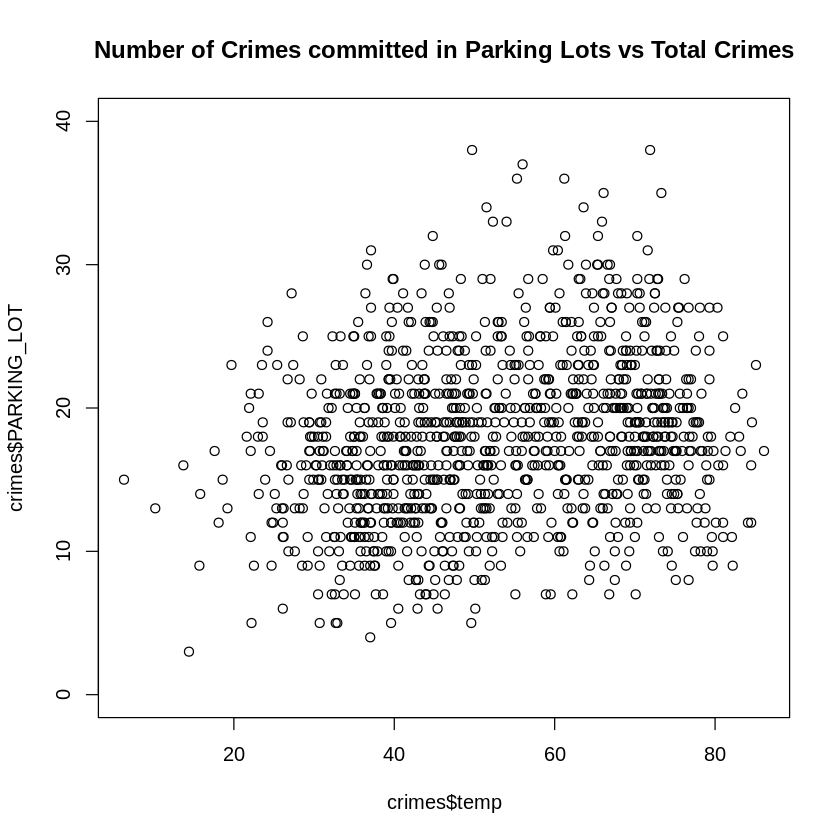

In [434]:
plot(crimes$temp, crimes$PARKING_LOT, main="Number of Crimes committed in Parking Lots vs Total Crimes", ylim=c(0,40))

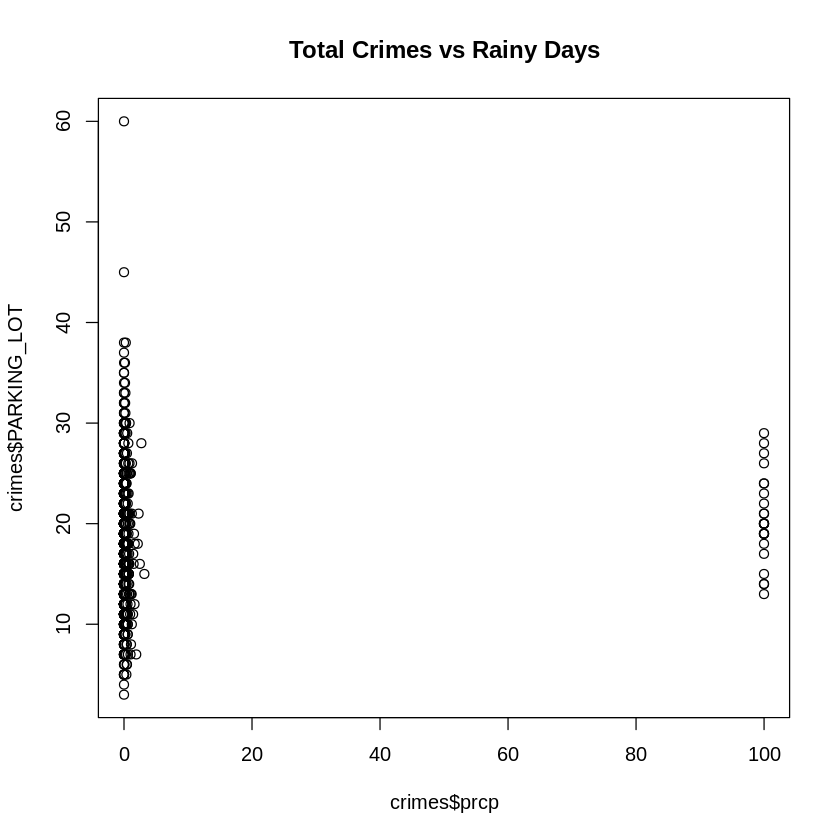

In [435]:
plot(crimes$prcp, crimes$PARKING_LOT, main="Total Crimes vs Rainy Days")

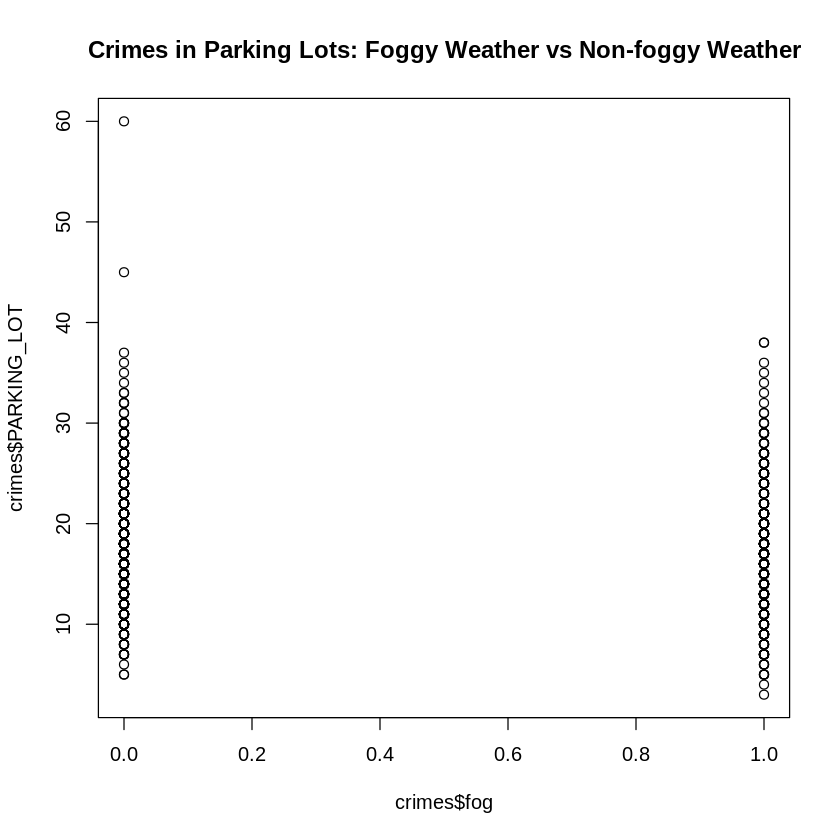

In [436]:
plot(crimes$fog, crimes$PARKING_LOT, main="Crimes in Parking Lots: Foggy Weather vs Non-foggy Weather")

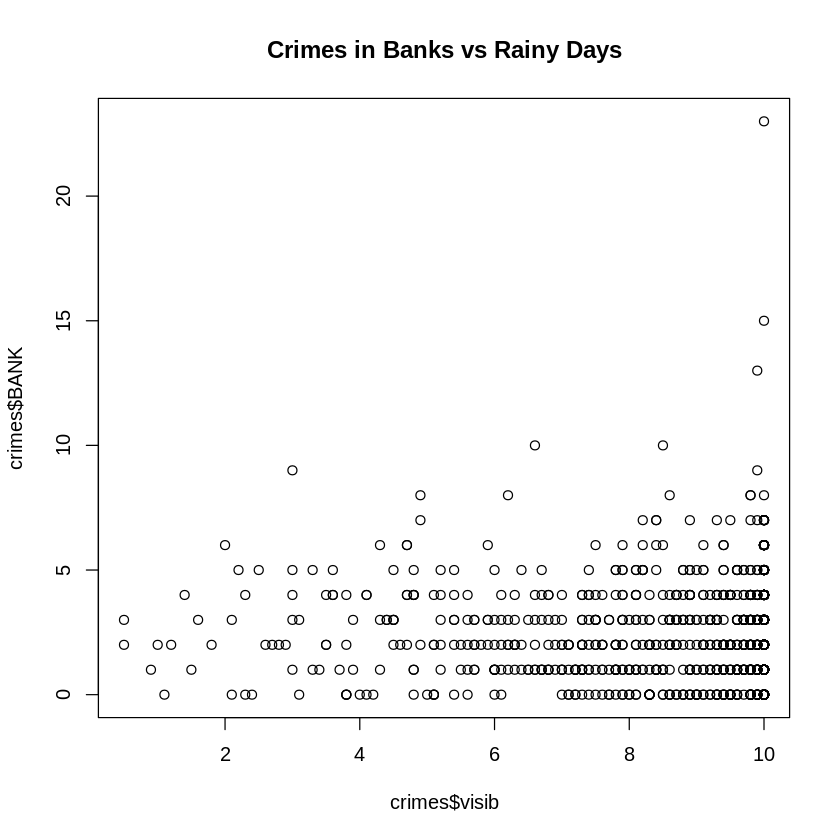

In [437]:
plot(crimes$visib, crimes$BANK, main="Crimes in Banks vs Rainy Days")

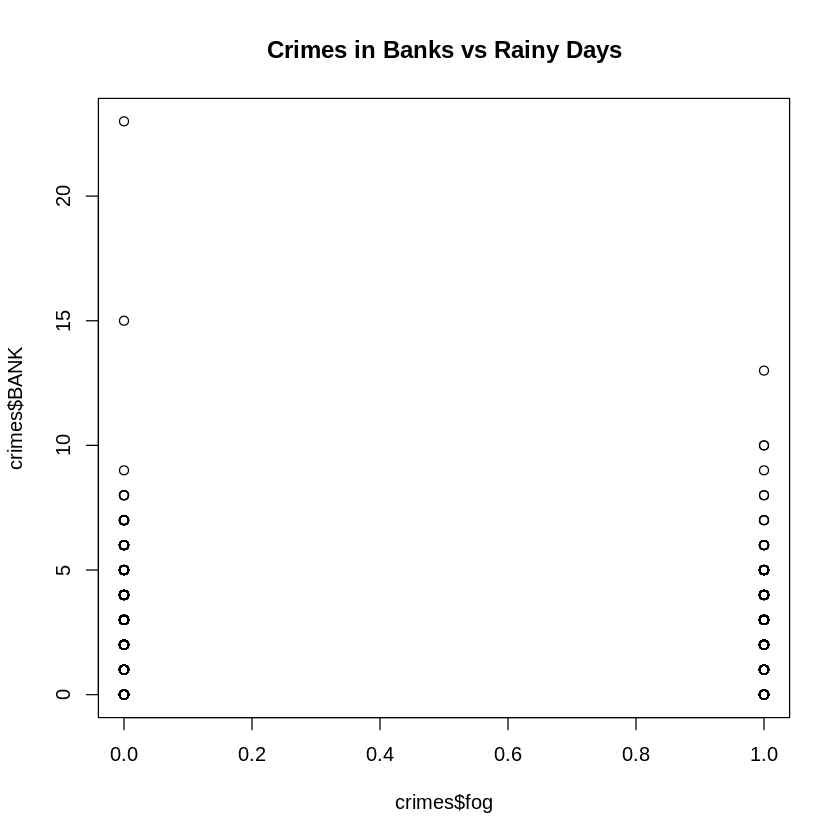

In [438]:
plot(crimes$fog, crimes$BANK, main="Crimes in Banks vs Rainy Days")

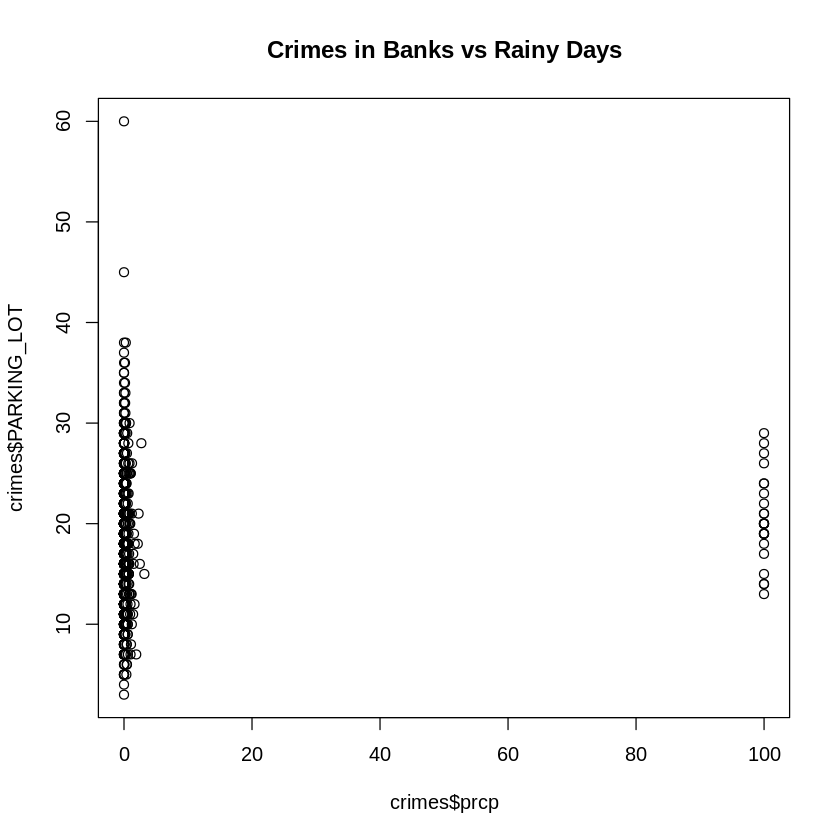

In [439]:
plot(crimes$prcp, crimes$PARKING_LOT, main="Crimes in Banks vs Rainy Days")

<br>
<br>
<br>
<br>
<strong>Battery Crimes</strong>

```

```



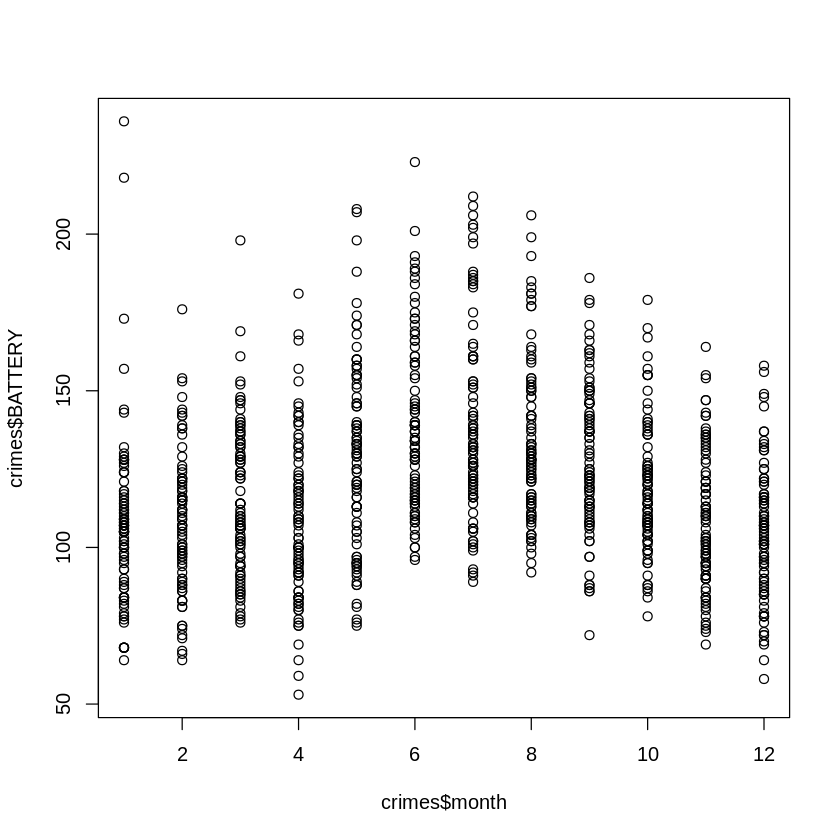

In [440]:
plot(crimes$month, crimes$BATTERY)

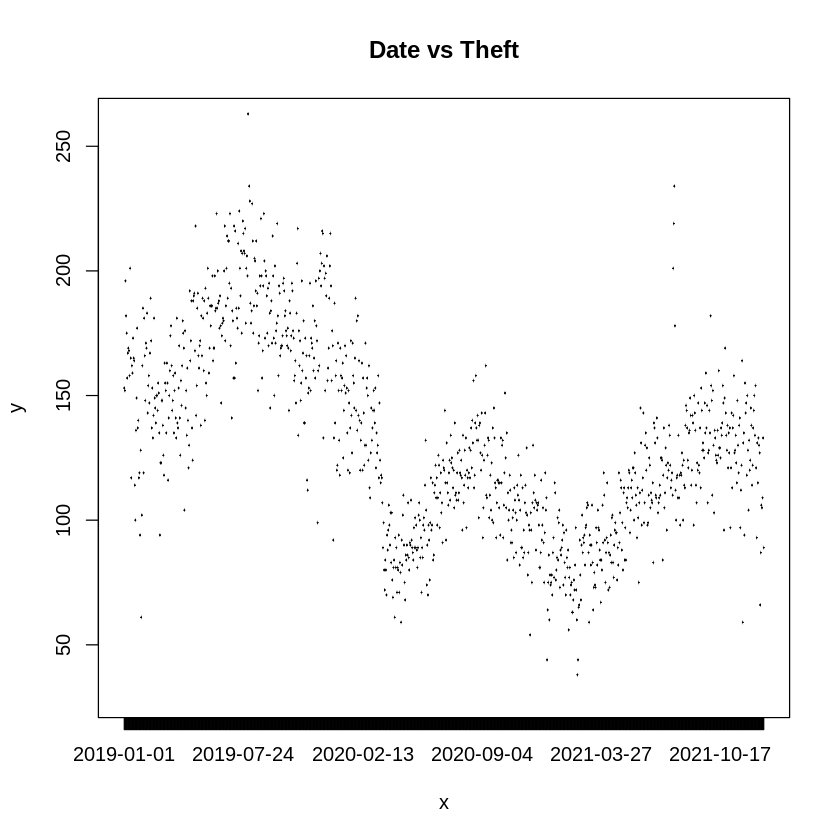

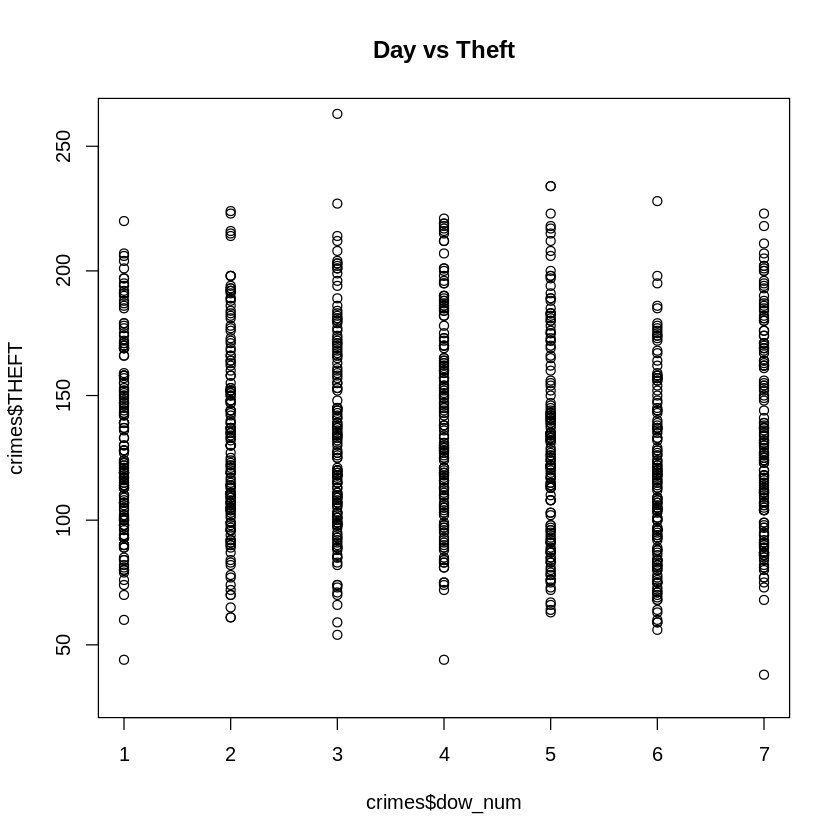

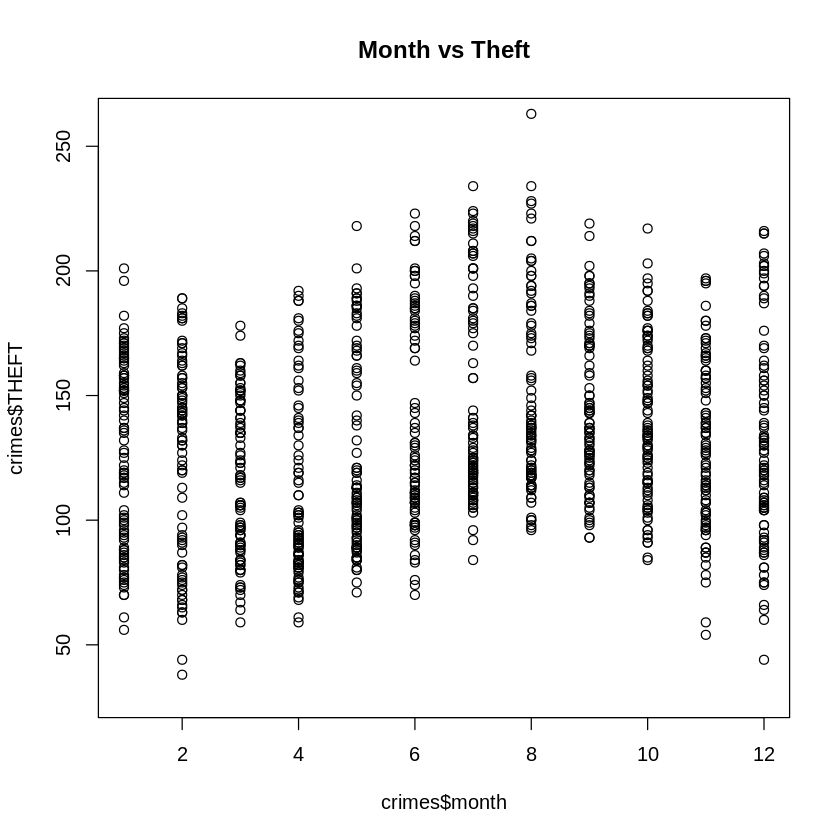

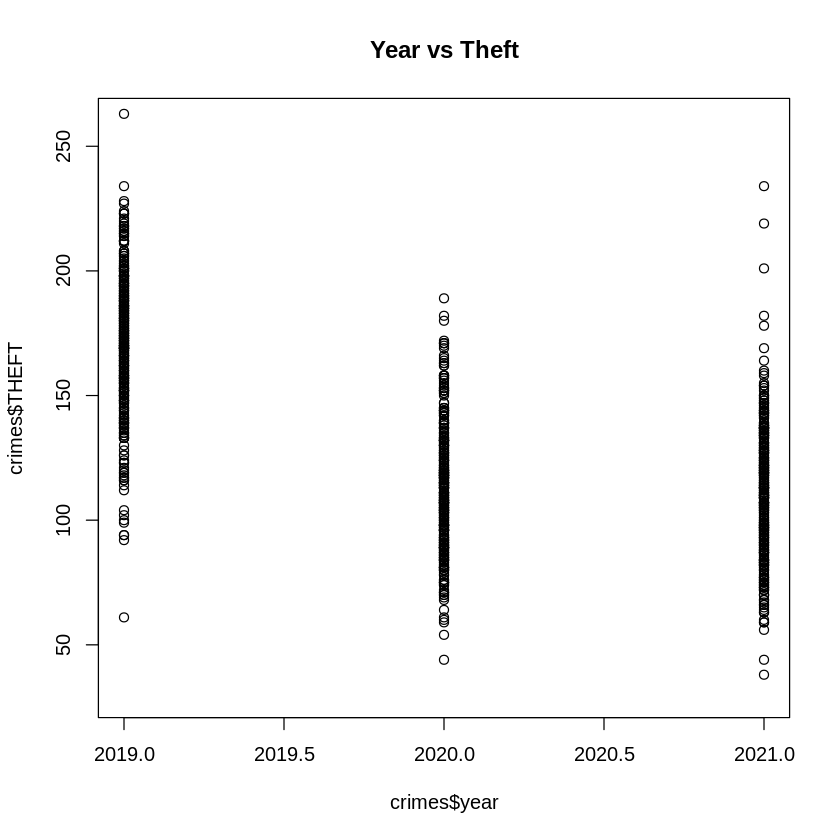

In [441]:
plot(crimes$date, crimes$THEFT, main="Date vs Theft", ylim = c(30,260));
plot(crimes$dow_num, crimes$THEFT, main="Day vs Theft", ylim = c(30,260));
plot(crimes$month, crimes$THEFT, main="Month vs Theft", ylim = c(30,260));
plot(crimes$year, crimes$THEFT, main="Year vs Theft", ylim = c(30,260));